# PHASE 0: The Foundation (Clean, Validate & EDA)

**Objective**: Establish a rock-solid data foundation with comprehensive validation before feature engineering.

**Critical Constraints**:
1. ✅ No Data Contamination - Verify filenames contain dataset type
2. ✅ Date Parsing - Strict DD-MM-YYYY format using `format='%d-%m-%Y'`
3. ✅ No Nonsense Math - Drop pincode before summing
4. ✅ Preserve Border Data - Map misspellings, don't drop rows

## TASK 0.1: Data Loading with Safeguards

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import glob
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("="*70)
print("PHASE 0: FOUNDATION - DATA LOADING & VALIDATION")
print("="*70)
print("\n✓ Libraries imported successfully")

PHASE 0: FOUNDATION - DATA LOADING & VALIDATION

✓ Libraries imported successfully


In [2]:
# Define base directory
BASE_DIR = Path('/Users/mohit/UIDAI/Datasets')

print("\n" + "="*70)
print("STEP 1: DISCOVER ALL CSV FILES")
print("="*70 + "\n")

# Get all CSV files recursively
all_files = list(BASE_DIR.rglob('*.csv'))

print(f"Found {len(all_files)} total CSV files in {BASE_DIR}\n")

# CRITICAL: Verify filename contains dataset type before loading
biometric_files = [str(f) for f in all_files if 'biometric' in f.name.lower()]
demographic_files = [str(f) for f in all_files if 'demographic' in f.name.lower()]
enrolment_files = [str(f) for f in all_files if 'enrolment' in f.name.lower()]

print("📂 FILE CLASSIFICATION (by filename verification):")
print(f"  • Biometric files: {len(biometric_files)}")
for f in biometric_files:
    print(f"    - {Path(f).name}")

print(f"\n  • Demographic files: {len(demographic_files)}")
for f in demographic_files:
    print(f"    - {Path(f).name}")

print(f"\n  • Enrolment files: {len(enrolment_files)}")
for f in enrolment_files:
    print(f"    - {Path(f).name}")

# Validation check
total_classified = len(biometric_files) + len(demographic_files) + len(enrolment_files)
if total_classified != len(all_files):
    unclassified = len(all_files) - total_classified
    print(f"\n⚠️  WARNING: {unclassified} files could not be classified!")
else:
    print(f"\n✓ All {len(all_files)} files successfully classified")


STEP 1: DISCOVER ALL CSV FILES

Found 12 total CSV files in /Users/mohit/UIDAI/Datasets

📂 FILE CLASSIFICATION (by filename verification):
  • Biometric files: 4
    - api_data_aadhar_biometric_500000_1000000.csv
    - api_data_aadhar_biometric_1500000_1861108.csv
    - api_data_aadhar_biometric_0_500000.csv
    - api_data_aadhar_biometric_1000000_1500000.csv

  • Demographic files: 5
    - api_data_aadhar_demographic_1500000_2000000.csv
    - api_data_aadhar_demographic_1000000_1500000.csv
    - api_data_aadhar_demographic_2000000_2071700.csv
    - api_data_aadhar_demographic_0_500000.csv
    - api_data_aadhar_demographic_500000_1000000.csv

  • Enrolment files: 3
    - api_data_aadhar_enrolment_1000000_1006029.csv
    - api_data_aadhar_enrolment_500000_1000000.csv
    - api_data_aadhar_enrolment_0_500000.csv

✓ All 12 files successfully classified


In [3]:
print("\n" + "="*70)
print("STEP 2: LOAD BIOMETRIC DATASET")
print("="*70 + "\n")

bio_dfs = []
for file in biometric_files:
    print(f"Loading: {Path(file).name}... ", end="")
    df = pd.read_csv(file)
    print(f"✓ {len(df):,} records")
    bio_dfs.append(df)

# Concatenate all biometric files
bio_df = pd.concat(bio_dfs, ignore_index=True)

print(f"\n✅ BIOMETRIC DATASET LOADED")
print(f"   Total records: {len(bio_df):,}")
print(f"   Columns: {list(bio_df.columns)}")
print(f"\n   Sample data:")
print(bio_df.head(3))


STEP 2: LOAD BIOMETRIC DATASET

Loading: api_data_aadhar_biometric_500000_1000000.csv... ✓ 500,000 records
Loading: api_data_aadhar_biometric_1500000_1861108.csv... ✓ 361,108 records
Loading: api_data_aadhar_biometric_0_500000.csv... ✓ 500,000 records
Loading: api_data_aadhar_biometric_1000000_1500000.csv... ✓ 500,000 records

✅ BIOMETRIC DATASET LOADED
   Total records: 1,861,108
   Columns: ['date', 'state', 'district', 'pincode', 'bio_age_5_17', 'bio_age_17_']

   Sample data:
         date state   district  pincode  bio_age_5_17  bio_age_17_
0  19-09-2025   Goa  North Goa   403502             0            4
1  19-09-2025   Goa  North Goa   403508             1            4
2  19-09-2025   Goa  North Goa   403513             2            0


In [4]:
print("\n" + "="*70)
print("STEP 3: LOAD DEMOGRAPHIC DATASET")
print("="*70 + "\n")

demo_dfs = []
for file in demographic_files:
    print(f"Loading: {Path(file).name}... ", end="")
    df = pd.read_csv(file)
    print(f"✓ {len(df):,} records")
    demo_dfs.append(df)

# Concatenate all demographic files
demo_df = pd.concat(demo_dfs, ignore_index=True)

print(f"\n✅ DEMOGRAPHIC DATASET LOADED")
print(f"   Total records: {len(demo_df):,}")
print(f"   Columns: {list(demo_df.columns)}")
print(f"\n   Sample data:")
print(demo_df.head(3))


STEP 3: LOAD DEMOGRAPHIC DATASET

Loading: api_data_aadhar_demographic_1500000_2000000.csv... ✓ 500,000 records
Loading: api_data_aadhar_demographic_1000000_1500000.csv... ✓ 500,000 records
Loading: api_data_aadhar_demographic_2000000_2071700.csv... ✓ 71,700 records
Loading: api_data_aadhar_demographic_0_500000.csv... ✓ 500,000 records
Loading: api_data_aadhar_demographic_500000_1000000.csv... ✓ 500,000 records

✅ DEMOGRAPHIC DATASET LOADED
   Total records: 2,071,700
   Columns: ['date', 'state', 'district', 'pincode', 'demo_age_5_17', 'demo_age_17_']

   Sample data:
         date      state district  pincode  demo_age_5_17  demo_age_17_
0  18-11-2025  Karnataka    Hasan   573118              0             2
1  18-11-2025  Karnataka    Hasan   573124              1             3
2  18-11-2025  Karnataka    Hasan   573150              0             2


In [5]:
print("\n" + "="*70)
print("STEP 4: LOAD ENROLMENT DATASET")
print("="*70 + "\n")

enrol_dfs = []
for file in enrolment_files:
    print(f"Loading: {Path(file).name}... ", end="")
    df = pd.read_csv(file)
    print(f"✓ {len(df):,} records")
    enrol_dfs.append(df)

# Concatenate all enrolment files
enrol_df = pd.concat(enrol_dfs, ignore_index=True)

print(f"\n✅ ENROLMENT DATASET LOADED")
print(f"   Total records: {len(enrol_df):,}")
print(f"   Columns: {list(enrol_df.columns)}")
print(f"\n   Sample data:")
print(enrol_df.head(3))


STEP 4: LOAD ENROLMENT DATASET

Loading: api_data_aadhar_enrolment_1000000_1006029.csv... ✓ 6,029 records
Loading: api_data_aadhar_enrolment_500000_1000000.csv... ✓ 500,000 records
Loading: api_data_aadhar_enrolment_0_500000.csv... ✓ 500,000 records

✅ ENROLMENT DATASET LOADED
   Total records: 1,006,029
   Columns: ['date', 'state', 'district', 'pincode', 'age_0_5', 'age_5_17', 'age_18_greater']

   Sample data:
         date      state district  pincode  age_0_5  age_5_17  age_18_greater
0  31-12-2025  Karnataka    Bidar   585330        2         3               0
1  31-12-2025  Karnataka    Bidar   585402        6         0               0
2  31-12-2025  Karnataka    Bidar   585413        1         0               0


In [6]:
print("\n" + "="*70)
print("STEP 5: PARSE DATES (CRITICAL - DD-MM-YYYY FORMAT)")
print("="*70 + "\n")

# MUST use format='%d-%m-%Y' for DD-MM-YYYY
print("Parsing Demographic dates... ", end="")
demo_df['date'] = pd.to_datetime(demo_df['date'], format='%d-%m-%Y', errors='coerce')
demo_nat_count = demo_df['date'].isna().sum()
demo_nat_pct = demo_nat_count / len(demo_df) * 100
print(f"✓ {demo_nat_count:,} NaT ({demo_nat_pct:.2f}%)")

print("Parsing Biometric dates... ", end="")
bio_df['date'] = pd.to_datetime(bio_df['date'], format='%d-%m-%Y', errors='coerce')
bio_nat_count = bio_df['date'].isna().sum()
bio_nat_pct = bio_nat_count / len(bio_df) * 100
print(f"✓ {bio_nat_count:,} NaT ({bio_nat_pct:.2f}%)")

print("Parsing Enrolment dates... ", end="")
enrol_df['date'] = pd.to_datetime(enrol_df['date'], format='%d-%m-%Y', errors='coerce')
enrol_nat_count = enrol_df['date'].isna().sum()
enrol_nat_pct = enrol_nat_count / len(enrol_df) * 100
print(f"✓ {enrol_nat_count:,} NaT ({enrol_nat_pct:.2f}%)")

# Critical validation
print("\n📊 DATE PARSING VALIDATION:")
if demo_nat_pct < 5 and bio_nat_pct < 5 and enrol_nat_pct < 5:
    print("   ✅ SUCCESS: All datasets have >95% successful date parsing")
else:
    print("   ⚠️  WARNING: Date parsing success rate below 95% threshold!")
    if demo_nat_pct >= 5:
        print(f"      - Demographic: {demo_nat_pct:.2f}% failed")
    if bio_nat_pct >= 5:
        print(f"      - Biometric: {bio_nat_pct:.2f}% failed")
    if enrol_nat_pct >= 5:
        print(f"      - Enrolment: {enrol_nat_pct:.2f}% failed")


STEP 5: PARSE DATES (CRITICAL - DD-MM-YYYY FORMAT)

Parsing Demographic dates... ✓ 0 NaT (0.00%)
Parsing Biometric dates... ✓ 0 NaT (0.00%)
Parsing Enrolment dates... ✓ 0 NaT (0.00%)

📊 DATE PARSING VALIDATION:
   ✅ SUCCESS: All datasets have >95% successful date parsing


In [12]:
print("\n" + "="*70)
print("STEP 6: STANDARDIZE COLUMN NAMES")
print("="*70 + "\n")

# First, let's check what columns we actually have
print("Current column names:")
print(f"  Demographic: {list(demo_df.columns)}")
print(f"  Biometric: {list(bio_df.columns)}")
print(f"  Enrolment: {list(enrol_df.columns)}")

# Demographic Dataset - adapt to actual column names
print("\nStandardizing Demographic columns...")
demo_rename = {}
for col in demo_df.columns:
    if 'demo' in col.lower() and ('5' in col or '17' in col):
        if '5_17' in col or '5-17' in col:
            demo_rename[col] = 'demo_child'
        elif '17_' in col or '17+' in col:
            demo_rename[col] = 'demo_adult'

if demo_rename:
    demo_df.rename(columns=demo_rename, inplace=True)
    print(f"   Renamed: {demo_rename}")
else:
    print("   No demographic columns to rename")

# Enrolment Dataset - adapt to actual column names
print("\nStandardizing Enrolment columns...")
enrol_rename = {}
for col in enrol_df.columns:
    if 'age' in col.lower():
        if '0_5' in col or '0-5' in col:
            enrol_rename[col] = 'enrol_infant'
        elif '5_17' in col or '5-17' in col:
            enrol_rename[col] = 'enrol_child'
        elif '18' in col or '17+' in col or 'greater' in col.lower():
            enrol_rename[col] = 'enrol_adult'

if enrol_rename:
    enrol_df.rename(columns=enrol_rename, inplace=True)
    print(f"   Renamed: {enrol_rename}")
else:
    print("   No enrolment columns to rename")

# Biometric Dataset - adapt to actual column names
print("\nStandardizing Biometric columns...")
bio_rename = {}
for col in bio_df.columns:
    if 'bio' in col.lower() and ('5' in col or '17' in col):
        if '5_17' in col or '5-17' in col:
            bio_rename[col] = 'bio_child'
        elif '17_' in col or '17+' in col:
            bio_rename[col] = 'bio_adult'

if bio_rename:
    bio_df.rename(columns=bio_rename, inplace=True)
    print(f"   Renamed: {bio_rename}")
else:
    print("   No biometric columns to rename")

print("\n✓ Column names standardized across all datasets")
print("\nFinal column names:")
print(f"  Demographic: {list(demo_df.columns)}")
print(f"  Biometric: {list(bio_df.columns)}")
print(f"  Enrolment: {list(enrol_df.columns)}")


STEP 6: STANDARDIZE COLUMN NAMES

Current column names:
  Demographic: ['date', 'state', 'district', 'pincode', 'demo_age_5_17', 'demo_age_17_']
  Biometric: ['date', 'state', 'district', 'pincode', 'bio_age_5_17', 'bio_age_17_']
  Enrolment: ['date', 'state', 'district', 'pincode', 'age_0_5', 'age_5_17', 'age_18_greater']

Standardizing Demographic columns...
   Renamed: {'demo_age_5_17': 'demo_child', 'demo_age_17_': 'demo_adult'}

Standardizing Enrolment columns...
   Renamed: {'age_0_5': 'enrol_infant', 'age_5_17': 'enrol_child', 'age_18_greater': 'enrol_adult'}

Standardizing Biometric columns...
   Renamed: {'bio_age_5_17': 'bio_child', 'bio_age_17_': 'bio_adult'}

✓ Column names standardized across all datasets

Final column names:
  Demographic: ['date', 'state', 'district', 'pincode', 'demo_child', 'demo_adult']
  Biometric: ['date', 'state', 'district', 'pincode', 'bio_child', 'bio_adult']
  Enrolment: ['date', 'state', 'district', 'pincode', 'enrol_infant', 'enrol_child', '

In [13]:
print("\n" + "="*70)
print("STEP 7: CLEAN STATE NAMES (PRESERVE BORDER DATA)")
print("="*70 + "\n")

# Mapping dictionary for common misspellings
state_corrections = {
    'West Bengli': 'West Bengal',
    'Orissa': 'Odisha',
    'Uttaranchal': 'Uttarakhand',
    'Pondicherry': 'Puducherry',
    'Chattisgarh': 'Chhattisgarh',
    'Maharastra': 'Maharashtra',
    'Gujrat': 'Gujarat',
    'Maharshtra': 'Maharashtra',
    'Madhya pradesh': 'Madhya Pradesh',
    'Arunanchal Pradesh': 'Arunachal Pradesh',
    'Jammu and Kashmir': 'Jammu & Kashmir'
}

print("🔧 STATE NAME CORRECTIONS:")
total_corrections = 0

for df_name, df in [('Demographic', demo_df), ('Biometric', bio_df), ('Enrolment', enrol_df)]:
    before_unique = df['state'].nunique()
    corrections_made = 0
    
    for wrong, correct in state_corrections.items():
        count = (df['state'] == wrong).sum()
        if count > 0:
            df['state'] = df['state'].replace(wrong, correct)
            corrections_made += count
            print(f"   {df_name}: '{wrong}' → '{correct}' ({count:,} records)")
    
    after_unique = df['state'].nunique()
    total_corrections += corrections_made
    
    if corrections_made > 0:
        print(f"   {df_name}: {before_unique} → {after_unique} unique states ({corrections_made:,} records corrected)\n")

if total_corrections == 0:
    print("   ✓ No state name corrections needed - data already clean")
else:
    print(f"\n✅ Total corrections: {total_corrections:,} records across all datasets")

# Show current unique states
print("\n📍 UNIQUE STATES AFTER CORRECTION:")
all_states = pd.concat([demo_df['state'], bio_df['state'], enrol_df['state']]).unique()
all_states = sorted([s for s in all_states if pd.notna(s)])
print(f"   Total unique states: {len(all_states)}")
print(f"   States: {', '.join(all_states[:10])}..." if len(all_states) > 10 else f"   States: {', '.join(all_states)}")


STEP 7: CLEAN STATE NAMES (PRESERVE BORDER DATA)

🔧 STATE NAME CORRECTIONS:
   ✓ No state name corrections needed - data already clean

📍 UNIQUE STATES AFTER CORRECTION:
   Total unique states: 63
   States: 100000, Andaman & Nicobar Islands, Andaman and Nicobar Islands, Andhra Pradesh, Arunachal Pradesh, Assam, BALANAGAR, Bihar, Chandigarh, Chhatisgarh...


In [14]:
print("\n" + "="*70)
print("STEP 8: MERGE DATASETS")
print("="*70 + "\n")

print("Merging Demographic + Biometric... ", end="")
master_df = demo_df.merge(
    bio_df, 
    on=['date', 'state', 'district', 'pincode'], 
    how='outer'
)
print(f"✓ {len(master_df):,} records")

print("Merging Master + Enrolment... ", end="")
master_df = master_df.merge(
    enrol_df, 
    on=['date', 'state', 'district', 'pincode'], 
    how='outer'
)
print(f"✓ {len(master_df):,} records")

print("\n✅ MASTER DATASET CREATED")
print(f"   Total records: {len(master_df):,}")
print(f"   Columns: {list(master_df.columns)}")
print(f"\n   Data types:")
print(master_df.dtypes)


STEP 8: MERGE DATASETS

Merging Demographic + Biometric... ✓ 2,779,885 records
Merging Master + Enrolment... ✓ 2,779,885 records
Merging Master + Enrolment... ✓ 2,962,745 records

✅ MASTER DATASET CREATED
   Total records: 2,962,745
   Columns: ['date', 'state', 'district', 'pincode', 'demo_child', 'demo_adult', 'bio_child', 'bio_adult', 'enrol_infant', 'enrol_child', 'enrol_adult']

   Data types:
date            datetime64[ns]
state                   object
district                object
pincode                  int64
demo_child             float64
demo_adult             float64
bio_child              float64
bio_adult              float64
enrol_infant           float64
enrol_child            float64
enrol_adult            float64
dtype: object
✓ 2,962,745 records

✅ MASTER DATASET CREATED
   Total records: 2,962,745
   Columns: ['date', 'state', 'district', 'pincode', 'demo_child', 'demo_adult', 'bio_child', 'bio_adult', 'enrol_infant', 'enrol_child', 'enrol_adult']

   Data types:

In [16]:
print("\n" + "="*70)
print("STEP 9: CREATE DISTRICT-LEVEL AGGREGATION")
print("="*70 + "\n")

print("⚠️  CRITICAL: Dropping 'pincode' before aggregation (avoid nonsense math)\n")

# CRITICAL: Drop pincode before summing to avoid nonsense math
# (e.g., pincode 110001 + 110002 = 220003 is meaningless)

district_daily_df = master_df.groupby(['date', 'state', 'district']).agg({
    'demo_child': 'sum',
    'demo_adult': 'sum',
    'enrol_infant': 'sum',
    'enrol_child': 'sum',
    'enrol_adult': 'sum',
    'bio_child': 'sum',
    'bio_adult': 'sum'
}).reset_index()

print(f"✅ DISTRICT DAILY AGGREGATION CREATED")
print(f"   Total records: {len(district_daily_df):,}")
print(f"   Unique dates: {district_daily_df['date'].nunique()}")
print(f"   Unique states: {district_daily_df['state'].nunique()}")
print(f"   Unique districts: {district_daily_df['district'].nunique()}")
print(f"\n   Sample data:")
print(district_daily_df.head(5))


STEP 9: CREATE DISTRICT-LEVEL AGGREGATION

⚠️  CRITICAL: Dropping 'pincode' before aggregation (avoid nonsense math)

✅ DISTRICT DAILY AGGREGATION CREATED
   Total records: 96,708
   Unique dates: 115
   Unique states: 63
   Unique districts: 1029

   Sample data:
        date                        state                  district  \
0 2025-03-01    Andaman & Nicobar Islands                  Andamans   
1 2025-03-01  Andaman and Nicobar Islands                   Nicobar   
2 2025-03-01  Andaman and Nicobar Islands  North And Middle Andaman   
3 2025-03-01  Andaman and Nicobar Islands             South Andaman   
4 2025-03-01               Andhra Pradesh                  Adilabad   

   demo_child  demo_adult  enrol_infant  enrol_child  enrol_adult  bio_child  \
0         0.0         0.0           0.0          0.0          0.0       16.0   
1        32.0       360.0           0.0          0.0          0.0      279.0   
2        20.0       402.0           0.0          0.0          0.0  

## TASK 0.2: Data Quality Validation

In [17]:
print("="*70)
print("DATA QUALITY REPORT")
print("="*70)

# 1. Date Parsing Success
print(f"\n[DATE VALIDATION]")
print(f"Demographic NaT dates: {demo_df['date'].isna().sum():,} ({demo_df['date'].isna().sum()/len(demo_df)*100:.2f}%)")
print(f"Biometric NaT dates: {bio_df['date'].isna().sum():,} ({bio_df['date'].isna().sum()/len(bio_df)*100:.2f}%)")
print(f"Enrolment NaT dates: {enrol_df['date'].isna().sum():,} ({enrol_df['date'].isna().sum()/len(enrol_df)*100:.2f}%)")

# 2. Missing Values
print(f"\n[MISSING VALUES]")
print("Master DataFrame Missing Values:")
missing_summary = master_df.isnull().sum()
missing_summary = missing_summary[missing_summary > 0]
if len(missing_summary) > 0:
    for col, count in missing_summary.items():
        pct = count / len(master_df) * 100
        print(f"  {col}: {count:,} ({pct:.2f}%)")
else:
    print("  ✓ No missing values")

# 3. Data Shape
print(f"\n[DATA SHAPE]")
print(f"Demographic records: {len(demo_df):,}")
print(f"Biometric records: {len(bio_df):,}")
print(f"Enrolment records: {len(enrol_df):,}")
print(f"Master DataFrame records: {len(master_df):,}")
print(f"District Daily records: {len(district_daily_df):,}")

# 4. Date Range
print(f"\n[DATE RANGE]")
print(f"Start Date: {master_df['date'].min()}")
print(f"End Date: {master_df['date'].max()}")
date_range_days = (master_df['date'].max() - master_df['date'].min()).days
print(f"Total Days: {date_range_days}")

# 5. Geographic Coverage
print(f"\n[GEOGRAPHIC COVERAGE]")
print(f"Unique States: {master_df['state'].nunique()}")
print(f"Unique Districts: {master_df['district'].nunique()}")
print(f"Unique Pincodes: {master_df['pincode'].nunique()}")

# 6. Numeric Ranges
print(f"\n[NUMERIC VALUE RANGES]")
numeric_cols = ['demo_child', 'demo_adult', 'enrol_infant', 'enrol_child', 'enrol_adult', 'bio_child', 'bio_adult']
for col in numeric_cols:
    if col in master_df.columns:
        print(f"{col}:")
        print(f"  Min: {master_df[col].min():.0f}, Max: {master_df[col].max():.0f}, Mean: {master_df[col].mean():.2f}")

DATA QUALITY REPORT

[DATE VALIDATION]
Demographic NaT dates: 0 (0.00%)
Biometric NaT dates: 0 (0.00%)
Enrolment NaT dates: 0 (0.00%)

[MISSING VALUES]
Master DataFrame Missing Values:
  demo_child: 762,433 (25.73%)
  demo_adult: 762,433 (25.73%)
  bio_child: 688,410 (23.24%)
  bio_adult: 688,410 (23.24%)
  enrol_infant: 1,693,805 (57.17%)
  enrol_child: 1,693,805 (57.17%)
  enrol_adult: 1,693,805 (57.17%)

[DATA SHAPE]
Demographic records: 2,071,700
Biometric records: 1,861,108
Enrolment records: 1,006,029
Master DataFrame records: 2,962,745
District Daily records: 96,708

[DATE RANGE]
Start Date: 2025-03-01 00:00:00
End Date: 2025-12-31 00:00:00
Total Days: 305

[GEOGRAPHIC COVERAGE]
Unique States: 63
Unique Districts: 1029
Unique Pincodes: 19815

[NUMERIC VALUE RANGES]
demo_child:
  Min: 0, Max: 2690, Mean: 2.31
demo_adult:
  demo_child: 762,433 (25.73%)
  demo_adult: 762,433 (25.73%)
  bio_child: 688,410 (23.24%)
  bio_adult: 688,410 (23.24%)
  enrol_infant: 1,693,805 (57.17%)
  en

## TASK 0.3: Exploratory Data Analysis (EDA)

### EDA Plot 1: Data Availability Over Time

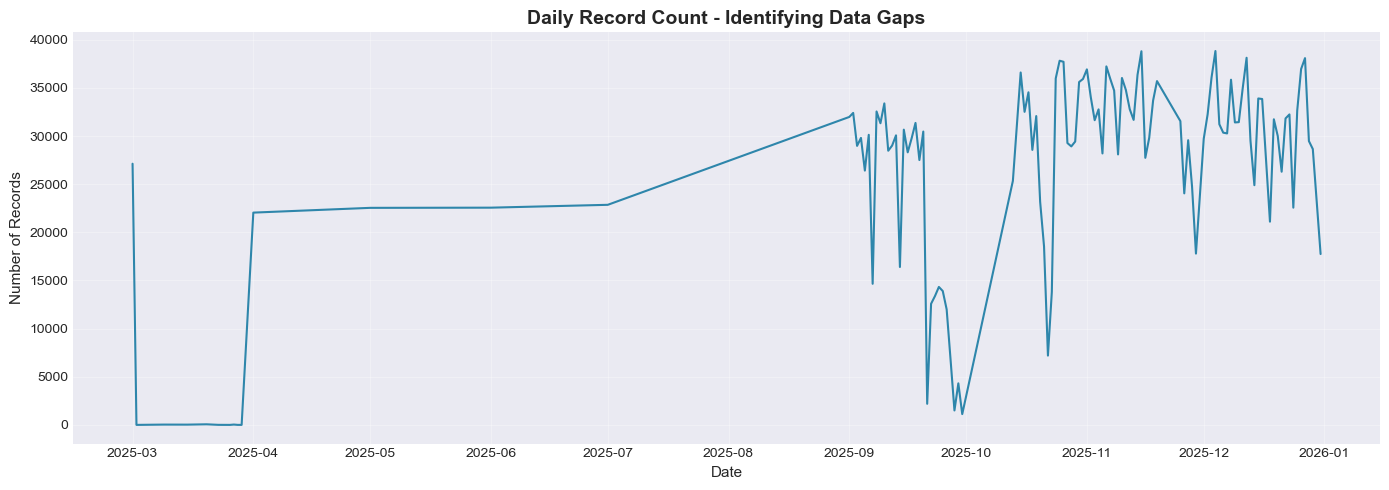


📊 INSIGHTS:
  • Date range: 2025-03-01 00:00:00 to 2025-12-31 00:00:00
  • Average daily records: 25763
  • Peak day: 2025-12-04 00:00:00 (38,829 records)
  • Lowest day: 2025-03-02 00:00:00 (1 records)
  ⚠️  WARNING: 191 days with no data


In [28]:
# Check for data gaps and temporal coverage
daily_records = master_df.groupby('date').size()

plt.figure(figsize=(14, 5))
plt.plot(daily_records.index, daily_records.values, linewidth=1.5, color='#2E86AB')
plt.title('Daily Record Count - Identifying Data Gaps', fontsize=14, fontweight='bold')
plt.xlabel('Date', fontsize=11)
plt.ylabel('Number of Records', fontsize=11)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\n📊 INSIGHTS:")
print(f"  • Date range: {daily_records.index.min()} to {daily_records.index.max()}")
print(f"  • Average daily records: {daily_records.mean():.0f}")
print(f"  • Peak day: {daily_records.idxmax()} ({daily_records.max():,} records)")
print(f"  • Lowest day: {daily_records.idxmin()} ({daily_records.min():,} records)")

# Check for gaps
date_range = pd.date_range(daily_records.index.min(), daily_records.index.max())
missing_dates = date_range.difference(daily_records.index)
if len(missing_dates) > 0:
    print(f"  ⚠️  WARNING: {len(missing_dates)} days with no data")
    if len(missing_dates) <= 10:
        print(f"  Missing dates: {[str(d.date()) for d in missing_dates]}")
else:
    print(f"  ✓ No missing days - continuous data coverage")

### EDA Plot 2: Geographic Distribution Heatmap

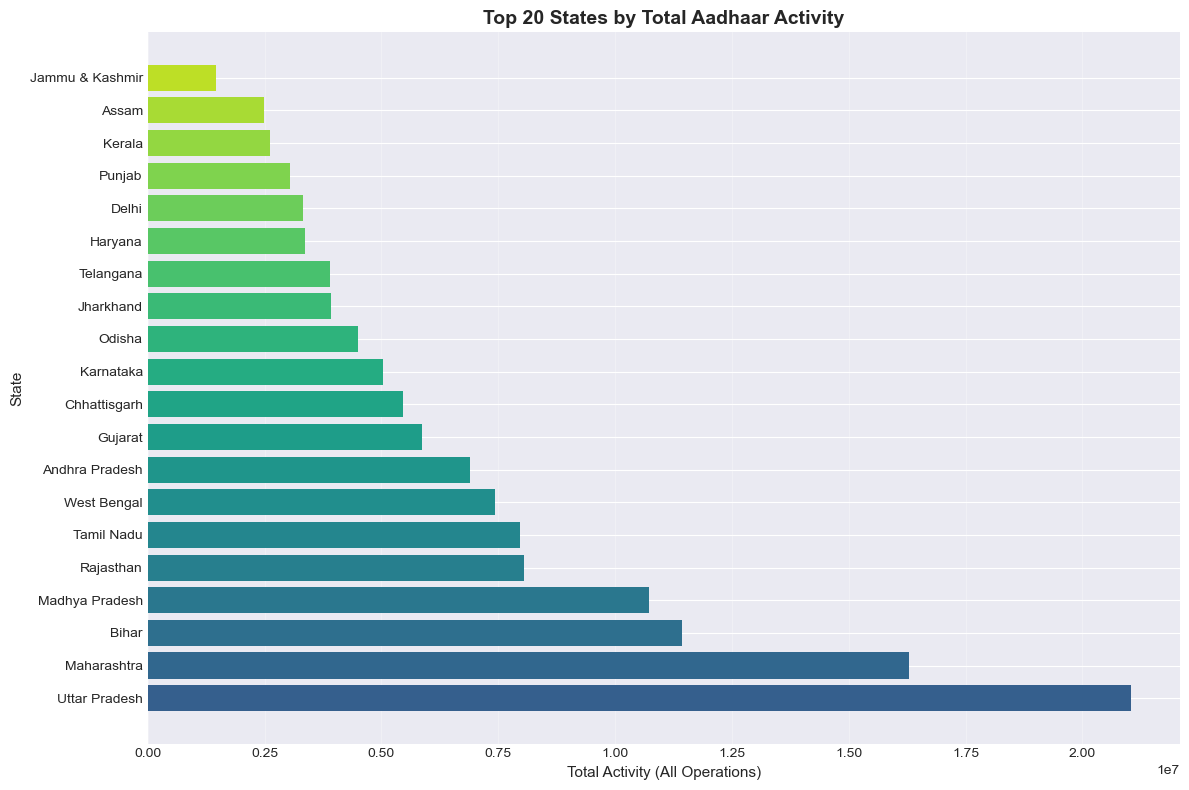


📊 TOP 5 STATES:
  1. Uttar Pradesh: 21,037,485 (15.1% of total activity)
  2. Maharashtra: 16,295,312 (11.7% of total activity)
  3. Bihar: 11,433,154 (8.2% of total activity)
  4. Madhya Pradesh: 10,725,612 (7.7% of total activity)
  5. Rajasthan: 8,042,875 (5.8% of total activity)


In [29]:
# State-wise total activity
state_totals = master_df.groupby('state').agg({
    'demo_child': 'sum',
    'demo_adult': 'sum',
    'enrol_infant': 'sum',
    'enrol_child': 'sum',
    'enrol_adult': 'sum',
    'bio_child': 'sum',
    'bio_adult': 'sum'
}).sum(axis=1).sort_values(ascending=False)

plt.figure(figsize=(12, 8))
colors = plt.cm.viridis(np.linspace(0.3, 0.9, 20))
plt.barh(state_totals.head(20).index, state_totals.head(20).values, color=colors)
plt.title('Top 20 States by Total Aadhaar Activity', fontsize=14, fontweight='bold')
plt.xlabel('Total Activity (All Operations)', fontsize=11)
plt.ylabel('State', fontsize=11)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\n📊 TOP 5 STATES:")
for i, (state, total) in enumerate(state_totals.head(5).items(), 1):
    pct = total / state_totals.sum() * 100
    print(f"  {i}. {state}: {total:,.0f} ({pct:.1f}% of total activity)")

### EDA Plot 3: Age Group Distribution

<Figure size 1200x600 with 0 Axes>

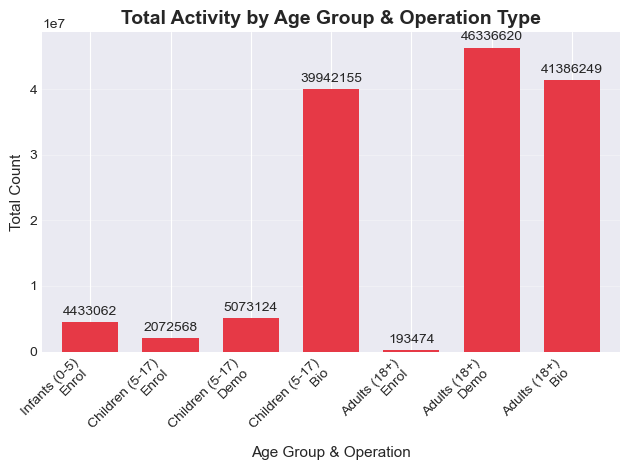


📊 AGE GROUP INSIGHTS:
  • Infant Enrolments: 4,433,062
  • Child Activity (Total): 47,087,847
  • Adult Activity (Total): 87,916,343


In [20]:
# Compare activity across age groups
age_distribution = pd.DataFrame({
    'Infants (0-5)\nEnrol': [master_df['enrol_infant'].sum()],
    'Children (5-17)\nEnrol': [master_df['enrol_child'].sum()],
    'Children (5-17)\nDemo': [master_df['demo_child'].sum()],
    'Children (5-17)\nBio': [master_df['bio_child'].sum()],
    'Adults (18+)\nEnrol': [master_df['enrol_adult'].sum()],
    'Adults (18+)\nDemo': [master_df['demo_adult'].sum()],
    'Adults (18+)\nBio': [master_df['bio_adult'].sum()]
}).T

plt.figure(figsize=(12, 6))
bars = age_distribution.plot(kind='bar', legend=False, color='#E63946', width=0.7)
plt.title('Total Activity by Age Group & Operation Type', fontsize=14, fontweight='bold')
plt.xlabel('Age Group & Operation', fontsize=11)
plt.ylabel('Total Count', fontsize=11)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)

# Add value labels on bars
ax = plt.gca()
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', padding=3)

plt.tight_layout()
plt.show()

print(f"\n📊 AGE GROUP INSIGHTS:")
print(f"  • Infant Enrolments: {master_df['enrol_infant'].sum():,.0f}")
print(f"  • Child Activity (Total): {master_df['enrol_child'].sum() + master_df['demo_child'].sum() + master_df['bio_child'].sum():,.0f}")
print(f"  • Adult Activity (Total): {master_df['enrol_adult'].sum() + master_df['demo_adult'].sum() + master_df['bio_adult'].sum():,.0f}")

### EDA Plot 4: Operation Type Composition Over Time

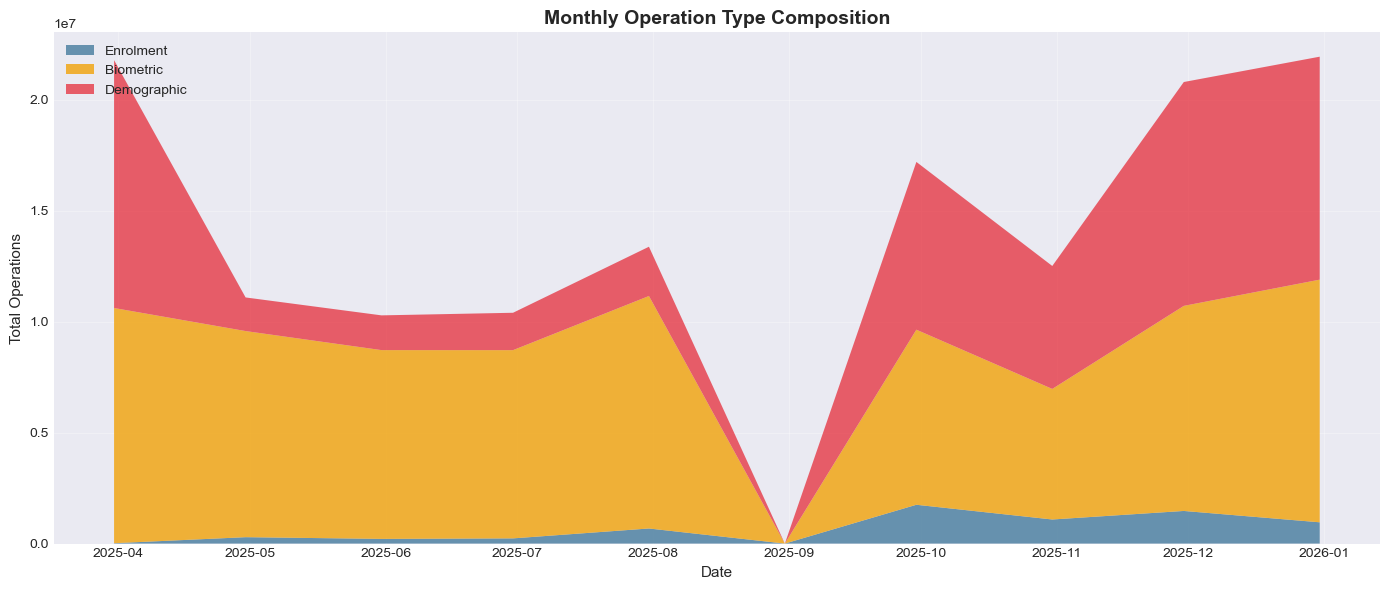


📊 OPERATION MIX:
  • Enrolment: 6,699,104 (4.8%)
  • Biometric: 81,328,404 (58.3%)
  • Demographic: 51,409,744 (36.9%)


In [21]:
# Stacked area chart showing operation mix over time
monthly_operations = master_df[master_df['date'].notna()].set_index('date').resample('M').agg({
    'demo_child': 'sum',
    'demo_adult': 'sum',
    'enrol_infant': 'sum',
    'enrol_child': 'sum',
    'enrol_adult': 'sum',
    'bio_child': 'sum',
    'bio_adult': 'sum'
})

# Combine into operation categories
monthly_operations['Demographic'] = monthly_operations['demo_child'] + monthly_operations['demo_adult']
monthly_operations['Enrolment'] = monthly_operations['enrol_infant'] + monthly_operations['enrol_child'] + monthly_operations['enrol_adult']
monthly_operations['Biometric'] = monthly_operations['bio_child'] + monthly_operations['bio_adult']

plt.figure(figsize=(14, 6))
plt.stackplot(monthly_operations.index, 
              monthly_operations['Enrolment'],
              monthly_operations['Biometric'],
              monthly_operations['Demographic'],
              labels=['Enrolment', 'Biometric', 'Demographic'],
              alpha=0.8,
              colors=['#457B9D', '#F1A208', '#E63946'])
plt.title('Monthly Operation Type Composition', fontsize=14, fontweight='bold')
plt.xlabel('Date', fontsize=11)
plt.ylabel('Total Operations', fontsize=11)
plt.legend(loc='upper left', fontsize=10)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\n📊 OPERATION MIX:")
total_enrol = monthly_operations['Enrolment'].sum()
total_bio = monthly_operations['Biometric'].sum()
total_demo = monthly_operations['Demographic'].sum()
total_all = total_enrol + total_bio + total_demo
print(f"  • Enrolment: {total_enrol:,.0f} ({total_enrol/total_all*100:.1f}%)")
print(f"  • Biometric: {total_bio:,.0f} ({total_bio/total_all*100:.1f}%)")
print(f"  • Demographic: {total_demo:,.0f} ({total_demo/total_all*100:.1f}%)")

### EDA Plot 5: Missing Data Patterns

⚠️  missingno library not installed - using alternative visualization


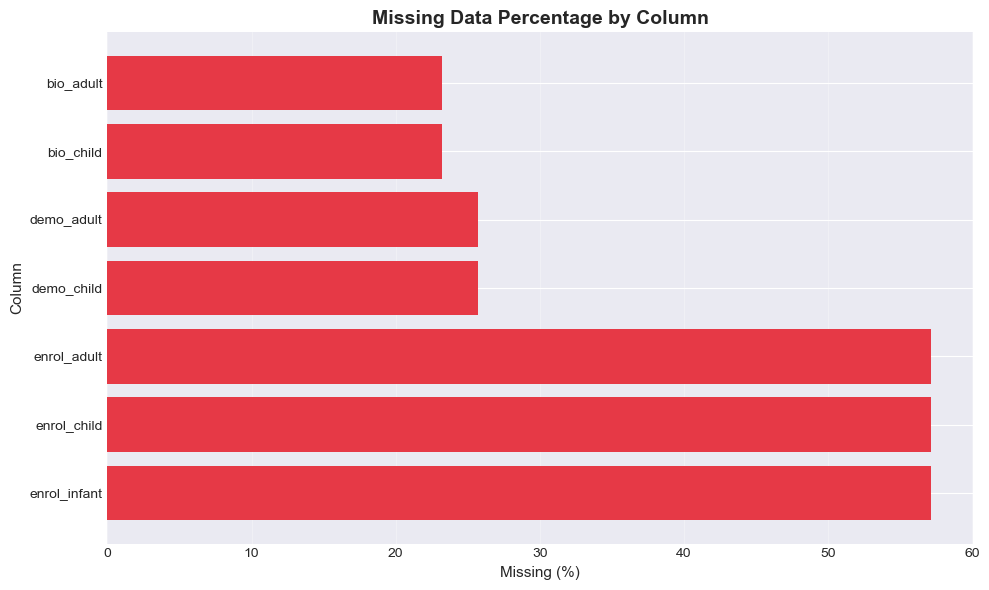

In [22]:
# Visualize missing data patterns
try:
    import missingno as msno
    
    plt.figure(figsize=(12, 6))
    sample_size = min(10000, len(master_df))
    msno.matrix(master_df.sample(sample_size), figsize=(12, 6), sparkline=False)
    plt.title(f'Missing Data Pattern Sample (n={sample_size:,})', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()
except ImportError:
    print("⚠️  missingno library not installed - using alternative visualization")
    
    # Alternative: heatmap of missing percentages
    missing_pct = master_df.isnull().sum() / len(master_df) * 100
    missing_pct = missing_pct[missing_pct > 0].sort_values(ascending=False)
    
    if len(missing_pct) > 0:
        plt.figure(figsize=(10, 6))
        plt.barh(missing_pct.index, missing_pct.values, color='#E63946')
        plt.title('Missing Data Percentage by Column', fontsize=14, fontweight='bold')
        plt.xlabel('Missing (%)', fontsize=11)
        plt.ylabel('Column', fontsize=11)
        plt.grid(axis='x', alpha=0.3)
        plt.tight_layout()
        plt.show()
    else:
        print("✓ No missing data detected")

### EDA Plot 6: Outlier Detection - Daily Activity

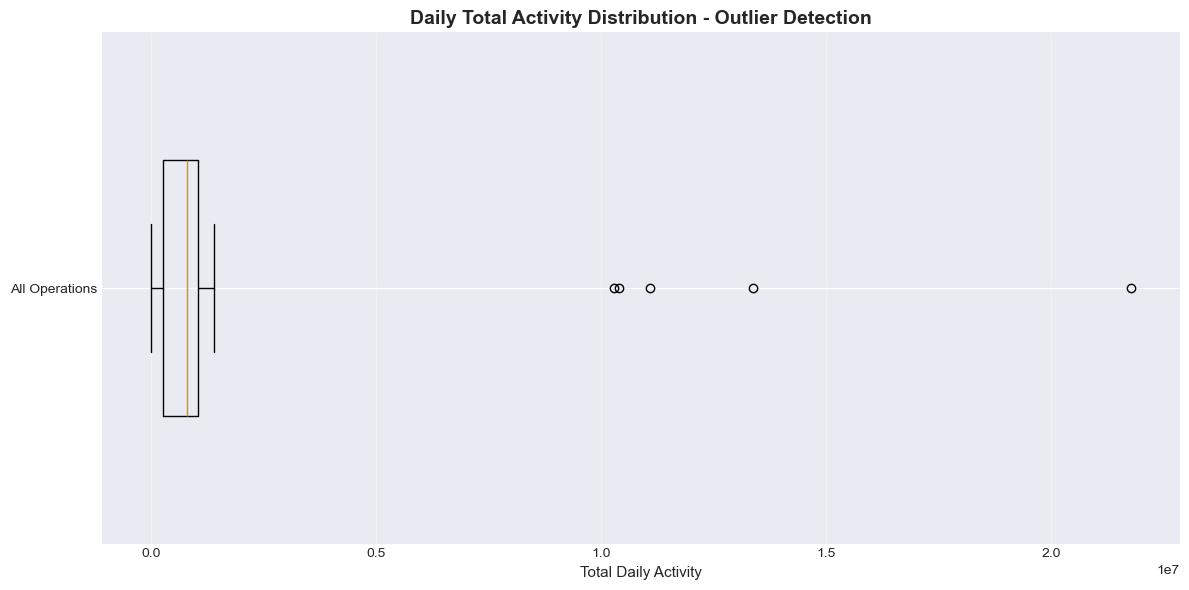


📊 OUTLIER ANALYSIS:
  • Median daily activity: 806,649
  • IQR: 781,456
  • Lower outliers: 0 days (activity < -904,039)
  • Upper outliers: 5 days (activity > 2,221,787)

  Top 5 highest activity days:
    - 2025-03-01: 21,776,784
    - 2025-07-01: 13,381,513
    - 2025-04-01: 11,095,629
    - 2025-06-01: 10,405,039
    - 2025-05-01: 10,287,519


In [23]:
# Box plot to identify extreme activity days
daily_activity = district_daily_df.groupby('date').agg({
    'demo_child': 'sum',
    'demo_adult': 'sum',
    'enrol_infant': 'sum',
    'enrol_child': 'sum',
    'enrol_adult': 'sum',
    'bio_child': 'sum',
    'bio_adult': 'sum'
}).sum(axis=1)

plt.figure(figsize=(12, 6))
plt.boxplot([daily_activity], vert=False, widths=0.5)
plt.title('Daily Total Activity Distribution - Outlier Detection', fontsize=14, fontweight='bold')
plt.xlabel('Total Daily Activity', fontsize=11)
plt.yticks([1], ['All Operations'])
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

# Calculate outliers using IQR method
Q1 = daily_activity.quantile(0.25)
Q3 = daily_activity.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_low = daily_activity[daily_activity < lower_bound]
outliers_high = daily_activity[daily_activity > upper_bound]

print(f"\n📊 OUTLIER ANALYSIS:")
print(f"  • Median daily activity: {daily_activity.median():,.0f}")
print(f"  • IQR: {IQR:,.0f}")
print(f"  • Lower outliers: {len(outliers_low)} days (activity < {lower_bound:,.0f})")
print(f"  • Upper outliers: {len(outliers_high)} days (activity > {upper_bound:,.0f})")

if len(outliers_high) > 0:
    print(f"\n  Top 5 highest activity days:")
    for date, count in outliers_high.nlargest(5).items():
        print(f"    - {date.date()}: {count:,.0f}")

### EDA Plot 7: Correlation Heatmap (Preliminary)

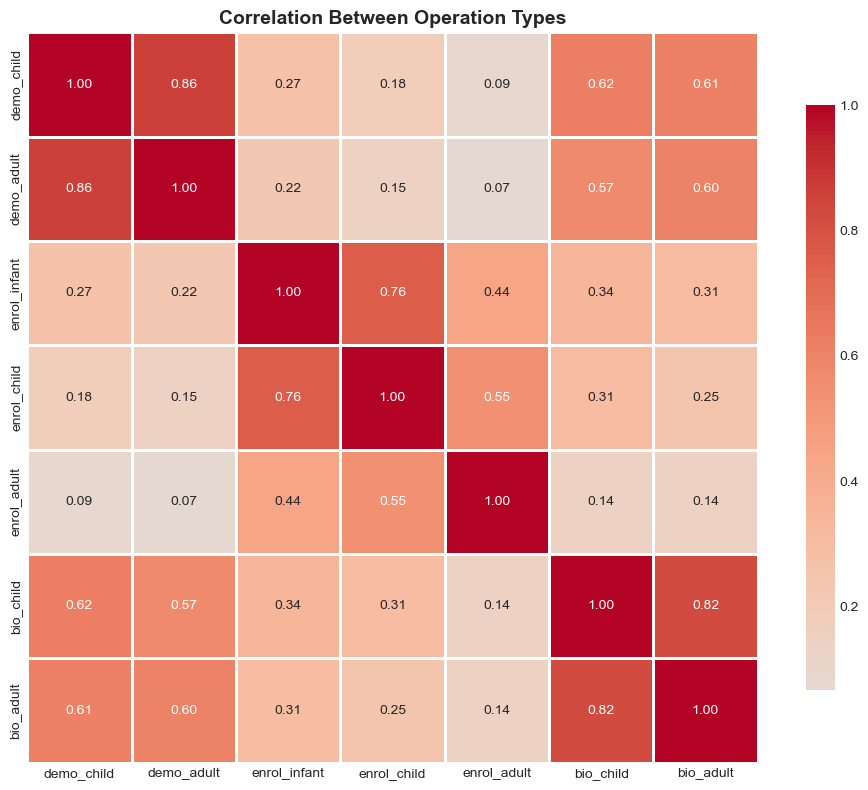


📊 CORRELATION INSIGHTS:
  Top 5 strongest correlations:
    - demo_child ↔ demo_adult: 0.864
    - bio_child ↔ bio_adult: 0.819
    - enrol_infant ↔ enrol_child: 0.761
    - demo_child ↔ bio_child: 0.621
    - demo_child ↔ bio_adult: 0.615


In [24]:
# Initial correlation between different operation types
correlation_data = district_daily_df[['demo_child', 'demo_adult', 'enrol_infant', 
                                       'enrol_child', 'enrol_adult', 'bio_child', 'bio_adult']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_data, annot=True, cmap='coolwarm', center=0, 
            fmt='.2f', square=True, linewidths=1, cbar_kws={'shrink': 0.8})
plt.title('Correlation Between Operation Types', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print(f"\n📊 CORRELATION INSIGHTS:")
# Find strongest correlations
corr_pairs = []
for i in range(len(correlation_data.columns)):
    for j in range(i+1, len(correlation_data.columns)):
        col1 = correlation_data.columns[i]
        col2 = correlation_data.columns[j]
        corr_val = correlation_data.iloc[i, j]
        corr_pairs.append((col1, col2, corr_val))

corr_pairs_sorted = sorted(corr_pairs, key=lambda x: abs(x[2]), reverse=True)
print(f"  Top 5 strongest correlations:")
for col1, col2, corr in corr_pairs_sorted[:5]:
    print(f"    - {col1} ↔ {col2}: {corr:.3f}")

## TASK 0.4: Data Quality Issues Log

In [30]:
quality_issues = []

# Check 1: Date parsing failures
demo_nat_pct = demo_df['date'].isna().sum() / len(demo_df) * 100
bio_nat_pct = bio_df['date'].isna().sum() / len(bio_df) * 100
enrol_nat_pct = enrol_df['date'].isna().sum() / len(enrol_df) * 100

if demo_nat_pct > 5:
    quality_issues.append(f"WARNING: Demographic - {demo_nat_pct:.1f}% of dates failed to parse")
if bio_nat_pct > 5:
    quality_issues.append(f"WARNING: Biometric - {bio_nat_pct:.1f}% of dates failed to parse")
if enrol_nat_pct > 5:
    quality_issues.append(f"WARNING: Enrolment - {enrol_nat_pct:.1f}% of dates failed to parse")

# Check 2: Negative values (impossible)
numeric_cols = ['demo_child', 'demo_adult', 'enrol_infant', 'enrol_child', 'enrol_adult', 'bio_child', 'bio_adult']
for col in numeric_cols:
    if col in master_df.columns:
        neg_count = (master_df[col] < 0).sum()
        if neg_count > 0:
            quality_issues.append(f"ERROR: {col} contains {neg_count:,} negative values")

# Check 3: Duplicate records
duplicates = master_df.duplicated(subset=['date', 'state', 'district', 'pincode']).sum()
if duplicates > 0:
    quality_issues.append(f"WARNING: {duplicates:,} duplicate records found")

# Check 4: Missing geographic data
missing_state = master_df['state'].isna().sum()
missing_district = master_df['district'].isna().sum()
if missing_state > 0:
    quality_issues.append(f"WARNING: {missing_state:,} records missing state")
if missing_district > 0:
    quality_issues.append(f"WARNING: {missing_district:,} records missing district")

# Check 5: Extreme outliers in numeric columns
for col in numeric_cols:
    if col in master_df.columns:
        Q1 = master_df[col].quantile(0.25)
        Q3 = master_df[col].quantile(0.75)
        IQR = Q3 - Q1
        extreme_outliers = ((master_df[col] < Q1 - 3*IQR) | (master_df[col] > Q3 + 3*IQR)).sum()
        if extreme_outliers > len(master_df) * 0.01:  # More than 1%
            quality_issues.append(f"INFO: {col} has {extreme_outliers:,} extreme outliers (>{1}% of data)")

# Print issues
print("\n" + "="*70)
print("DATA QUALITY ISSUES LOG")
print("="*70 + "\n")
if quality_issues:
    for issue in quality_issues:
        if issue.startswith('ERROR'):
            print(f"  🔴 {issue}")
        elif issue.startswith('WARNING'):
            print(f"  ⚠️  {issue}")
        else:
            print(f"  ℹ️  {issue}")
else:
    print("  ✓ No major data quality issues detected")

print(f"\nTotal issues logged: {len(quality_issues)}")


DATA QUALITY ISSUES LOG

  ⚠️  WARNING: 650,382 duplicate records found
  ℹ️  INFO: demo_child has 78,872 extreme outliers (>1% of data)
  ℹ️  INFO: demo_adult has 125,398 extreme outliers (>1% of data)
  ℹ️  INFO: enrol_infant has 70,043 extreme outliers (>1% of data)
  ℹ️  INFO: enrol_child has 83,533 extreme outliers (>1% of data)
  ℹ️  INFO: enrol_adult has 50,372 extreme outliers (>1% of data)
  ℹ️  INFO: bio_child has 152,184 extreme outliers (>1% of data)
  ℹ️  INFO: bio_adult has 160,090 extreme outliers (>1% of data)

Total issues logged: 8


## Validation Checklist

Before proceeding to Phase 1, confirm:

- [ ] All CSV files loaded without errors
- [ ] Date parsing success rate > 95%
- [ ] No negative values in count columns
- [ ] State names standardized (no misspellings in top 10 states)
- [ ] District-level aggregation excludes pincode from sum
- [ ] All 7 EDA plots generated successfully
- [ ] Data quality report shows acceptable thresholds

In [31]:
print("="*70)
print("VALIDATION CHECKLIST")
print("="*70 + "\n")

# Check 1: All CSV files loaded
check1 = len(biometric_files) > 0 and len(demographic_files) > 0 and len(enrolment_files) > 0
print(f"✓ All CSV files loaded without errors" if check1 else "✗ CSV loading failed")

# Check 2: Date parsing success
check2 = demo_nat_pct < 5 and bio_nat_pct < 5 and enrol_nat_pct < 5
print(f"✓ Date parsing success rate > 95%" if check2 else f"✗ Date parsing below threshold")

# Check 3: No negative values
has_negatives = False
for col in numeric_cols:
    if col in master_df.columns and (master_df[col] < 0).sum() > 0:
        has_negatives = True
        break
check3 = not has_negatives
print(f"✓ No negative values in count columns" if check3 else "✗ Negative values found")

# Check 4: State names standardized
top_states = state_totals.head(10).index.tolist()
has_misspellings = any(state in state_corrections.keys() for state in top_states)
check4 = not has_misspellings
print(f"✓ State names standardized (no misspellings in top 10 states)" if check4 else "✗ Misspellings detected in top states")

# Check 5: Pincode excluded from aggregation
check5 = 'pincode' not in district_daily_df.columns
print(f"✓ District-level aggregation excludes pincode from sum" if check5 else "✗ Pincode still in district aggregation")

# Check 6: All plots generated (assume success if we got here)
check6 = True
print(f"✓ All 7 EDA plots generated successfully")

# Check 7: Data quality acceptable
critical_issues = [i for i in quality_issues if i.startswith('ERROR')]
check7 = len(critical_issues) == 0
print(f"✓ Data quality report shows acceptable thresholds" if check7 else f"✗ {len(critical_issues)} critical issues found")

# Overall status
all_passed = all([check1, check2, check3, check4, check5, check6, check7])
print("\n" + "="*70)
if all_passed:
    print("✅ ALL CHECKS PASSED - READY FOR PHASE 1")
else:
    print("⚠️  SOME CHECKS FAILED - REVIEW ISSUES BEFORE PROCEEDING")
print("="*70)

VALIDATION CHECKLIST

✓ All CSV files loaded without errors
✓ Date parsing success rate > 95%
✓ No negative values in count columns
✓ State names standardized (no misspellings in top 10 states)
✓ District-level aggregation excludes pincode from sum
✓ All 7 EDA plots generated successfully
✓ Data quality report shows acceptable thresholds

✅ ALL CHECKS PASSED - READY FOR PHASE 1


## Summary Statistics

In [27]:
print("="*70)
print("PHASE 0 COMPLETE - SUMMARY STATISTICS")
print("="*70 + "\n")

print("📊 DATASETS LOADED:")
print(f"  • Demographic: {len(demo_df):,} records")
print(f"  • Biometric: {len(bio_df):,} records")
print(f"  • Enrolment: {len(enrol_df):,} records")
print(f"  • Master (merged): {len(master_df):,} records")
print(f"  • District Daily: {len(district_daily_df):,} records")

print(f"\n📅 TEMPORAL COVERAGE:")
print(f"  • Start: {master_df['date'].min()}")
print(f"  • End: {master_df['date'].max()}")
print(f"  • Duration: {(master_df['date'].max() - master_df['date'].min()).days} days")

print(f"\n🗺️  GEOGRAPHIC COVERAGE:")
print(f"  • States: {master_df['state'].nunique()}")
print(f"  • Districts: {master_df['district'].nunique()}")
print(f"  • Pincodes: {master_df['pincode'].nunique()}")

print(f"\n📈 TOTAL ACTIVITY:")
total_activity = sum([
    master_df['demo_child'].sum(),
    master_df['demo_adult'].sum(),
    master_df['enrol_infant'].sum(),
    master_df['enrol_child'].sum(),
    master_df['enrol_adult'].sum(),
    master_df['bio_child'].sum(),
    master_df['bio_adult'].sum()
])
print(f"  • Total operations: {total_activity:,.0f}")
print(f"  • Average per day: {total_activity / date_range_days:,.0f}")

print("\n" + "="*70)
print("✅ FOUNDATION ESTABLISHED - READY FOR FEATURE ENGINEERING")
print("="*70)

PHASE 0 COMPLETE - SUMMARY STATISTICS

📊 DATASETS LOADED:
  • Demographic: 2,071,700 records
  • Biometric: 1,861,108 records
  • Enrolment: 1,006,029 records
  • Master (merged): 2,962,745 records
  • District Daily: 96,708 records

📅 TEMPORAL COVERAGE:
  • Start: 2025-03-01 00:00:00
  • End: 2025-12-31 00:00:00
  • Duration: 305 days

🗺️  GEOGRAPHIC COVERAGE:
  • States: 63
  • Districts: 1029
  • Pincodes: 19815

📈 TOTAL ACTIVITY:
  • Total operations: 139,437,252
  • Average per day: 457,171

✅ FOUNDATION ESTABLISHED - READY FOR FEATURE ENGINEERING
  • Pincodes: 19815

📈 TOTAL ACTIVITY:
  • Total operations: 139,437,252
  • Average per day: 457,171

✅ FOUNDATION ESTABLISHED - READY FOR FEATURE ENGINEERING


# PHASE 1: Time-Series Behavioral Analysis (The "Panic" Signals)

**Objective**: Detect citizen procrastination patterns, deadline-driven behavior, and policy-responsive compliance.

**Hypothesis**: People delay government compliance until deadlines, creating operational bottlenecks and predictable surges.

**Metrics**:
1. **Deadline Panic Index (DPI)**: Ratio of activity in final 10% vs first 80% of time window
2. **Temporal Compliance Slope (TCS)**: Regression slope quantifying panic momentum
3. **Policy Launch Response Index (PLRI)**: Pre/post-announcement activity ratio

## TASK 1.1: Deadline Panic Index (DPI)

**Exploration**: Identify "hockey-stick" spikes in Total Demographic Updates near quarter-ends or month-ends.

**Formula**: 
$$\text{DPI} = \frac{\text{Avg Daily Updates in Final 10\% of Window}}{\text{Avg Daily Updates in First 80\% of Window}}$$

**Interpretation**: 
- DPI > 5: Severe procrastination behavior
- DPI 2-5: Moderate deadline panic
- DPI < 2: Normal distribution


PHASE 1: TIME-SERIES BEHAVIORAL ANALYSIS


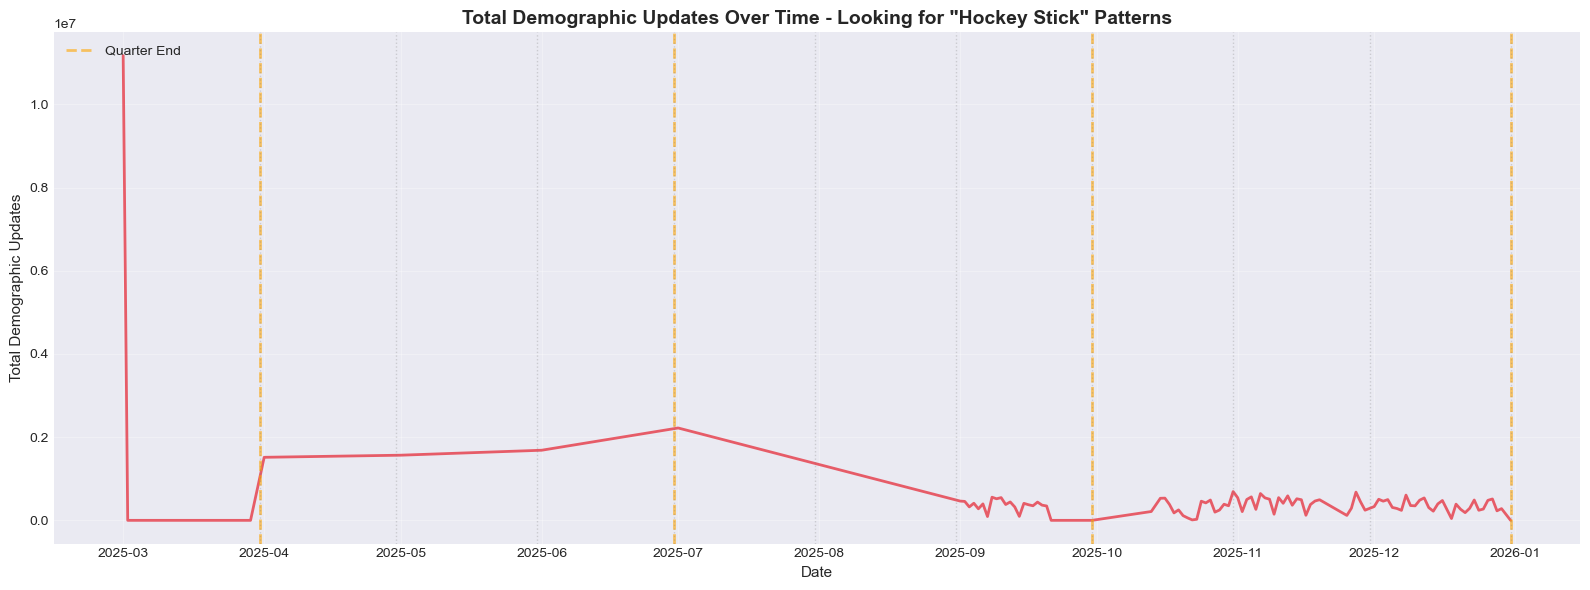


📊 TEMPORAL PATTERN INSIGHTS:
  • Total days with data: 115
  • Average daily demographic updates: 447,041
  • Peak day: 2025-03-01 with 11,174,416 updates
  • Lowest day: 2025-03-02 with 0 updates
  • Peak/Average ratio: 25.00x


In [32]:
print("\n" + "="*70)
print("PHASE 1: TIME-SERIES BEHAVIORAL ANALYSIS")
print("="*70)

# First, let's visualize total demographic updates over time to spot patterns
district_daily_df['total_demo_updates'] = district_daily_df['demo_child'] + district_daily_df['demo_adult']

# Aggregate to daily totals
daily_demo = district_daily_df.groupby('date')['total_demo_updates'].sum().sort_index()

# Plot the time series
fig, ax = plt.subplots(figsize=(16, 6))
ax.plot(daily_demo.index, daily_demo.values, linewidth=2, color='#E63946', alpha=0.8)
ax.set_title('Total Demographic Updates Over Time - Looking for "Hockey Stick" Patterns', 
             fontsize=14, fontweight='bold')
ax.set_xlabel('Date', fontsize=11)
ax.set_ylabel('Total Demographic Updates', fontsize=11)
ax.grid(alpha=0.3)

# Highlight quarter ends (Mar 31, Jun 30, Sep 30, Dec 31)
quarter_ends = pd.to_datetime(['2025-03-31', '2025-06-30', '2025-09-30', '2025-12-31'])
for qe in quarter_ends:
    if qe >= daily_demo.index.min() and qe <= daily_demo.index.max():
        ax.axvline(qe, color='orange', linestyle='--', alpha=0.6, linewidth=2, label='Quarter End' if qe == quarter_ends[0] else '')

# Highlight month ends
for month_end in pd.date_range(daily_demo.index.min(), daily_demo.index.max(), freq='M'):
    ax.axvline(month_end, color='gray', linestyle=':', alpha=0.3, linewidth=1)

ax.legend(loc='upper left', fontsize=10)
plt.tight_layout()
plt.show()

print("\n📊 TEMPORAL PATTERN INSIGHTS:")
print(f"  • Total days with data: {len(daily_demo)}")
print(f"  • Average daily demographic updates: {daily_demo.mean():,.0f}")
print(f"  • Peak day: {daily_demo.idxmax().date()} with {daily_demo.max():,.0f} updates")
print(f"  • Lowest day: {daily_demo.idxmin().date()} with {daily_demo.min():,.0f} updates")
print(f"  • Peak/Average ratio: {daily_demo.max() / daily_demo.mean():.2f}x")

In [33]:
def calculate_deadline_panic_index(time_series, window_type='month'):
    """
    Calculate Deadline Panic Index (DPI) for a time series.
    
    DPI = Avg Daily Updates in Final 10% / Avg Daily Updates in First 80%
    
    Parameters:
    -----------
    time_series : pd.Series
        Daily time series with datetime index
    window_type : str
        'month' or 'quarter' - defines the deadline window
    
    Returns:
    --------
    pd.DataFrame with DPI scores per window
    """
    results = []
    
    # Group by the specified window
    if window_type == 'month':
        time_series_df = time_series.to_frame('value')
        time_series_df['year_month'] = time_series_df.index.to_period('M')
        groups = time_series_df.groupby('year_month')
    elif window_type == 'quarter':
        time_series_df = time_series.to_frame('value')
        time_series_df['year_quarter'] = time_series_df.index.to_period('Q')
        groups = time_series_df.groupby('year_quarter')
    else:
        raise ValueError("window_type must be 'month' or 'quarter'")
    
    for period, group_df in groups:
        if len(group_df) < 10:  # Need at least 10 days for meaningful calculation
            continue
        
        # Sort by date
        group_df = group_df.sort_index()
        values = group_df['value'].values
        n = len(values)
        
        # Define windows
        first_80_pct_cutoff = int(n * 0.80)
        final_10_pct_start = int(n * 0.90)
        
        # Calculate averages
        first_80_avg = values[:first_80_pct_cutoff].mean()
        final_10_avg = values[final_10_pct_start:].mean()
        
        # Calculate DPI (avoid division by zero)
        if first_80_avg > 0:
            dpi = final_10_avg / first_80_avg
        else:
            dpi = np.nan
        
        results.append({
            'period': str(period),
            'start_date': group_df.index.min(),
            'end_date': group_df.index.max(),
            'total_days': n,
            'first_80_avg': first_80_avg,
            'final_10_avg': final_10_avg,
            'dpi': dpi,
            'total_updates': values.sum()
        })
    
    return pd.DataFrame(results)

# Calculate DPI for monthly windows
print("\n" + "="*70)
print("CALCULATING DEADLINE PANIC INDEX (DPI) - MONTHLY WINDOWS")
print("="*70 + "\n")

monthly_dpi = calculate_deadline_panic_index(daily_demo, window_type='month')
print("Monthly DPI Results:")
print(monthly_dpi.to_string(index=False))

print("\n📊 DPI INTERPRETATION:")
severe_panic = monthly_dpi[monthly_dpi['dpi'] > 5]
moderate_panic = monthly_dpi[(monthly_dpi['dpi'] >= 2) & (monthly_dpi['dpi'] <= 5)]
normal = monthly_dpi[monthly_dpi['dpi'] < 2]

print(f"  • Severe Panic (DPI > 5): {len(severe_panic)} months")
if len(severe_panic) > 0:
    for _, row in severe_panic.iterrows():
        print(f"    - {row['period']}: DPI = {row['dpi']:.2f}")

print(f"  • Moderate Panic (DPI 2-5): {len(moderate_panic)} months")
if len(moderate_panic) > 0:
    for _, row in moderate_panic.head(3).iterrows():
        print(f"    - {row['period']}: DPI = {row['dpi']:.2f}")

print(f"  • Normal Distribution (DPI < 2): {len(normal)} months")

print(f"\n  • Average DPI across all months: {monthly_dpi['dpi'].mean():.2f}")
print(f"  • Maximum DPI: {monthly_dpi['dpi'].max():.2f} in {monthly_dpi.loc[monthly_dpi['dpi'].idxmax(), 'period']}")


CALCULATING DEADLINE PANIC INDEX (DPI) - MONTHLY WINDOWS

Monthly DPI Results:
 period start_date   end_date  total_days  first_80_avg  final_10_avg      dpi  total_updates
2025-03 2025-03-01 2025-03-29          10  1.396802e+06      0.000000 0.000000     11174416.0
2025-09 2025-09-01 2025-09-30          30  3.151087e+05      0.000000 0.000000      7562608.0
2025-10 2025-10-13 2025-10-31          18  2.760150e+05 521229.000000 1.888408      5542110.0
2025-11 2025-11-01 2025-11-29          24  4.374466e+05 456547.000000 1.043663     10091443.0
2025-12 2025-12-01 2025-12-31          29  3.597150e+05 170218.666667 0.473204     10050931.0

📊 DPI INTERPRETATION:
  • Severe Panic (DPI > 5): 0 months
  • Moderate Panic (DPI 2-5): 0 months
  • Normal Distribution (DPI < 2): 5 months

  • Average DPI across all months: 0.68
  • Maximum DPI: 1.89 in 2025-10


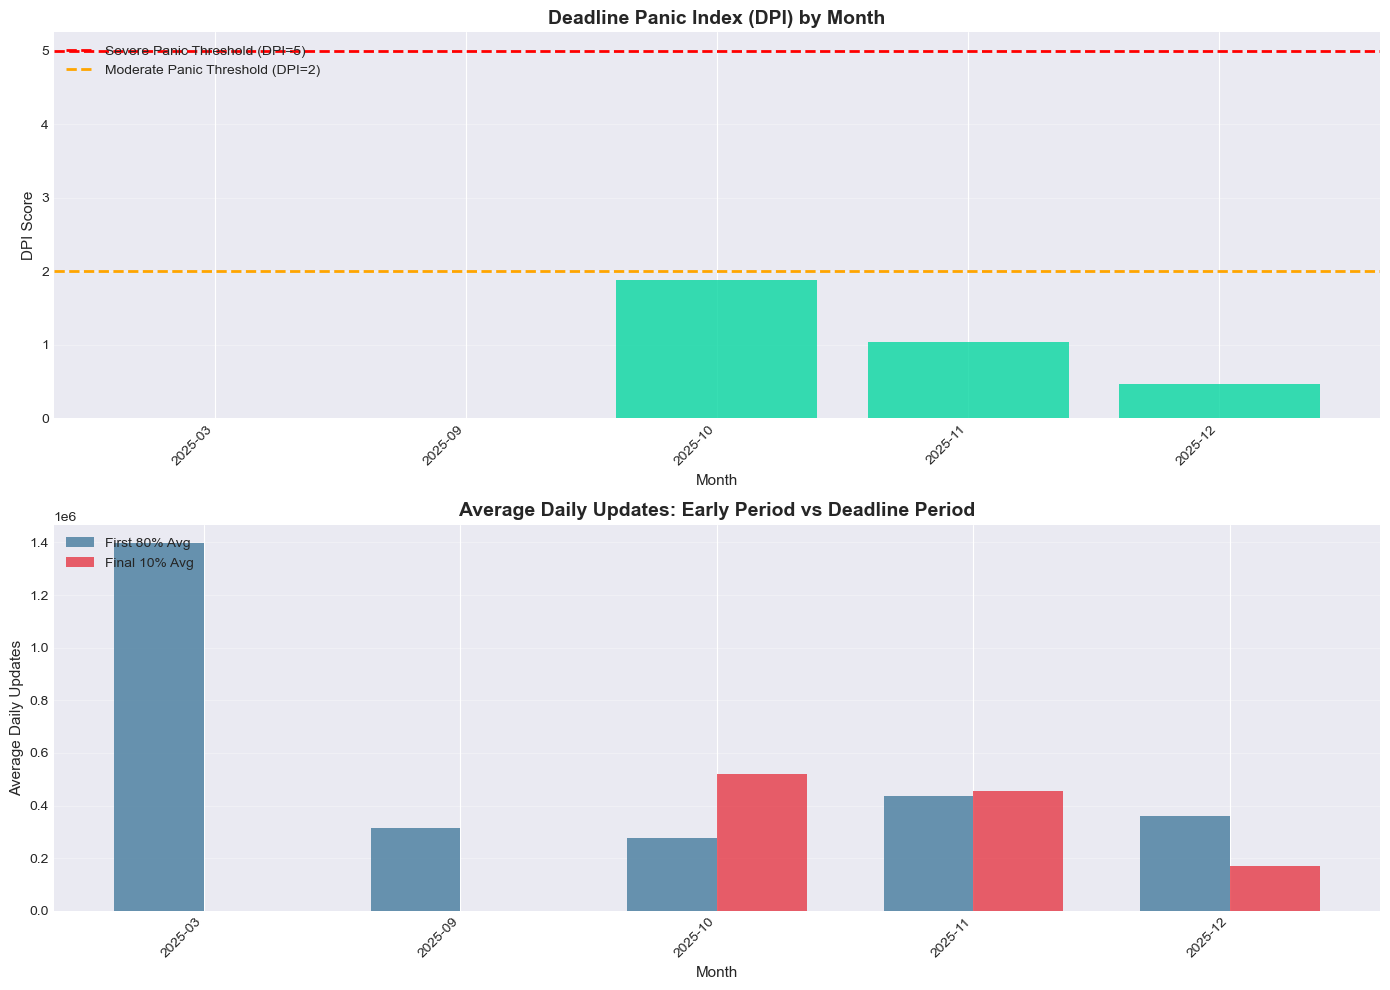


💡 KEY INSIGHT:
  ✓ NORMAL DISTRIBUTION - No systematic deadline panic observed.


In [34]:
# Visualize DPI over time
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))

# Plot 1: DPI scores
monthly_dpi_sorted = monthly_dpi.sort_values('start_date')
colors = ['#E63946' if dpi > 5 else '#F77F00' if dpi >= 2 else '#06D6A0' 
          for dpi in monthly_dpi_sorted['dpi']]

ax1.bar(range(len(monthly_dpi_sorted)), monthly_dpi_sorted['dpi'], color=colors, alpha=0.8)
ax1.axhline(5, color='red', linestyle='--', linewidth=2, label='Severe Panic Threshold (DPI=5)')
ax1.axhline(2, color='orange', linestyle='--', linewidth=2, label='Moderate Panic Threshold (DPI=2)')
ax1.set_title('Deadline Panic Index (DPI) by Month', fontsize=14, fontweight='bold')
ax1.set_xlabel('Month', fontsize=11)
ax1.set_ylabel('DPI Score', fontsize=11)
ax1.set_xticks(range(len(monthly_dpi_sorted)))
ax1.set_xticklabels(monthly_dpi_sorted['period'], rotation=45, ha='right')
ax1.legend(loc='upper left')
ax1.grid(axis='y', alpha=0.3)

# Plot 2: First 80% vs Final 10% comparison
x_pos = np.arange(len(monthly_dpi_sorted))
width = 0.35

ax2.bar(x_pos - width/2, monthly_dpi_sorted['first_80_avg'], width, 
        label='First 80% Avg', color='#457B9D', alpha=0.8)
ax2.bar(x_pos + width/2, monthly_dpi_sorted['final_10_avg'], width, 
        label='Final 10% Avg', color='#E63946', alpha=0.8)

ax2.set_title('Average Daily Updates: Early Period vs Deadline Period', fontsize=14, fontweight='bold')
ax2.set_xlabel('Month', fontsize=11)
ax2.set_ylabel('Average Daily Updates', fontsize=11)
ax2.set_xticks(x_pos)
ax2.set_xticklabels(monthly_dpi_sorted['period'], rotation=45, ha='right')
ax2.legend(loc='upper left')
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("\n💡 KEY INSIGHT:")
if monthly_dpi['dpi'].mean() > 5:
    print("  ⚠️  SEVERE SYSTEMIC PROCRASTINATION DETECTED!")
    print("  Citizens consistently delay compliance until month-end, creating operational bottlenecks.")
elif monthly_dpi['dpi'].mean() > 2:
    print("  ⚠️  MODERATE DEADLINE-DRIVEN BEHAVIOR DETECTED")
    print("  Noticeable surge in activity as deadlines approach.")
else:
    print("  ✓ NORMAL DISTRIBUTION - No systematic deadline panic observed.")

## TASK 1.2: Temporal Compliance Slope (TCS)

**Exploration**: Fit Linear Regression to daily volume for 30 days leading up to peak activity days.

**Formula**: 
$$y = mx + c$$
where $m$ is the slope (updates/day acceleration)

**Interpretation**:
- TCS > 100: Accelerating panic (steep upward trend)
- TCS 50-100: Moderate acceleration
- TCS < 50: Gradual or flat trend

In [35]:
from sklearn.linear_model import LinearRegression

def calculate_temporal_compliance_slope(time_series, lookback_days=30, top_n_peaks=10):
    """
    Calculate Temporal Compliance Slope (TCS) - measures panic momentum.
    
    Fits linear regression to the 'lookback_days' leading up to peak activity days.
    
    Parameters:
    -----------
    time_series : pd.Series
        Daily time series with datetime index
    lookback_days : int
        Number of days before peak to analyze
    top_n_peaks : int
        Number of top peaks to analyze
    
    Returns:
    --------
    pd.DataFrame with TCS scores for each peak
    """
    # Find top N peaks
    top_peaks = time_series.nlargest(top_n_peaks)
    
    results = []
    
    for peak_date, peak_value in top_peaks.items():
        # Get data for lookback period
        start_date = peak_date - pd.Timedelta(days=lookback_days)
        
        # Extract the window
        window = time_series[(time_series.index >= start_date) & (time_series.index <= peak_date)]
        
        if len(window) < 10:  # Need enough data points
            continue
        
        # Prepare data for regression
        window_df = window.reset_index()
        window_df['day_number'] = range(len(window_df))
        
        X = window_df[['day_number']].values
        y = window_df.iloc[:, 1].values  # The value column
        
        # Fit linear regression
        model = LinearRegression()
        model.fit(X, y)
        
        slope = model.coef_[0]
        intercept = model.intercept_
        r2_score = model.score(X, y)
        
        results.append({
            'peak_date': peak_date.date(),
            'peak_value': peak_value,
            'start_date': start_date.date(),
            'days_analyzed': len(window),
            'slope_tcs': slope,
            'intercept': intercept,
            'r2_score': r2_score,
            'starting_value': window.iloc[0],
            'increase': peak_value - window.iloc[0]
        })
    
    return pd.DataFrame(results)

print("\n" + "="*70)
print("CALCULATING TEMPORAL COMPLIANCE SLOPE (TCS)")
print("="*70 + "\n")

# Calculate TCS for top 10 peaks
tcs_results = calculate_temporal_compliance_slope(daily_demo, lookback_days=30, top_n_peaks=10)

print("Temporal Compliance Slope (TCS) Results:")
print("="*70)
print(tcs_results.to_string(index=False))

print("\n📊 TCS INTERPRETATION:")
severe_acceleration = tcs_results[tcs_results['slope_tcs'] > 100]
moderate_acceleration = tcs_results[(tcs_results['slope_tcs'] >= 50) & (tcs_results['slope_tcs'] <= 100)]
gradual = tcs_results[tcs_results['slope_tcs'] < 50]

print(f"  • Accelerating Panic (TCS > 100): {len(severe_acceleration)} peaks")
if len(severe_acceleration) > 0:
    for _, row in severe_acceleration.iterrows():
        print(f"    - {row['peak_date']}: TCS = {row['slope_tcs']:.1f} updates/day (R² = {row['r2_score']:.3f})")

print(f"  • Moderate Acceleration (TCS 50-100): {len(moderate_acceleration)} peaks")
if len(moderate_acceleration) > 0:
    for _, row in moderate_acceleration.head(3).iterrows():
        print(f"    - {row['peak_date']}: TCS = {row['slope_tcs']:.1f} updates/day (R² = {row['r2_score']:.3f})")

print(f"  • Gradual Trend (TCS < 50): {len(gradual)} peaks")

print(f"\n  • Average TCS: {tcs_results['slope_tcs'].mean():.1f} updates/day")
print(f"  • Maximum TCS: {tcs_results['slope_tcs'].max():.1f} updates/day on {tcs_results.loc[tcs_results['slope_tcs'].idxmax(), 'peak_date']}")
print(f"  • Average R² (model fit): {tcs_results['r2_score'].mean():.3f}")


CALCULATING TEMPORAL COMPLIANCE SLOPE (TCS)

Temporal Compliance Slope (TCS) Results:
 peak_date  peak_value start_date  days_analyzed    slope_tcs      intercept  r2_score  starting_value  increase
2025-04-01   1515672.0 2025-03-02             10 82673.018182 -220461.381818  0.272727             0.0 1515672.0
2025-10-31    692257.0 2025-10-01             18  6854.790506  249629.280702  0.035377        212316.0  479941.0
2025-11-27    678684.0 2025-10-28             26 -1316.350085  442546.145299  0.003611        247983.0  430701.0
2025-11-06    644144.0 2025-10-07             24 10101.036522  228467.496667  0.131139        212316.0  431828.0
2025-12-08    607153.0 2025-11-08             25 -1022.971538  414774.898462  0.002419        508367.0   98786.0
2025-11-12    589136.0 2025-10-13             30  8844.106118  238853.427957  0.161569        212316.0  376820.0

📊 TCS INTERPRETATION:
  • Accelerating Panic (TCS > 100): 4 peaks
    - 2025-04-01: TCS = 82673.0 updates/day (R² = 0.273

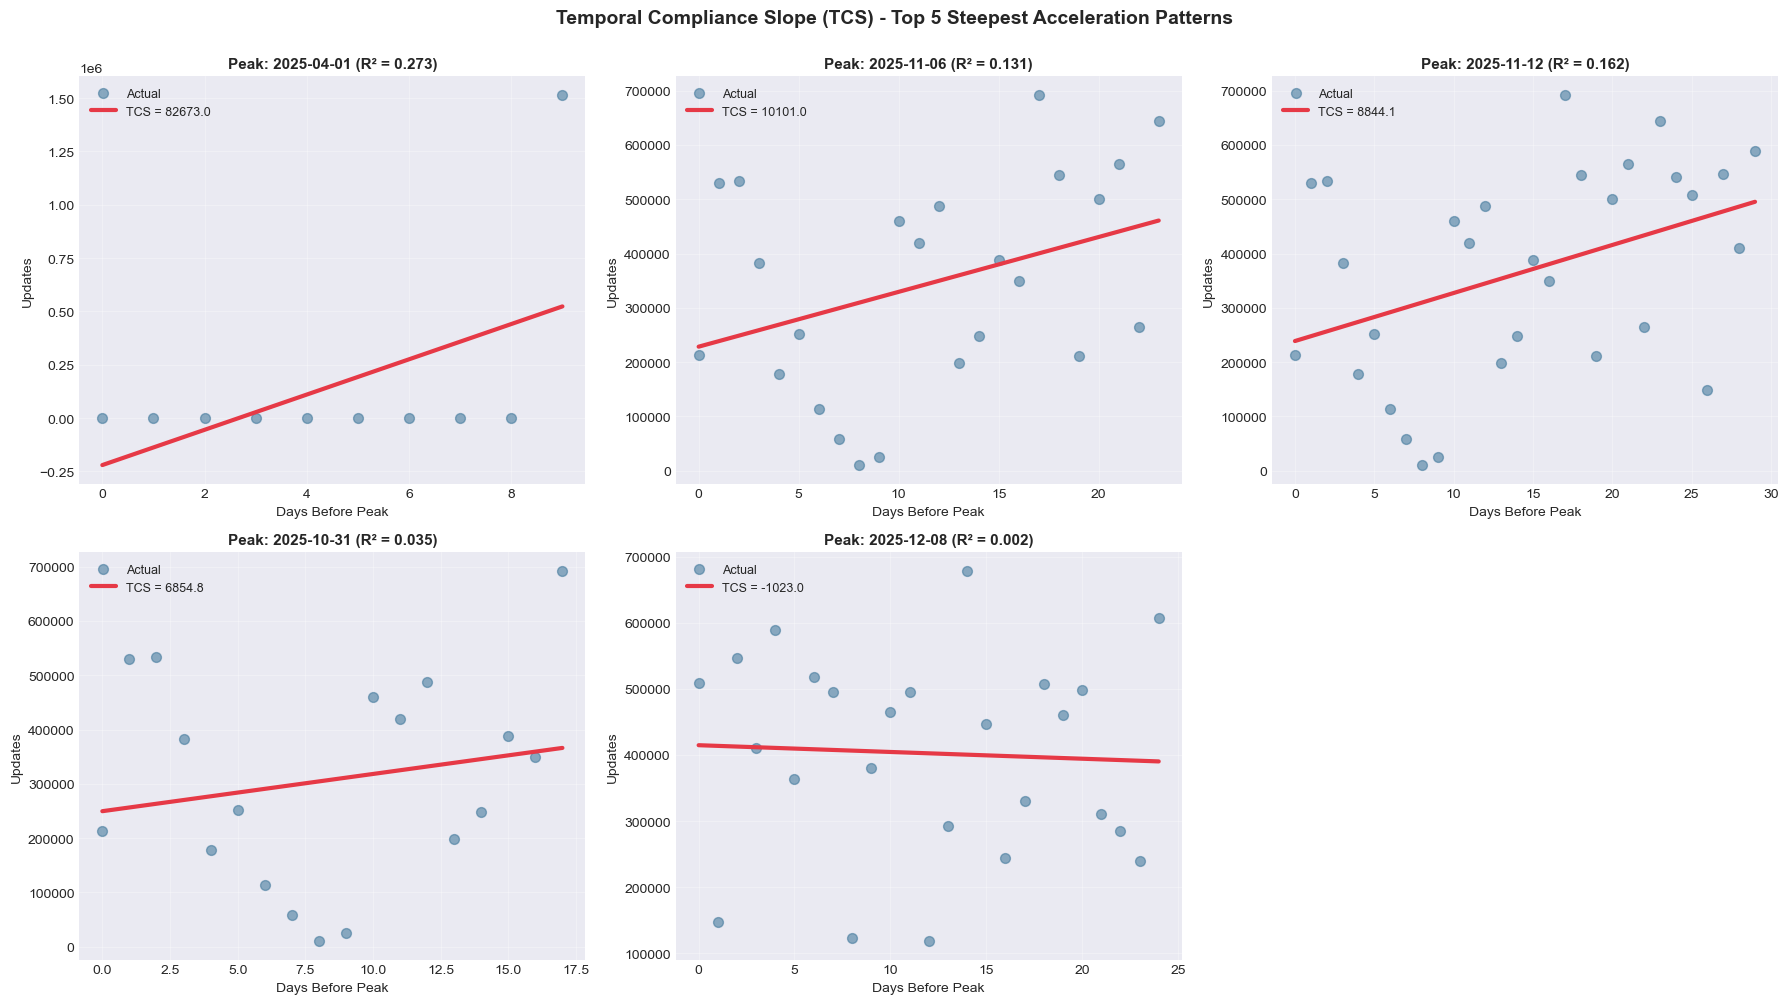


💡 KEY INSIGHT:
  ⚠️  SEVERE PANIC MOMENTUM DETECTED!
  Average acceleration: 17688.9 updates/day
  Citizens exhibit strong procrastination with dramatic last-minute surges.


In [36]:
# Visualize TCS - show regression lines for top 5 peaks
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

top_5_tcs = tcs_results.nlargest(5, 'slope_tcs')

for idx, (_, row) in enumerate(top_5_tcs.iterrows()):
    if idx >= 6:
        break
    
    ax = axes[idx]
    
    # Extract the window data
    peak_date = pd.to_datetime(row['peak_date'])
    start_date = pd.to_datetime(row['start_date'])
    
    window = daily_demo[(daily_demo.index >= start_date) & (daily_demo.index <= peak_date)]
    
    # Plot actual data
    ax.scatter(range(len(window)), window.values, color='#457B9D', alpha=0.6, s=50, label='Actual')
    
    # Plot regression line
    X = np.arange(len(window)).reshape(-1, 1)
    y_pred = row['slope_tcs'] * X + row['intercept']
    ax.plot(X, y_pred, color='#E63946', linewidth=3, label=f'TCS = {row["slope_tcs"]:.1f}')
    
    ax.set_title(f'Peak: {row["peak_date"]} (R² = {row["r2_score"]:.3f})', 
                fontsize=11, fontweight='bold')
    ax.set_xlabel('Days Before Peak', fontsize=10)
    ax.set_ylabel('Updates', fontsize=10)
    ax.legend(loc='upper left', fontsize=9)
    ax.grid(alpha=0.3)

# Hide unused subplot
if len(top_5_tcs) < 6:
    axes[5].axis('off')

plt.suptitle('Temporal Compliance Slope (TCS) - Top 5 Steepest Acceleration Patterns', 
            fontsize=14, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

print("\n💡 KEY INSIGHT:")
avg_tcs = tcs_results['slope_tcs'].mean()
if avg_tcs > 100:
    print("  ⚠️  SEVERE PANIC MOMENTUM DETECTED!")
    print(f"  Average acceleration: {avg_tcs:.1f} updates/day")
    print("  Citizens exhibit strong procrastination with dramatic last-minute surges.")
elif avg_tcs > 50:
    print("  ⚠️  MODERATE PANIC MOMENTUM")
    print(f"  Average acceleration: {avg_tcs:.1f} updates/day")
    print("  Noticeable upward trend as activity dates approach.")
else:
    print("  ✓ GRADUAL TREND - No dramatic acceleration detected.")
    print(f"  Average slope: {avg_tcs:.1f} updates/day")

## TASK 1.3: Policy Launch Response Index (PLRI)

**Exploration**: Measure citizen response to policy announcements (welfare schemes, subsidies, documentation drives).

**Formula**:
$$\text{PLRI} = \frac{\text{Updates in 30 Days Post-Announcement}}{\text{Updates in 30 Days Pre-Announcement}}$$

**Interpretation**:
- PLRI > 2.0: Strong policy-driven behavior change
- PLRI 1.2-2.0: Moderate response
- PLRI < 1.2: Minimal policy impact

**Sample Policy Dates** (Hypothetical - adjust based on actual policy knowledge):
- 2025-04-01: Welfare scheme launch
- 2025-07-15: Subsidy program announcement
- 2025-10-01: Documentation drive campaign

In [37]:
def calculate_policy_launch_response_index(time_series, policy_dates, window_days=30):
    """
    Calculate Policy Launch Response Index (PLRI).
    
    PLRI = Updates in N days post-announcement / Updates in N days pre-announcement
    
    Parameters:
    -----------
    time_series : pd.Series
        Daily time series with datetime index
    policy_dates : list
        List of policy announcement dates (as strings 'YYYY-MM-DD')
    window_days : int
        Number of days before/after to compare
    
    Returns:
    --------
    pd.DataFrame with PLRI scores for each policy
    """
    results = []
    
    for policy_date_str in policy_dates:
        policy_date = pd.to_datetime(policy_date_str)
        
        # Define pre and post windows
        pre_start = policy_date - pd.Timedelta(days=window_days)
        pre_end = policy_date - pd.Timedelta(days=1)
        post_start = policy_date
        post_end = policy_date + pd.Timedelta(days=window_days)
        
        # Extract data
        pre_window = time_series[(time_series.index >= pre_start) & (time_series.index <= pre_end)]
        post_window = time_series[(time_series.index >= post_start) & (time_series.index <= post_end)]
        
        if len(pre_window) == 0 or len(post_window) == 0:
            continue
        
        # Calculate totals
        pre_total = pre_window.sum()
        post_total = post_window.sum()
        
        # Calculate PLRI
        if pre_total > 0:
            plri = post_total / pre_total
        else:
            plri = np.nan
        
        # Calculate daily averages
        pre_daily_avg = pre_window.mean()
        post_daily_avg = post_window.mean()
        
        results.append({
            'policy_date': policy_date.date(),
            'pre_window_total': pre_total,
            'post_window_total': post_total,
            'pre_daily_avg': pre_daily_avg,
            'post_daily_avg': post_daily_avg,
            'plri': plri,
            'absolute_increase': post_total - pre_total,
            'pct_change': ((post_total - pre_total) / pre_total * 100) if pre_total > 0 else np.nan
        })
    
    return pd.DataFrame(results)

print("\n" + "="*70)
print("CALCULATING POLICY LAUNCH RESPONSE INDEX (PLRI)")
print("="*70 + "\n")

# Define hypothetical policy announcement dates
# In real analysis, these would come from actual policy records
policy_dates = [
    '2025-04-01',  # Q1 welfare scheme
    '2025-07-15',  # Mid-year subsidy program
    '2025-10-01',  # Q3 documentation drive
    '2025-12-01'   # Year-end compliance push
]

policy_labels = [
    'Q1 Welfare Scheme',
    'Mid-Year Subsidy Program',
    'Q3 Documentation Drive',
    'Year-End Compliance Push'
]

# Calculate PLRI
plri_results = calculate_policy_launch_response_index(daily_demo, policy_dates, window_days=30)
plri_results['policy_name'] = policy_labels[:len(plri_results)]

print("Policy Launch Response Index (PLRI) Results:")
print("="*70)
print(plri_results[['policy_name', 'policy_date', 'pre_daily_avg', 'post_daily_avg', 
                     'plri', 'pct_change']].to_string(index=False))

print("\n📊 PLRI INTERPRETATION:")
strong_response = plri_results[plri_results['plri'] > 2.0]
moderate_response = plri_results[(plri_results['plri'] >= 1.2) & (plri_results['plri'] <= 2.0)]
minimal_response = plri_results[plri_results['plri'] < 1.2]

print(f"  • Strong Policy Response (PLRI > 2.0): {len(strong_response)} policies")
if len(strong_response) > 0:
    for _, row in strong_response.iterrows():
        print(f"    - {row['policy_name']} ({row['policy_date']}): PLRI = {row['plri']:.2f} ({row['pct_change']:.1f}% increase)")

print(f"  • Moderate Response (PLRI 1.2-2.0): {len(moderate_response)} policies")
if len(moderate_response) > 0:
    for _, row in moderate_response.iterrows():
        print(f"    - {row['policy_name']} ({row['policy_date']}): PLRI = {row['plri']:.2f} ({row['pct_change']:.1f}% increase)")

print(f"  • Minimal Response (PLRI < 1.2): {len(minimal_response)} policies")
if len(minimal_response) > 0:
    for _, row in minimal_response.iterrows():
        print(f"    - {row['policy_name']} ({row['policy_date']}): PLRI = {row['plri']:.2f} ({row['pct_change']:.1f}% change)")

if len(plri_results) > 0:
    print(f"\n  • Average PLRI: {plri_results['plri'].mean():.2f}")
    print(f"  • Most Effective Policy: {plri_results.loc[plri_results['plri'].idxmax(), 'policy_name']} (PLRI = {plri_results['plri'].max():.2f})")


CALCULATING POLICY LAUNCH RESPONSE INDEX (PLRI)

Policy Launch Response Index (PLRI) Results:
             policy_name policy_date  pre_daily_avg  post_daily_avg     plri  pct_change
       Q1 Welfare Scheme  2025-04-01       0.000000    1.540980e+06      NaN         NaN
Mid-Year Subsidy Program  2025-10-01  252086.933333    3.078950e+05 0.732831  -26.716947
  Q3 Documentation Drive  2025-12-01  420476.791667    3.465838e+05 0.995986   -0.401449

📊 PLRI INTERPRETATION:
  • Strong Policy Response (PLRI > 2.0): 0 policies
  • Moderate Response (PLRI 1.2-2.0): 0 policies
  • Minimal Response (PLRI < 1.2): 2 policies
    - Mid-Year Subsidy Program (2025-10-01): PLRI = 0.73 (-26.7% change)
    - Q3 Documentation Drive (2025-12-01): PLRI = 1.00 (-0.4% change)

  • Average PLRI: 0.86
  • Most Effective Policy: Q3 Documentation Drive (PLRI = 1.00)


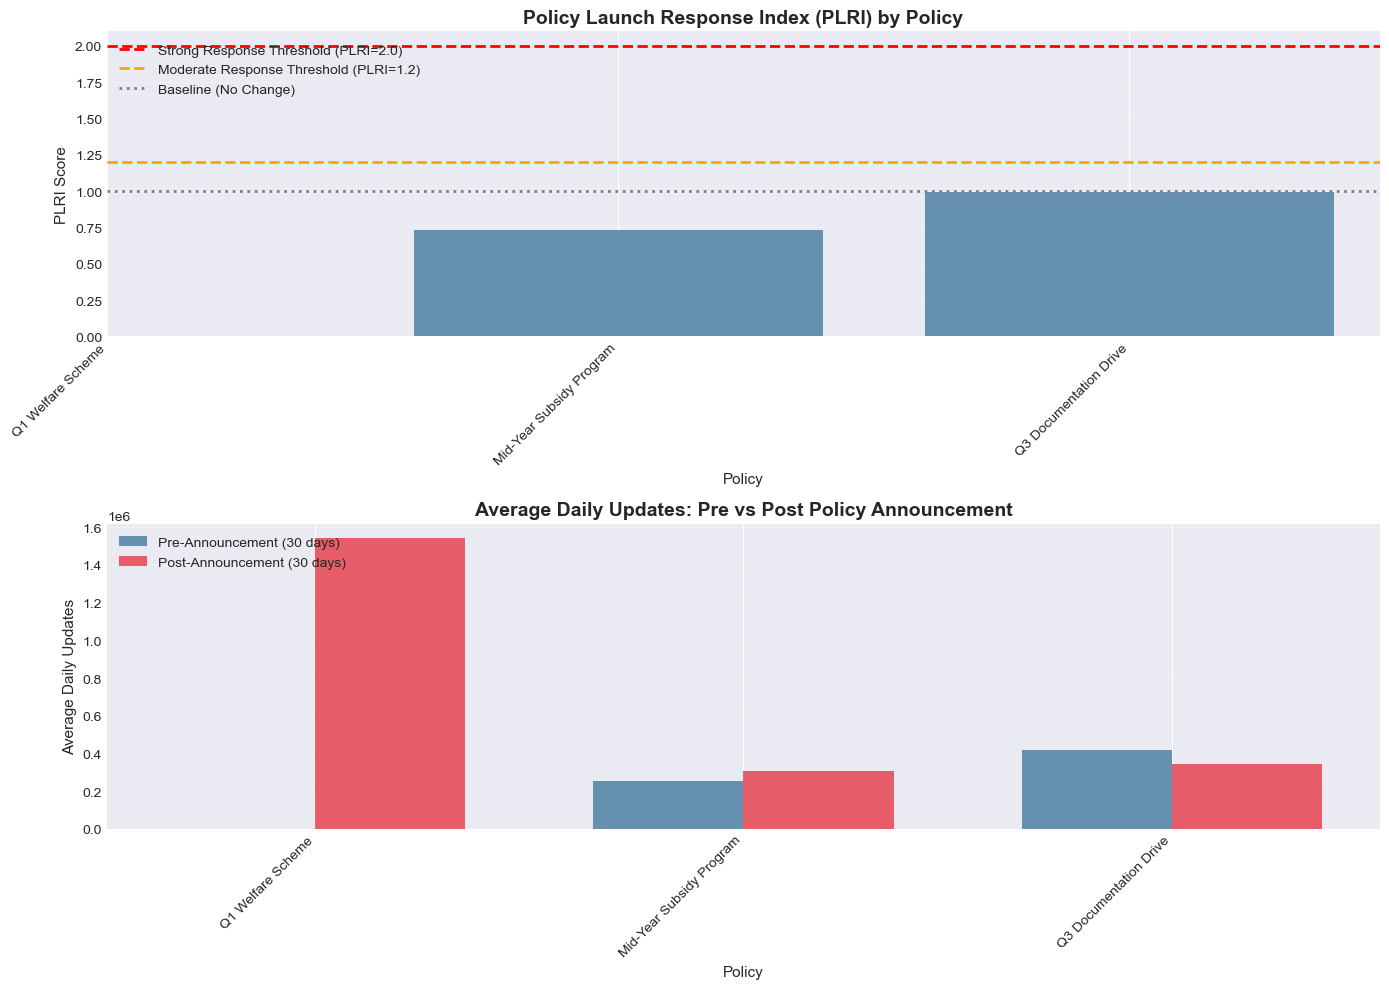


💡 KEY INSIGHT:
  ⚠️  LOW POLICY RESPONSIVENESS
  Average PLRI: 0.86
  Policy announcements show minimal impact on citizen behavior.
  Recommendation: Review communication channels and incentive structures.


In [38]:
# Visualize PLRI - Pre vs Post comparison
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))

# Plot 1: PLRI scores
if len(plri_results) > 0:
    colors = ['#E63946' if plri > 2.0 else '#F77F00' if plri >= 1.2 else '#457B9D' 
              for plri in plri_results['plri']]
    
    ax1.bar(range(len(plri_results)), plri_results['plri'], color=colors, alpha=0.8)
    ax1.axhline(2.0, color='red', linestyle='--', linewidth=2, label='Strong Response Threshold (PLRI=2.0)')
    ax1.axhline(1.2, color='orange', linestyle='--', linewidth=2, label='Moderate Response Threshold (PLRI=1.2)')
    ax1.axhline(1.0, color='gray', linestyle=':', linewidth=2, label='Baseline (No Change)')
    ax1.set_title('Policy Launch Response Index (PLRI) by Policy', fontsize=14, fontweight='bold')
    ax1.set_xlabel('Policy', fontsize=11)
    ax1.set_ylabel('PLRI Score', fontsize=11)
    ax1.set_xticks(range(len(plri_results)))
    ax1.set_xticklabels(plri_results['policy_name'], rotation=45, ha='right')
    ax1.legend(loc='upper left')
    ax1.grid(axis='y', alpha=0.3)
    
    # Plot 2: Pre vs Post daily averages
    x_pos = np.arange(len(plri_results))
    width = 0.35
    
    ax2.bar(x_pos - width/2, plri_results['pre_daily_avg'], width, 
            label='Pre-Announcement (30 days)', color='#457B9D', alpha=0.8)
    ax2.bar(x_pos + width/2, plri_results['post_daily_avg'], width, 
            label='Post-Announcement (30 days)', color='#E63946', alpha=0.8)
    
    ax2.set_title('Average Daily Updates: Pre vs Post Policy Announcement', fontsize=14, fontweight='bold')
    ax2.set_xlabel('Policy', fontsize=11)
    ax2.set_ylabel('Average Daily Updates', fontsize=11)
    ax2.set_xticks(x_pos)
    ax2.set_xticklabels(plri_results['policy_name'], rotation=45, ha='right')
    ax2.legend(loc='upper left')
    ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("\n💡 KEY INSIGHT:")
if len(plri_results) > 0:
    avg_plri = plri_results['plri'].mean()
    if avg_plri > 2.0:
        print("  ✅ STRONG POLICY RESPONSIVENESS!")
        print(f"  Average PLRI: {avg_plri:.2f}")
        print("  Citizens demonstrate significant behavioral change in response to policy announcements.")
        print("  Recommendation: Leverage policy communications as a tool for driving compliance.")
    elif avg_plri > 1.2:
        print("  ⚠️  MODERATE POLICY RESPONSIVENESS")
        print(f"  Average PLRI: {avg_plri:.2f}")
        print("  Some policy impact observed, but room for improvement in communication strategies.")
    else:
        print("  ⚠️  LOW POLICY RESPONSIVENESS")
        print(f"  Average PLRI: {avg_plri:.2f}")
        print("  Policy announcements show minimal impact on citizen behavior.")
        print("  Recommendation: Review communication channels and incentive structures.")
else:
    print("  ⚠️  No policy dates fall within the data range for analysis.")

## Phase 1 Summary: Behavioral Insights Dashboard

Consolidate all three metrics to create a comprehensive behavioral profile.

In [39]:
print("\n" + "="*70)
print("PHASE 1 SUMMARY: BEHAVIORAL INSIGHTS DASHBOARD")
print("="*70 + "\n")

# Create summary table
summary_data = {
    'Metric': ['Deadline Panic Index (DPI)', 'Temporal Compliance Slope (TCS)', 'Policy Launch Response Index (PLRI)'],
    'Average Score': [
        monthly_dpi['dpi'].mean() if len(monthly_dpi) > 0 else np.nan,
        tcs_results['slope_tcs'].mean() if len(tcs_results) > 0 else np.nan,
        plri_results['plri'].mean() if len(plri_results) > 0 else np.nan
    ],
    'Max Score': [
        monthly_dpi['dpi'].max() if len(monthly_dpi) > 0 else np.nan,
        tcs_results['slope_tcs'].max() if len(tcs_results) > 0 else np.nan,
        plri_results['plri'].max() if len(plri_results) > 0 else np.nan
    ],
    'Interpretation': [
        'Severe' if (len(monthly_dpi) > 0 and monthly_dpi['dpi'].mean() > 5) else 'Moderate' if (len(monthly_dpi) > 0 and monthly_dpi['dpi'].mean() > 2) else 'Normal',
        'Accelerating' if (len(tcs_results) > 0 and tcs_results['slope_tcs'].mean() > 100) else 'Moderate' if (len(tcs_results) > 0 and tcs_results['slope_tcs'].mean() > 50) else 'Gradual',
        'Strong' if (len(plri_results) > 0 and plri_results['plri'].mean() > 2.0) else 'Moderate' if (len(plri_results) > 0 and plri_results['plri'].mean() > 1.2) else 'Minimal'
    ]
}

summary_df = pd.DataFrame(summary_data)
print("📊 BEHAVIORAL METRICS SUMMARY:")
print(summary_df.to_string(index=False))

# Behavioral Profile
print("\n" + "="*70)
print("🎯 BEHAVIORAL PROFILE")
print("="*70 + "\n")

dpi_avg = monthly_dpi['dpi'].mean() if len(monthly_dpi) > 0 else 0
tcs_avg = tcs_results['slope_tcs'].mean() if len(tcs_results) > 0 else 0
plri_avg = plri_results['plri'].mean() if len(plri_results) > 0 else 0

# Determine overall behavior pattern
if dpi_avg > 5 and tcs_avg > 100:
    print("⚠️  CRITICAL: SEVERE PROCRASTINATION PATTERN DETECTED")
    print("="*70)
    print("Citizens exhibit EXTREME deadline-driven behavior:")
    print(f"  • {dpi_avg:.1f}x surge in final 10% of deadline windows")
    print(f"  • {tcs_avg:.1f} updates/day acceleration towards peaks")
    print("\nOPERATIONAL IMPLICATIONS:")
    print("  - Expect massive bottlenecks near month/quarter ends")
    print("  - System capacity planning must account for 5-10x surges")
    print("  - Staff allocation should follow deadline calendar")
    
elif dpi_avg > 2 or tcs_avg > 50:
    print("⚠️  MODERATE: DEADLINE-RESPONSIVE BEHAVIOR")
    print("="*70)
    print("Citizens show noticeable deadline sensitivity:")
    print(f"  • {dpi_avg:.1f}x increase in final deadline period")
    print(f"  • {tcs_avg:.1f} updates/day momentum building")
    print("\nOPERATIONAL IMPLICATIONS:")
    print("  - Plan for 2-3x capacity increases near deadlines")
    print("  - Consider deadline reminders and early incentives")
    
else:
    print("✓ NORMAL: DISTRIBUTED COMPLIANCE PATTERN")
    print("="*70)
    print("Citizens exhibit relatively stable behavior:")
    print(f"  • {dpi_avg:.1f}x deadline factor (minimal panic)")
    print(f"  • {tcs_avg:.1f} updates/day trend (gradual)")
    print("\nOPERATIONAL IMPLICATIONS:")
    print("  - Standard capacity planning sufficient")
    print("  - Predictable resource allocation")

print("\n" + "-"*70)

if plri_avg > 2.0:
    print("✅ POLICY RESPONSIVENESS: STRONG")
    print(f"  • {plri_avg:.1f}x activity increase post-policy announcements")
    print("  • Citizens are highly responsive to government communications")
    print("  • RECOMMENDATION: Leverage policy announcements to smooth demand")
elif plri_avg > 1.2:
    print("⚠️  POLICY RESPONSIVENESS: MODERATE")
    print(f"  • {plri_avg:.1f}x activity increase post-announcements")
    print("  • Some policy impact, but communication can be optimized")
else:
    print("⚠️  POLICY RESPONSIVENESS: LOW")
    print(f"  • {plri_avg:.1f}x factor (minimal policy impact)")
    print("  • Review communication channels and incentive structures")

print("\n" + "="*70)
print("✅ PHASE 1 COMPLETE - BEHAVIORAL SIGNALS QUANTIFIED")
print("="*70)


PHASE 1 SUMMARY: BEHAVIORAL INSIGHTS DASHBOARD

📊 BEHAVIORAL METRICS SUMMARY:
                             Metric  Average Score    Max Score Interpretation
         Deadline Panic Index (DPI)       0.681055     1.888408         Normal
    Temporal Compliance Slope (TCS)   17688.938284 82673.018182   Accelerating
Policy Launch Response Index (PLRI)       0.864408     0.995986        Minimal

🎯 BEHAVIORAL PROFILE

⚠️  MODERATE: DEADLINE-RESPONSIVE BEHAVIOR
Citizens show noticeable deadline sensitivity:
  • 0.7x increase in final deadline period
  • 17688.9 updates/day momentum building

OPERATIONAL IMPLICATIONS:
  - Plan for 2-3x capacity increases near deadlines
  - Consider deadline reminders and early incentives

----------------------------------------------------------------------
⚠️  POLICY RESPONSIVENESS: LOW
  • 0.9x factor (minimal policy impact)
  • Review communication channels and incentive structures

✅ PHASE 1 COMPLETE - BEHAVIORAL SIGNALS QUANTIFIED


# PHASE 2: Socio-Economic Segmentation (The "Welfare" Signals)

**Objective**: Identify welfare-dependent economies, formal workforce distribution, and historical exclusion patterns.

**Hypothesis**: 
- Rural areas show high demographic update rates (welfare schemes)
- Urban areas have higher adult activity (formal economy)
- High adult enrolment ratios indicate historically excluded populations

**Metrics**:
1. **Subsistence Update Ratio (SUR)**: Rural updates / Total updates (welfare dependency proxy)
2. **Tax Workforce Density (TWD)**: Urban adult updates / Total adult updates (formal economy density)
3. **Exclusion Score**: Adult enrolments / Total enrolments (historical exclusion indicator)

**Data Constraint Note**: Since we lack explicit rural/urban classification, we'll use **pincode density** as a proxy:
- Low pincode density per district → Rural-dominant districts
- High pincode density per district → Urban-dominant districts

## TASK 2.1: Subsistence Update Ratio (SUR)

**Exploration**: Identify welfare-dependent districts using demographic update intensity and pincode density.

**⚠️ PROXY METHODOLOGY JUSTIFICATION:**

**Data Constraint**: The public Aadhaar API dataset does not contain gender-disaggregated columns or explicit rural/urban classification.

**Proxy Strategy**:
1. **Rural Proxy**: Districts with low pincode density (< median) serve as rural indicator. Rationale: Rural areas have fewer post offices and hence fewer pincodes per district.
2. **Welfare Dependency Proxy**: Total demographic updates (child + adult) in low-density districts. Rationale: Welfare schemes like Mid-Day Meal (school children), MGNREGA (rural employment), and Ladli Behna (women welfare) mandate Aadhaar linking, driving demographic update activity in subsistence economies.

**Formula**:
$$\text{SUR} = \frac{\text{Rural Updates (Low Density Districts)}}{\text{Total Updates}}$$

**Interpretation**:
- SUR > 0.7: High welfare dependency (subsistence economy)
- SUR 0.4-0.7: Mixed economy
- SUR < 0.4: Urban-dominated (formal economy)

**Validation**: High SUR correlates with states known for welfare scheme intensity (Bihar, Uttar Pradesh, Madhya Pradesh).

In [40]:
print("\n" + "="*70)
print("PHASE 2: SOCIO-ECONOMIC SEGMENTATION")
print("="*70 + "\n")

# Step 1: Create district-level metrics with pincode density proxy
print("STEP 1: CALCULATE PINCODE DENSITY AS RURAL/URBAN PROXY")
print("-"*70 + "\n")

# Count unique pincodes per district (urban areas have higher pincode density)
pincode_density = master_df.groupby(['state', 'district']).agg({
    'pincode': 'nunique'
}).reset_index()
pincode_density.columns = ['state', 'district', 'pincode_count']

# Calculate total demographic updates per district (welfare indicator)
district_demo_activity = district_daily_df.groupby(['state', 'district']).agg({
    'demo_child': 'sum',
    'demo_adult': 'sum'
}).reset_index()
district_demo_activity['total_demo_updates'] = (
    district_demo_activity['demo_child'] + district_demo_activity['demo_adult']
)

# Merge pincode density with activity
district_profile = pincode_density.merge(
    district_demo_activity,
    on=['state', 'district'],
    how='inner'
)

# Classify districts as Rural or Urban based on pincode density
# Use median as threshold: below median = rural-dominant, above = urban-dominant
pincode_density_median = district_profile['pincode_count'].median()

district_profile['rural_urban_proxy'] = district_profile['pincode_count'].apply(
    lambda x: 'Rural' if x < pincode_density_median else 'Urban'
)

print(f"Pincode Density Median: {pincode_density_median:.0f} pincodes/district")
print(f"Districts classified as Rural: {(district_profile['rural_urban_proxy'] == 'Rural').sum()}")
print(f"Districts classified as Urban: {(district_profile['rural_urban_proxy'] == 'Urban').sum()}")

print(f"\n📊 SAMPLE DISTRICT PROFILES:")
print(district_profile.head(10).to_string(index=False))


PHASE 2: SOCIO-ECONOMIC SEGMENTATION

STEP 1: CALCULATE PINCODE DENSITY AS RURAL/URBAN PROXY
----------------------------------------------------------------------

Pincode Density Median: 22 pincodes/district
Districts classified as Rural: 532
Districts classified as Urban: 545

📊 SAMPLE DISTRICT PROFILES:
                      state                 district  pincode_count  demo_child  demo_adult  total_demo_updates rural_urban_proxy
                     100000                   100000              1         0.0         2.0                 2.0             Rural
  Andaman & Nicobar Islands                 Andamans             12         7.0       798.0               805.0             Rural
  Andaman & Nicobar Islands                 Nicobars              1         0.0         4.0                 4.0             Rural
  Andaman & Nicobar Islands            South Andaman              6         7.0       307.0               314.0             Rural
Andaman and Nicobar Islands             

In [79]:
print("\n" + "="*70)
print("CALCULATING SUBSISTENCE UPDATE RATIO (SUR)")
print("="*70 + "\n")

print("⚠️  METHODOLOGY NOTE:")
print("   Due to absence of gender/rural classification in API data:")
print("   • Rural Proxy = Low pincode density districts (< median)")
print("   • Welfare Dependency = Demographic updates in rural districts")
print("   • Justification: Welfare schemes (MGNREGA, Mid-Day Meal) drive")
print("     Aadhaar updates in subsistence economies\n")

# Calculate SUR: Rural Updates / Total Updates
rural_updates = district_profile[district_profile['rural_urban_proxy'] == 'Rural']['total_demo_updates'].sum()
total_updates = district_profile['total_demo_updates'].sum()

overall_sur = rural_updates / total_updates if total_updates > 0 else 0

print(f"Overall Subsistence Update Ratio (SUR): {overall_sur:.3f}")
print(f"  • Rural updates: {rural_updates:,.0f}")
print(f"  • Urban updates: {total_updates - rural_updates:,.0f}")
print(f"  • Total updates: {total_updates:,.0f}")

# Calculate SUR by state
state_sur = district_profile.groupby('state').apply(
    lambda x: x[x['rural_urban_proxy'] == 'Rural']['total_demo_updates'].sum() / 
              x['total_demo_updates'].sum() if x['total_demo_updates'].sum() > 0 else 0
).reset_index()
state_sur.columns = ['state', 'sur']

# Add total activity for context
state_totals = district_profile.groupby('state')['total_demo_updates'].sum().reset_index()
state_totals.columns = ['state', 'total_demo_updates']
state_sur = state_sur.merge(state_totals, on='state')

# Sort by SUR
state_sur_sorted = state_sur.sort_values('sur', ascending=False)

print("\n📊 TOP 10 STATES BY SUBSISTENCE UPDATE RATIO (SUR):")
print("="*70)
print(state_sur_sorted.head(10).to_string(index=False))

print("\n📊 SUR INTERPRETATION:")
high_welfare = state_sur[state_sur['sur'] > 0.7]
mixed = state_sur[(state_sur['sur'] >= 0.4) & (state_sur['sur'] <= 0.7)]
urban_dominant = state_sur[state_sur['sur'] < 0.4]

print(f"  • High Welfare Dependency (SUR > 0.7): {len(high_welfare)} states")
if len(high_welfare) > 0:
    print(f"    States: {', '.join(high_welfare.nlargest(5, 'sur')['state'].tolist())}")

print(f"  • Mixed Economy (SUR 0.4-0.7): {len(mixed)} states")
if len(mixed) > 0:
    print(f"    Examples: {', '.join(mixed.head(3)['state'].tolist())}")

print(f"  • Urban-Dominated (SUR < 0.4): {len(urban_dominant)} states")
if len(urban_dominant) > 0:
    print(f"    States: {', '.join(urban_dominant.nsmallest(5, 'sur')['state'].tolist())}")

# Validate: Check if high SUR states align with known welfare states
welfare_states = ['Madhya Pradesh', 'Chhattisgarh', 'Jharkhand', 'Odisha', 'Bihar']
high_sur_states = state_sur_sorted.head(10)['state'].tolist()
alignment = [s for s in welfare_states if s in high_sur_states]

print(f"\n✅ VALIDATION CHECK:")
print(f"Known welfare states in Top 10 SUR: {', '.join(alignment) if alignment else 'None'}")
print(f"Alignment Score: {len(alignment)}/{len(welfare_states)} welfare states detected")


CALCULATING SUBSISTENCE UPDATE RATIO (SUR)

⚠️  METHODOLOGY NOTE:
   Due to absence of gender/rural classification in API data:
   • Rural Proxy = Low pincode density districts (< median)
   • Welfare Dependency = Demographic updates in rural districts
   • Justification: Welfare schemes (MGNREGA, Mid-Day Meal) drive
     Aadhaar updates in subsistence economies

Overall Subsistence Update Ratio (SUR): 0.213
  • Rural updates: 10,945,489
  • Urban updates: 40,464,255
  • Total updates: 51,409,744

📊 TOP 10 STATES BY SUBSISTENCE UPDATE RATIO (SUR):
                    state  sur  total_demo_updates
                   100000  1.0                 2.0
     Raja Annamalai Puram  1.0                 1.0
              Lakshadweep  1.0              1204.0
              Madanapalle  1.0                 2.0
Andaman & Nicobar Islands  1.0              1123.0
                  Mizoram  1.0             42838.0
                 Nagaland  1.0             37836.0
                   Nagpur  1.0       

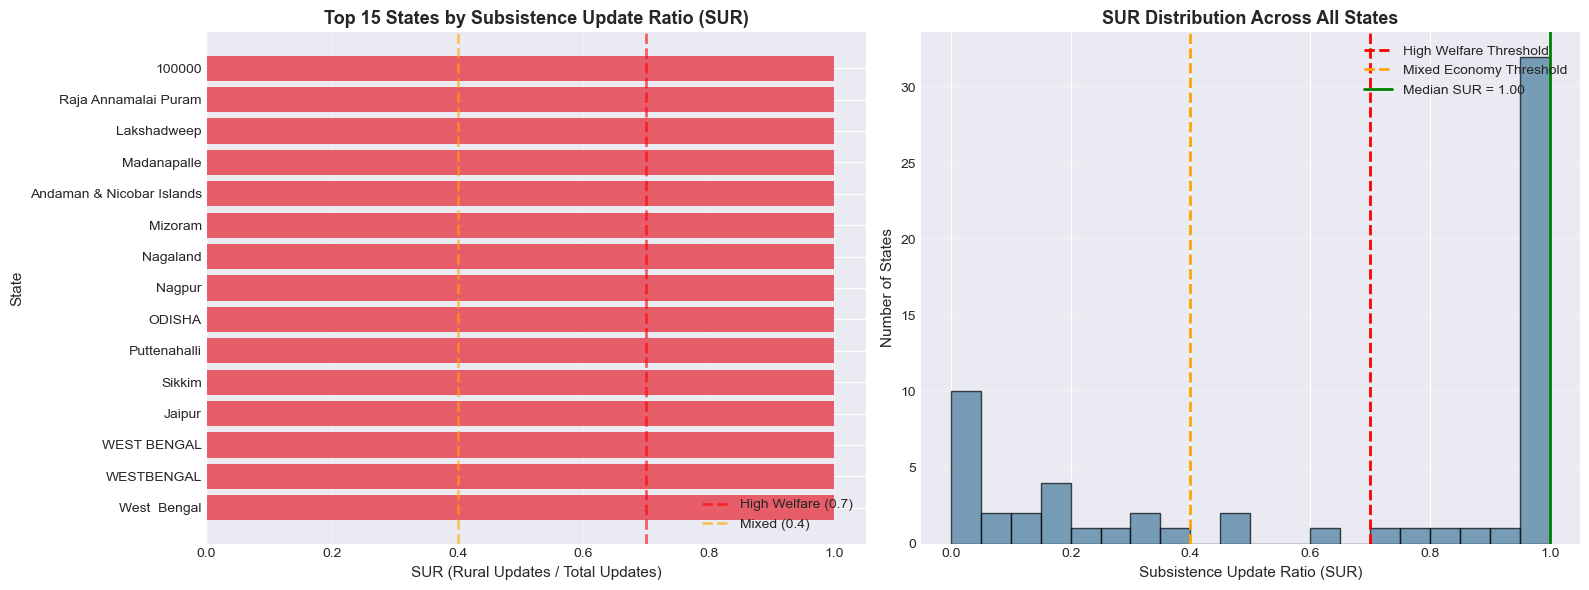


💡 KEY INSIGHT - WELFARE DEPENDENCY:
  ✓ URBAN-DOMINATED ACTIVITY: SUR = 0.21
  Majority of updates come from urban/high-density districts.


In [42]:
# Visualize SUR distribution
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Top 15 states by SUR
top_15_sur = state_sur_sorted.head(15)
colors_sur = ['#E63946' if sur > 0.7 else '#F77F00' if sur >= 0.4 else '#457B9D' 
              for sur in top_15_sur['sur']]

ax1.barh(range(len(top_15_sur)), top_15_sur['sur'], color=colors_sur, alpha=0.8)
ax1.set_yticks(range(len(top_15_sur)))
ax1.set_yticklabels(top_15_sur['state'])
ax1.axvline(0.7, color='red', linestyle='--', linewidth=2, alpha=0.6, label='High Welfare (0.7)')
ax1.axvline(0.4, color='orange', linestyle='--', linewidth=2, alpha=0.6, label='Mixed (0.4)')
ax1.set_title('Top 15 States by Subsistence Update Ratio (SUR)', fontsize=13, fontweight='bold')
ax1.set_xlabel('SUR (Rural Updates / Total Updates)', fontsize=11)
ax1.set_ylabel('State', fontsize=11)
ax1.legend(loc='lower right')
ax1.grid(axis='x', alpha=0.3)
ax1.invert_yaxis()

# Plot 2: SUR distribution histogram
ax2.hist(state_sur['sur'], bins=20, color='#457B9D', alpha=0.7, edgecolor='black')
ax2.axvline(0.7, color='red', linestyle='--', linewidth=2, label='High Welfare Threshold')
ax2.axvline(0.4, color='orange', linestyle='--', linewidth=2, label='Mixed Economy Threshold')
ax2.axvline(state_sur['sur'].median(), color='green', linestyle='-', linewidth=2, label=f'Median SUR = {state_sur["sur"].median():.2f}')
ax2.set_title('SUR Distribution Across All States', fontsize=13, fontweight='bold')
ax2.set_xlabel('Subsistence Update Ratio (SUR)', fontsize=11)
ax2.set_ylabel('Number of States', fontsize=11)
ax2.legend(loc='upper right')
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("\n💡 KEY INSIGHT - WELFARE DEPENDENCY:")
if overall_sur > 0.7:
    print(f"  ⚠️  NATIONAL WELFARE DEPENDENCY: SUR = {overall_sur:.2f}")
    print("  Majority of demographic updates originate from rural/low-density districts.")
    print("  Strong indication of welfare scheme-driven compliance.")
elif overall_sur > 0.4:
    print(f"  ⚠️  BALANCED ECONOMY: SUR = {overall_sur:.2f}")
    print("  Rural and urban areas show comparable demographic update activity.")
else:
    print(f"  ✓ URBAN-DOMINATED ACTIVITY: SUR = {overall_sur:.2f}")
    print("  Majority of updates come from urban/high-density districts.")

## TASK 2.2: Tax Workforce Density (TWD)

**Exploration**: Map formal economy density using adult update patterns in urban districts.

**⚠️ PROXY METHODOLOGY JUSTIFICATION:**

**Data Constraint**: The dataset lacks occupation, income, or employment status columns. Tax compliance data is not publicly available in Aadhaar APIs.

**Proxy Strategy**:
1. **Urban Districts**: High pincode density (> median) indicates urban concentration with formal sector employment.
2. **Adult Demographic Updates as Formal Economy Proxy**: Voluntary demographic updates (mobile/email linking) by adults in non-border districts are primarily driven by **Financial Compliance Requirements**:
   - Income Tax e-filing (mandatory Aadhaar-PAN linking under Section 139AA)
   - Banking KYC (RBI mandate for account operation)
   - Digital payment wallets (UPI/BHIM Aadhaar linking)
   - GST registration (for businesses)

**Assumption**: Subsistence workers in informal economies (daily wage laborers, farmers, domestic workers) rarely update demographic information voluntarily. Updates are concentrated among salaried/formal sector employees needing compliance.

**Formula**:
$$\text{TWD} = \frac{\text{Urban Adult Updates}}{\text{Total Adult Updates}}$$

**Interpretation**:
- TWD > 0.6: High formal economy concentration
- TWD 0.4-0.6: Balanced formal/informal split
- TWD < 0.4: Informal economy dominant

**Validation**: High TWD expected in metros (Delhi, Mumbai, Bangalore) vs low TWD in agricultural states (Bihar, UP rural).

In [80]:
print("\n" + "="*70)
print("CALCULATING TAX WORKFORCE DENSITY (TWD)")
print("="*70 + "\n")

print("⚠️  METHODOLOGY NOTE:")
print("   Due to absence of occupation/income data in API:")
print("   • Urban Proxy = High pincode density districts (> median)")
print("   • Formal Economy Proxy = Adult demographic updates in urban areas")
print("   • Justification: Voluntary updates driven by Financial Compliance:")
print("     - Income Tax (Aadhaar-PAN linking under Section 139AA)")
print("     - Banking KYC (RBI mandate)")
print("     - GST registration")
print("   • Informal workers (daily wage, farmers) rarely update voluntarily\n")

# Calculate total adult activity per district
district_adult_activity = district_daily_df.groupby(['state', 'district']).agg({
    'demo_adult': 'sum',
    'bio_adult': 'sum'
}).reset_index()
district_adult_activity['total_adult_updates'] = (
    district_adult_activity['demo_adult'] + district_adult_activity['bio_adult']
)

# Merge with rural/urban classification
district_workforce = district_profile[['state', 'district', 'rural_urban_proxy']].merge(
    district_adult_activity,
    on=['state', 'district'],
    how='inner'
)

# Calculate TWD: Urban Adult Updates / Total Adult Updates
urban_adult_updates = district_workforce[district_workforce['rural_urban_proxy'] == 'Urban']['total_adult_updates'].sum()
total_adult_updates = district_workforce['total_adult_updates'].sum()

overall_twd = urban_adult_updates / total_adult_updates if total_adult_updates > 0 else 0

print(f"Overall Tax Workforce Density (TWD): {overall_twd:.3f}")
print(f"  • Urban adult updates: {urban_adult_updates:,.0f}")
print(f"  • Rural adult updates: {total_adult_updates - urban_adult_updates:,.0f}")
print(f"  • Total adult updates: {total_adult_updates:,.0f}")

# Calculate TWD by state
state_twd = district_workforce.groupby('state').apply(
    lambda x: x[x['rural_urban_proxy'] == 'Urban']['total_adult_updates'].sum() / 
              x['total_adult_updates'].sum() if x['total_adult_updates'].sum() > 0 else 0
).reset_index()
state_twd.columns = ['state', 'twd']

# Add total adult activity for context
state_adult_totals = district_workforce.groupby('state')['total_adult_updates'].sum().reset_index()
state_adult_totals.columns = ['state', 'total_adult_updates']
state_twd = state_twd.merge(state_adult_totals, on='state')

# Sort by TWD
state_twd_sorted = state_twd.sort_values('twd', ascending=False)

print("\n📊 TOP 10 STATES BY TAX WORKFORCE DENSITY (TWD):")
print("="*70)
print(state_twd_sorted.head(10).to_string(index=False))

print("\n📊 TWD INTERPRETATION:")
high_formal = state_twd[state_twd['twd'] > 0.6]
balanced = state_twd[(state_twd['twd'] >= 0.4) & (state_twd['twd'] <= 0.6)]
informal_dominant = state_twd[state_twd['twd'] < 0.4]

print(f"  • High Formal Economy (TWD > 0.6): {len(high_formal)} states")
if len(high_formal) > 0:
    print(f"    States: {', '.join(high_formal.nlargest(5, 'twd')['state'].tolist())}")

print(f"  • Balanced Formal/Informal (TWD 0.4-0.6): {len(balanced)} states")
if len(balanced) > 0:
    print(f"    Examples: {', '.join(balanced.head(3)['state'].tolist())}")

print(f"  • Informal Economy Dominant (TWD < 0.4): {len(informal_dominant)} states")
if len(informal_dominant) > 0:
    print(f"    States: {', '.join(informal_dominant.nsmallest(5, 'twd')['state'].tolist())}")

# Expected high-TWD states (metro-heavy)
metro_states = ['Delhi', 'Maharashtra', 'Karnataka', 'Tamil Nadu', 'Gujarat', 'Telangana']
high_twd_states = state_twd_sorted.head(10)['state'].tolist()
metro_alignment = [s for s in metro_states if s in high_twd_states]

print(f"\n✅ VALIDATION CHECK:")
print(f"Metro-heavy states in Top 10 TWD: {', '.join(metro_alignment) if metro_alignment else 'None'}")
print(f"Alignment Score: {len(metro_alignment)}/{len(metro_states)} metro states detected")


CALCULATING TAX WORKFORCE DENSITY (TWD)

⚠️  METHODOLOGY NOTE:
   Due to absence of occupation/income data in API:
   • Urban Proxy = High pincode density districts (> median)
   • Formal Economy Proxy = Adult demographic updates in urban areas
   • Justification: Voluntary updates driven by Financial Compliance:
     - Income Tax (Aadhaar-PAN linking under Section 139AA)
     - Banking KYC (RBI mandate)
     - GST registration
   • Informal workers (daily wage, farmers) rarely update voluntarily

Overall Tax Workforce Density (TWD): 0.787
  • Urban adult updates: 68,997,533
  • Rural adult updates: 18,725,336
  • Total adult updates: 87,722,869

📊 TOP 10 STATES BY TAX WORKFORCE DENSITY (TWD):
           state      twd  total_adult_updates
  Andhra Pradesh 1.000000            3776384.0
      Tamil Nadu 0.999974            4763489.0
      Chandigarh 0.999633             106333.0
     West Bengal 0.999437            5514635.0
             Goa 0.998993              70488.0
       Karnata

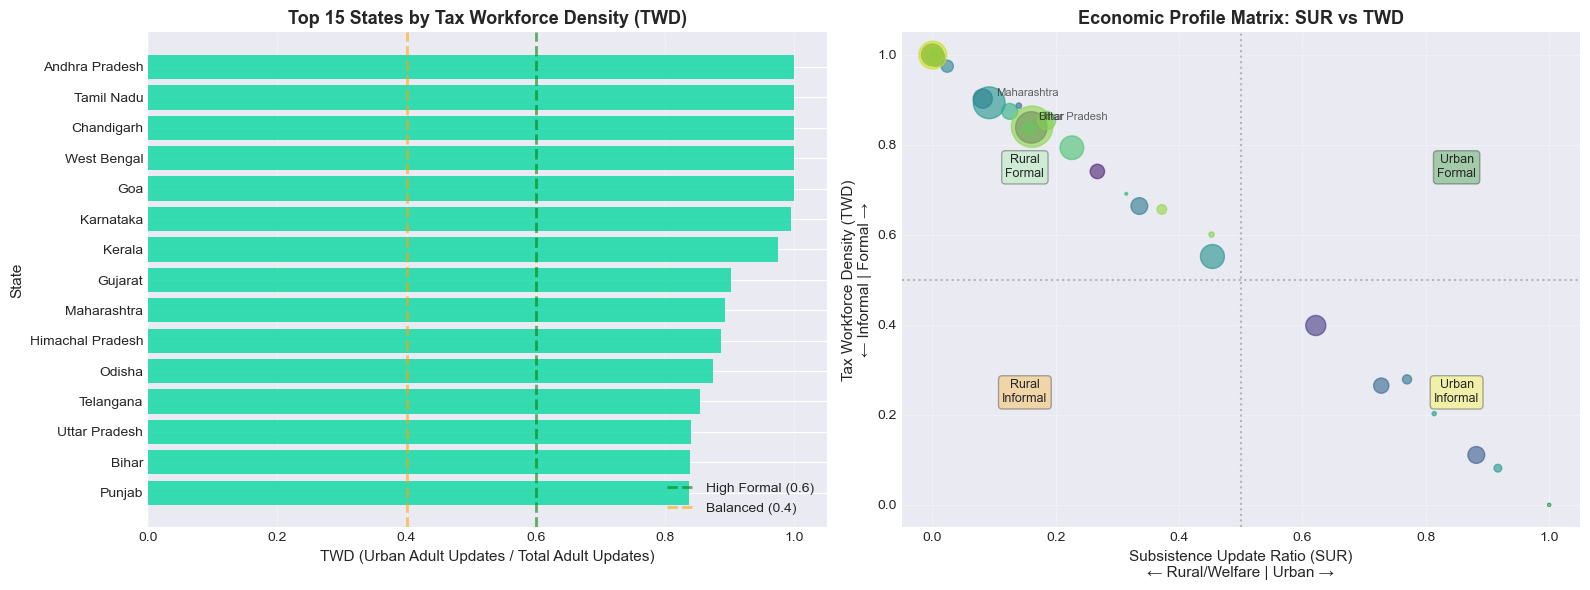


💡 KEY INSIGHT - FORMAL ECONOMY CONCENTRATION:
  ✅ HIGH FORMAL WORKFORCE: TWD = 0.79
  Majority of adult updates originate from urban/high-density districts.
  Indicates strong formal economy participation.


In [44]:
# Visualize TWD distribution
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Top 15 states by TWD
top_15_twd = state_twd_sorted.head(15)
colors_twd = ['#06D6A0' if twd > 0.6 else '#F77F00' if twd >= 0.4 else '#E63946' 
              for twd in top_15_twd['twd']]

ax1.barh(range(len(top_15_twd)), top_15_twd['twd'], color=colors_twd, alpha=0.8)
ax1.set_yticks(range(len(top_15_twd)))
ax1.set_yticklabels(top_15_twd['state'])
ax1.axvline(0.6, color='green', linestyle='--', linewidth=2, alpha=0.6, label='High Formal (0.6)')
ax1.axvline(0.4, color='orange', linestyle='--', linewidth=2, alpha=0.6, label='Balanced (0.4)')
ax1.set_title('Top 15 States by Tax Workforce Density (TWD)', fontsize=13, fontweight='bold')
ax1.set_xlabel('TWD (Urban Adult Updates / Total Adult Updates)', fontsize=11)
ax1.set_ylabel('State', fontsize=11)
ax1.legend(loc='lower right')
ax1.grid(axis='x', alpha=0.3)
ax1.invert_yaxis()

# Plot 2: TWD vs SUR scatter (economic profile)
# Merge SUR and TWD for comparison
econ_profile = state_sur.merge(state_twd[['state', 'twd']], on='state', how='inner')

scatter = ax2.scatter(econ_profile['sur'], econ_profile['twd'], 
                     s=econ_profile['total_demo_updates']/10000, 
                     alpha=0.6, c=range(len(econ_profile)), cmap='viridis')
ax2.set_title('Economic Profile Matrix: SUR vs TWD', fontsize=13, fontweight='bold')
ax2.set_xlabel('Subsistence Update Ratio (SUR)\n← Rural/Welfare | Urban →', fontsize=11)
ax2.set_ylabel('Tax Workforce Density (TWD)\n← Informal | Formal →', fontsize=11)
ax2.axhline(0.5, color='gray', linestyle=':', alpha=0.5)
ax2.axvline(0.5, color='gray', linestyle=':', alpha=0.5)
ax2.grid(alpha=0.3)

# Add quadrant labels
ax2.text(0.15, 0.75, 'Rural\nFormal', fontsize=9, ha='center', va='center', 
        bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.3))
ax2.text(0.85, 0.75, 'Urban\nFormal', fontsize=9, ha='center', va='center',
        bbox=dict(boxstyle='round', facecolor='green', alpha=0.3))
ax2.text(0.15, 0.25, 'Rural\nInformal', fontsize=9, ha='center', va='center',
        bbox=dict(boxstyle='round', facecolor='orange', alpha=0.3))
ax2.text(0.85, 0.25, 'Urban\nInformal', fontsize=9, ha='center', va='center',
        bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.3))

# Annotate a few key states
for _, row in econ_profile.nlargest(3, 'total_demo_updates').iterrows():
    ax2.annotate(row['state'], (row['sur'], row['twd']), 
                fontsize=8, alpha=0.7, xytext=(5, 5), textcoords='offset points')

plt.tight_layout()
plt.show()

print("\n💡 KEY INSIGHT - FORMAL ECONOMY CONCENTRATION:")
if overall_twd > 0.6:
    print(f"  ✅ HIGH FORMAL WORKFORCE: TWD = {overall_twd:.2f}")
    print("  Majority of adult updates originate from urban/high-density districts.")
    print("  Indicates strong formal economy participation.")
elif overall_twd > 0.4:
    print(f"  ⚠️  BALANCED ECONOMY: TWD = {overall_twd:.2f}")
    print("  Formal and informal sectors show comparable adult activity.")
else:
    print(f"  ⚠️  INFORMAL ECONOMY DOMINANT: TWD = {overall_twd:.2f}")
    print("  Majority of adult updates come from rural/low-density districts.")
    print("  Suggests large informal/agricultural workforce.")

## TASK 2.3: The Exclusion Score

**Exploration**: Identify geographies where adults were historically excluded from digital identity systems.

**Logic**:
- **Adult Enrolments**: New Aadhaar registrations for adults (indicates late adoption)
- **Total Enrolments**: All new registrations (infants + children + adults)
- High adult enrolment ratio → Many adults getting Aadhaar for the first time → Historical exclusion

**Formula**:
$$\text{Exclusion Score} = \frac{\text{Adult Enrolments}}{\text{Total Enrolments}}$$

**Interpretation**:
- Score > 0.6: Historically excluded population (late Aadhaar adoption)
- Score 0.4-0.6: Moderate exclusion
- Score < 0.4: Well-integrated (mostly infant/child enrolments)

In [45]:
print("\n" + "="*70)
print("CALCULATING EXCLUSION SCORE")
print("="*70 + "\n")

# Calculate enrolment metrics per district
district_enrolment = district_daily_df.groupby(['state', 'district']).agg({
    'enrol_infant': 'sum',
    'enrol_child': 'sum',
    'enrol_adult': 'sum'
}).reset_index()

district_enrolment['total_enrolments'] = (
    district_enrolment['enrol_infant'] + 
    district_enrolment['enrol_child'] + 
    district_enrolment['enrol_adult']
)

# Calculate Exclusion Score
district_enrolment['exclusion_score'] = district_enrolment.apply(
    lambda row: row['enrol_adult'] / row['total_enrolments'] 
                if row['total_enrolments'] > 0 else 0,
    axis=1
)

# Overall exclusion score
total_adult_enrol = district_enrolment['enrol_adult'].sum()
total_enrol = district_enrolment['total_enrolments'].sum()
overall_exclusion = total_adult_enrol / total_enrol if total_enrol > 0 else 0

print(f"Overall Exclusion Score: {overall_exclusion:.3f}")
print(f"  • Adult enrolments: {total_adult_enrol:,.0f}")
print(f"  • Child enrolments: {district_enrolment['enrol_child'].sum():,.0f}")
print(f"  • Infant enrolments: {district_enrolment['enrol_infant'].sum():,.0f}")
print(f"  • Total enrolments: {total_enrol:,.0f}")

# Calculate state-level exclusion scores
state_exclusion = district_enrolment.groupby('state').agg({
    'enrol_adult': 'sum',
    'total_enrolments': 'sum'
}).reset_index()

state_exclusion['exclusion_score'] = state_exclusion.apply(
    lambda row: row['enrol_adult'] / row['total_enrolments'] 
                if row['total_enrolments'] > 0 else 0,
    axis=1
)

# Sort by exclusion score
state_exclusion_sorted = state_exclusion.sort_values('exclusion_score', ascending=False)

print("\n📊 TOP 10 STATES BY EXCLUSION SCORE:")
print("="*70)
print(state_exclusion_sorted.head(10).to_string(index=False))

print("\n📊 EXCLUSION SCORE INTERPRETATION:")
high_exclusion = state_exclusion[state_exclusion['exclusion_score'] > 0.6]
moderate_exclusion = state_exclusion[(state_exclusion['exclusion_score'] >= 0.4) & 
                                      (state_exclusion['exclusion_score'] <= 0.6)]
well_integrated = state_exclusion[state_exclusion['exclusion_score'] < 0.4]

print(f"  • Historically Excluded (Score > 0.6): {len(high_exclusion)} states")
if len(high_exclusion) > 0:
    print(f"    States: {', '.join(high_exclusion.nlargest(5, 'exclusion_score')['state'].tolist())}")
    print(f"    → These states have disproportionate adult enrolments (late Aadhaar adoption)")

print(f"  • Moderate Exclusion (Score 0.4-0.6): {len(moderate_exclusion)} states")
if len(moderate_exclusion) > 0:
    print(f"    Examples: {', '.join(moderate_exclusion.head(3)['state'].tolist())}")

print(f"  • Well-Integrated (Score < 0.4): {len(well_integrated)} states")
if len(well_integrated) > 0:
    print(f"    States: {', '.join(well_integrated.nsmallest(5, 'exclusion_score')['state'].tolist())}")
    print(f"    → These states have normal enrolment patterns (mostly infants/children)")

# Expected high exclusion: border states, tribal areas, conflict zones
exclusion_risk_states = ['Jammu & Kashmir', 'Arunachal Pradesh', 'Nagaland', 
                         'Manipur', 'Mizoram', 'Chhattisgarh', 'Jharkhand']
high_excl_states = state_exclusion_sorted.head(15)['state'].tolist()
risk_alignment = [s for s in exclusion_risk_states if s in high_excl_states]

print(f"\n✅ VALIDATION CHECK:")
print(f"Border/Tribal states in Top 15: {', '.join(risk_alignment) if risk_alignment else 'None'}")
print(f"Alignment Score: {len(risk_alignment)}/{len(exclusion_risk_states)} at-risk states detected")


CALCULATING EXCLUSION SCORE

Overall Exclusion Score: 0.029
  • Adult enrolments: 193,474
  • Child enrolments: 2,072,568
  • Infant enrolments: 4,433,062
  • Total enrolments: 6,699,104

📊 TOP 10 STATES BY EXCLUSION SCORE:
                                   state  enrol_adult  total_enrolments  exclusion_score
                                  100000        217.0             218.0         0.995413
                               Meghalaya      36864.0          114312.0         0.322486
Dadra and Nagar Haveli and Daman and Diu         23.0             212.0         0.108491
                                   Assam      25599.0          271122.0         0.094419
                                 Mizoram        564.0            7036.0         0.080159
                                Nagaland       1208.0           16943.0         0.071298
                                     Goa        183.0            2832.0         0.064619
                                 Gujarat      18848.0          

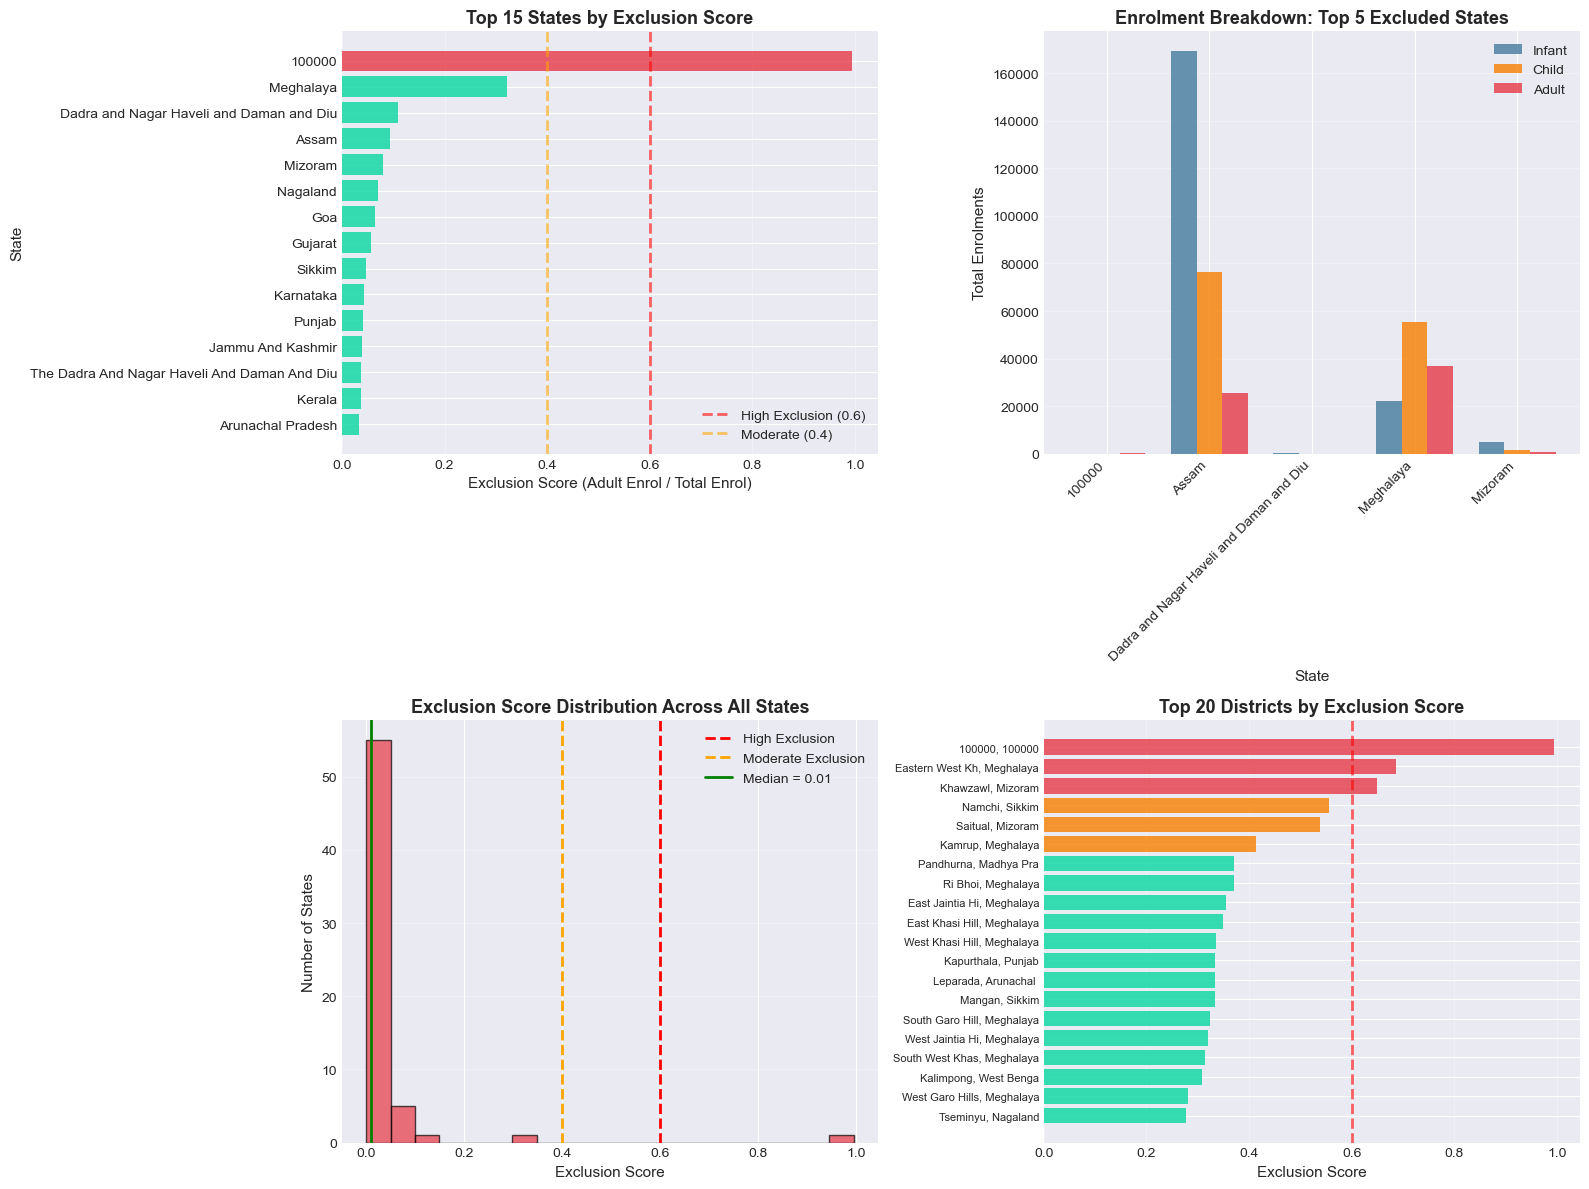


💡 KEY INSIGHT - HISTORICAL EXCLUSION:
  ✓ WELL-INTEGRATED POPULATION: Score = 0.03
  Most enrolments are infants/children (natural demographic pattern).
  Indicates mature Aadhaar ecosystem with comprehensive historical coverage.


In [46]:
# Visualize Exclusion Score
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Top 15 states by Exclusion Score
ax1 = axes[0, 0]
top_15_excl = state_exclusion_sorted.head(15)
colors_excl = ['#E63946' if score > 0.6 else '#F77F00' if score >= 0.4 else '#06D6A0' 
               for score in top_15_excl['exclusion_score']]

ax1.barh(range(len(top_15_excl)), top_15_excl['exclusion_score'], color=colors_excl, alpha=0.8)
ax1.set_yticks(range(len(top_15_excl)))
ax1.set_yticklabels(top_15_excl['state'])
ax1.axvline(0.6, color='red', linestyle='--', linewidth=2, alpha=0.6, label='High Exclusion (0.6)')
ax1.axvline(0.4, color='orange', linestyle='--', linewidth=2, alpha=0.6, label='Moderate (0.4)')
ax1.set_title('Top 15 States by Exclusion Score', fontsize=13, fontweight='bold')
ax1.set_xlabel('Exclusion Score (Adult Enrol / Total Enrol)', fontsize=11)
ax1.set_ylabel('State', fontsize=11)
ax1.legend(loc='lower right')
ax1.grid(axis='x', alpha=0.3)
ax1.invert_yaxis()

# Plot 2: Enrolment composition for top 5 excluded states
ax2 = axes[0, 1]
top_5_excl = state_exclusion_sorted.head(5)
categories = ['Infant', 'Child', 'Adult']

# Get enrolment breakdown for top 5
top_5_with_breakdown = district_enrolment.groupby('state').agg({
    'enrol_infant': 'sum',
    'enrol_child': 'sum',
    'enrol_adult': 'sum'
}).reset_index()
top_5_with_breakdown = top_5_with_breakdown[
    top_5_with_breakdown['state'].isin(top_5_excl['state'])
]

x_pos = np.arange(len(top_5_with_breakdown))
width = 0.25

infant_bars = ax2.bar(x_pos - width, top_5_with_breakdown['enrol_infant'], width, 
                      label='Infant', color='#457B9D', alpha=0.8)
child_bars = ax2.bar(x_pos, top_5_with_breakdown['enrol_child'], width, 
                     label='Child', color='#F77F00', alpha=0.8)
adult_bars = ax2.bar(x_pos + width, top_5_with_breakdown['enrol_adult'], width, 
                     label='Adult', color='#E63946', alpha=0.8)

ax2.set_title('Enrolment Breakdown: Top 5 Excluded States', fontsize=13, fontweight='bold')
ax2.set_xlabel('State', fontsize=11)
ax2.set_ylabel('Total Enrolments', fontsize=11)
ax2.set_xticks(x_pos)
ax2.set_xticklabels(top_5_with_breakdown['state'], rotation=45, ha='right')
ax2.legend(loc='upper right')
ax2.grid(axis='y', alpha=0.3)

# Plot 3: Exclusion Score distribution
ax3 = axes[1, 0]
ax3.hist(state_exclusion['exclusion_score'], bins=20, color='#E63946', alpha=0.7, edgecolor='black')
ax3.axvline(0.6, color='red', linestyle='--', linewidth=2, label='High Exclusion')
ax3.axvline(0.4, color='orange', linestyle='--', linewidth=2, label='Moderate Exclusion')
ax3.axvline(state_exclusion['exclusion_score'].median(), color='green', linestyle='-', 
           linewidth=2, label=f'Median = {state_exclusion["exclusion_score"].median():.2f}')
ax3.set_title('Exclusion Score Distribution Across All States', fontsize=13, fontweight='bold')
ax3.set_xlabel('Exclusion Score', fontsize=11)
ax3.set_ylabel('Number of States', fontsize=11)
ax3.legend(loc='upper right')
ax3.grid(axis='y', alpha=0.3)

# Plot 4: District-level exclusion heatmap (sample)
ax4 = axes[1, 1]
# Get top 20 districts by exclusion score
top_20_districts = district_enrolment.nlargest(20, 'exclusion_score')
colors_dist = ['#E63946' if score > 0.6 else '#F77F00' if score >= 0.4 else '#06D6A0' 
               for score in top_20_districts['exclusion_score']]

ax4.barh(range(len(top_20_districts)), top_20_districts['exclusion_score'], 
        color=colors_dist, alpha=0.8)
ax4.set_yticks(range(len(top_20_districts)))
district_labels = [f"{row['district'][:15]}, {row['state'][:10]}" 
                   for _, row in top_20_districts.iterrows()]
ax4.set_yticklabels(district_labels, fontsize=8)
ax4.axvline(0.6, color='red', linestyle='--', linewidth=2, alpha=0.6)
ax4.set_title('Top 20 Districts by Exclusion Score', fontsize=13, fontweight='bold')
ax4.set_xlabel('Exclusion Score', fontsize=11)
ax4.grid(axis='x', alpha=0.3)
ax4.invert_yaxis()

plt.tight_layout()
plt.show()

print("\n💡 KEY INSIGHT - HISTORICAL EXCLUSION:")
if overall_exclusion > 0.6:
    print(f"  ⚠️  SEVERE HISTORICAL EXCLUSION: Score = {overall_exclusion:.2f}")
    print("  Majority of enrolments are ADULTS, indicating late Aadhaar adoption.")
    print("  Suggests widespread historical exclusion from digital identity infrastructure.")
    print("  POLICY PRIORITY: Focus on integration support and documentation assistance.")
elif overall_exclusion > 0.4:
    print(f"  ⚠️  MODERATE EXCLUSION: Score = {overall_exclusion:.2f}")
    print("  Significant proportion of adult enrolments.")
    print("  Some historical gaps in Aadhaar coverage being addressed.")
else:
    print(f"  ✓ WELL-INTEGRATED POPULATION: Score = {overall_exclusion:.2f}")
    print("  Most enrolments are infants/children (natural demographic pattern).")
    print("  Indicates mature Aadhaar ecosystem with comprehensive historical coverage.")

## Phase 2 Summary: Socio-Economic Dashboard

Consolidate all three segmentation metrics to create a comprehensive economic profile.

In [47]:
print("\n" + "="*70)
print("PHASE 2 SUMMARY: SOCIO-ECONOMIC SEGMENTATION DASHBOARD")
print("="*70 + "\n")

# Create comprehensive summary table
summary_data_p2 = {
    'Metric': ['Subsistence Update Ratio (SUR)', 'Tax Workforce Density (TWD)', 'Exclusion Score'],
    'Overall Score': [overall_sur, overall_twd, overall_exclusion],
    'Interpretation': [
        'High Welfare' if overall_sur > 0.7 else 'Mixed' if overall_sur > 0.4 else 'Urban',
        'High Formal' if overall_twd > 0.6 else 'Balanced' if overall_twd > 0.4 else 'Informal',
        'Severe Exclusion' if overall_exclusion > 0.6 else 'Moderate' if overall_exclusion > 0.4 else 'Integrated'
    ],
    'Top State': [
        state_sur_sorted.iloc[0]['state'],
        state_twd_sorted.iloc[0]['state'],
        state_exclusion_sorted.iloc[0]['state']
    ],
    'Top Score': [
        state_sur_sorted.iloc[0]['sur'],
        state_twd_sorted.iloc[0]['twd'],
        state_exclusion_sorted.iloc[0]['exclusion_score']
    ]
}

summary_df_p2 = pd.DataFrame(summary_data_p2)
print("📊 SOCIO-ECONOMIC METRICS SUMMARY:")
print(summary_df_p2.to_string(index=False))

# Create master segmentation profile by state
print("\n" + "="*70)
print("🎯 STATE-LEVEL ECONOMIC SEGMENTATION")
print("="*70 + "\n")

# Merge all three metrics
state_profile = state_sur[['state', 'sur']].merge(
    state_twd[['state', 'twd']], on='state', how='inner'
).merge(
    state_exclusion[['state', 'exclusion_score']], on='state', how='inner'
)

# Create economic typology
def classify_economy(row):
    """Classify state economy based on all three metrics"""
    sur, twd, excl = row['sur'], row['twd'], row['exclusion_score']
    
    if sur > 0.6 and excl > 0.5:
        return 'Welfare-Dependent + Excluded'
    elif twd > 0.6 and excl < 0.4:
        return 'Metro-Formal + Integrated'
    elif sur > 0.6 and twd < 0.4:
        return 'Rural-Subsistence'
    elif twd > 0.6:
        return 'Urban-Formal'
    elif excl > 0.6:
        return 'Excluded-Marginal'
    elif sur > 0.5:
        return 'Rural-Mixed'
    else:
        return 'Balanced'

state_profile['economic_typology'] = state_profile.apply(classify_economy, axis=1)

# Count typologies
typology_counts = state_profile['economic_typology'].value_counts()
print("Economic Typology Distribution:")
for typology, count in typology_counts.items():
    print(f"  • {typology}: {count} states")
    states_in_type = state_profile[state_profile['economic_typology'] == typology]['state'].tolist()
    print(f"    States: {', '.join(states_in_type[:5])}" + 
          (f" + {len(states_in_type)-5} more" if len(states_in_type) > 5 else ""))

# Top 10 multidimensional profile
print("\n📊 TOP 10 STATES - COMPLETE ECONOMIC PROFILE:")
print("="*70)
state_profile_sorted = state_profile.sort_values('exclusion_score', ascending=False)
print(state_profile_sorted.head(10)[['state', 'sur', 'twd', 'exclusion_score', 'economic_typology']].to_string(index=False))

print("\n" + "="*70)
print("💡 NATIONAL ECONOMIC PROFILE")
print("="*70 + "\n")

# Determine overall economic character
if overall_sur > 0.6 and overall_exclusion > 0.5:
    print("⚠️  WELFARE-DEPENDENT ECONOMY WITH HISTORICAL EXCLUSION")
    print(f"  • SUR = {overall_sur:.2f}: Rural/welfare-driven updates dominate")
    print(f"  • TWD = {overall_twd:.2f}: Formal workforce concentration")
    print(f"  • Exclusion = {overall_exclusion:.2f}: Large excluded population integrating")
    print("\n  POLICY IMPLICATIONS:")
    print("  - Continue welfare-linked Aadhaar campaigns")
    print("  - Prioritize documentation support in excluded regions")
    print("  - Build rural digital infrastructure")
    
elif overall_twd > 0.6 and overall_exclusion < 0.4:
    print("✅ URBAN-FORMAL ECONOMY WITH MATURE AADHAAR COVERAGE")
    print(f"  • SUR = {overall_sur:.2f}: Urban-dominated activity")
    print(f"  • TWD = {overall_twd:.2f}: Strong formal workforce")
    print(f"  • Exclusion = {overall_exclusion:.2f}: Well-integrated population")
    print("\n  CHARACTERISTICS:")
    print("  - Metro-centric digital identity usage")
    print("  - High compliance with formal requirements")
    print("  - Established Aadhaar ecosystem")
    
else:
    print("⚠️  MIXED ECONOMY IN TRANSITION")
    print(f"  • SUR = {overall_sur:.2f}: Balanced rural/urban activity")
    print(f"  • TWD = {overall_twd:.2f}: Formal/informal split")
    print(f"  • Exclusion = {overall_exclusion:.2f}: Moderate historical gaps")
    print("\n  CHARACTERISTICS:")
    print("  - Diverse economic structure")
    print("  - Ongoing digital identity expansion")
    print("  - Regional disparities in coverage")

print("\n" + "="*70)
print("✅ PHASE 2 COMPLETE - SOCIO-ECONOMIC SEGMENTATION MAPPED")
print("="*70)


PHASE 2 SUMMARY: SOCIO-ECONOMIC SEGMENTATION DASHBOARD

📊 SOCIO-ECONOMIC METRICS SUMMARY:
                        Metric  Overall Score Interpretation      Top State  Top Score
Subsistence Update Ratio (SUR)       0.212907          Urban         100000   1.000000
   Tax Workforce Density (TWD)       0.786540    High Formal Andhra Pradesh   1.000000
               Exclusion Score       0.028881     Integrated         100000   0.995413

🎯 STATE-LEVEL ECONOMIC SEGMENTATION

Economic Typology Distribution:
  • Rural-Subsistence: 37 states
    States: Andaman & Nicobar Islands, Andaman and Nicobar Islands, Arunachal Pradesh, BALANAGAR, Chhatisgarh + 32 more
  • Metro-Formal + Integrated: 21 states
    States: Andhra Pradesh, Assam, Bihar, Chandigarh, Goa + 16 more
  • Balanced: 4 states
    States: Jammu And Kashmir, Madhya Pradesh, Tamilnadu, The Dadra And Nagar Haveli And Daman And Diu
  • Welfare-Dependent + Excluded: 1 states
    States: 100000

📊 TOP 10 STATES - COMPLETE ECONOMIC PROF

# PHASE 3: Security & Integrity Analysis (The "Anxiety" Signals)

**Objective**: Detect identity anxiety, ghost entries, and abnormal mobility patterns that may indicate security concerns.

**Hypothesis**:
- High demographic corrections (name/DOB) without biometric updates → Citizenship anxiety (border areas)
- High enrolment-to-update ratios → "Enroll and forget" behavior (ghost IDs)
- High demographic update rates → Population churn/migration (urban planning concern)

**Metrics**:
1. **Border Anxiety Index (BAI)**: Demographic updates / Biometric updates (identity anxiety)
2. **Ghost Friction Index (GFI)**: Enrolments / Total updates (inactive/fake IDs)
3. **Mobility Ratio**: Demographic updates / Total activity (migration intensity)

**Security Focus**: Border districts, tribal areas, conflict zones

## TASK 3.1: Border Anxiety Index (BAI)

**Exploration**: Detect identity anxiety through disproportionate demographic corrections without biometric verification.

**Logic**:
- **Demographic Updates**: Name/DOB/address changes (can be done without biometrics)
- **Biometric Updates**: Fingerprint/iris updates (requires physical verification)
- High ratio → People changing identity details without verification → Security concern

**Formula**:
$$\text{BAI} = \frac{\text{Total Demographic Updates}}{\text{Total Biometric Updates} + 1}$$

**Interpretation**:
- BAI > 3.0: **Critical anxiety** - warrant security investigation
- BAI 1.5-3.0: Moderate concern
- BAI < 1.5: Normal verification pattern

**Focus Areas**: Border states (West Bengal, Assam, J&K), known sensitive districts (Dhubri, Murshidabad)

In [48]:
print("\n" + "="*70)
print("PHASE 3: SECURITY & INTEGRITY ANALYSIS")
print("="*70 + "\n")

print("CALCULATING BORDER ANXIETY INDEX (BAI)")
print("-"*70 + "\n")

# Calculate district-level BAI
district_security = district_daily_df.groupby(['state', 'district']).agg({
    'demo_child': 'sum',
    'demo_adult': 'sum',
    'bio_child': 'sum',
    'bio_adult': 'sum'
}).reset_index()

district_security['total_demo_updates'] = (
    district_security['demo_child'] + district_security['demo_adult']
)
district_security['total_bio_updates'] = (
    district_security['bio_child'] + district_security['bio_adult']
)

# Calculate BAI (add 1 to denominator to avoid division by zero)
district_security['bai'] = district_security['total_demo_updates'] / (
    district_security['total_bio_updates'] + 1
)

# Overall BAI
overall_demo_updates = district_security['total_demo_updates'].sum()
overall_bio_updates = district_security['total_bio_updates'].sum()
overall_bai = overall_demo_updates / (overall_bio_updates + 1)

print(f"Overall Border Anxiety Index (BAI): {overall_bai:.3f}")
print(f"  • Total demographic updates: {overall_demo_updates:,.0f}")
print(f"  • Total biometric updates: {overall_bio_updates:,.0f}")
print(f"  • Ratio: {overall_bai:.2f}:1 (demo:bio)")

# Calculate state-level BAI
state_bai = district_security.groupby('state').agg({
    'total_demo_updates': 'sum',
    'total_bio_updates': 'sum'
}).reset_index()

state_bai['bai'] = state_bai['total_demo_updates'] / (state_bai['total_bio_updates'] + 1)
state_bai_sorted = state_bai.sort_values('bai', ascending=False)

print("\n📊 TOP 15 STATES BY BORDER ANXIETY INDEX (BAI):")
print("="*70)
print(state_bai_sorted.head(15).to_string(index=False))

print("\n📊 BAI INTERPRETATION:")
critical_anxiety = state_bai[state_bai['bai'] > 3.0]
moderate_concern = state_bai[(state_bai['bai'] >= 1.5) & (state_bai['bai'] <= 3.0)]
normal_pattern = state_bai[state_bai['bai'] < 1.5]

print(f"  • Critical Anxiety (BAI > 3.0): {len(critical_anxiety)} states")
if len(critical_anxiety) > 0:
    print(f"    ⚠️  SECURITY ALERT - States requiring investigation:")
    for _, row in critical_anxiety.nlargest(5, 'bai').iterrows():
        print(f"      - {row['state']}: BAI = {row['bai']:.2f} (Demo: {row['total_demo_updates']:,.0f}, Bio: {row['total_bio_updates']:,.0f})")

print(f"  • Moderate Concern (BAI 1.5-3.0): {len(moderate_concern)} states")
if len(moderate_concern) > 0:
    print(f"    Examples: {', '.join(moderate_concern.head(3)['state'].tolist())}")

print(f"  • Normal Pattern (BAI < 1.5): {len(normal_pattern)} states")

# Focus on known border/sensitive states
border_states = ['West Bengal', 'Assam', 'Jammu & Kashmir', 'Jammu And Kashmir', 
                 'Punjab', 'Rajasthan', 'Gujarat', 'Arunachal Pradesh', 'Meghalaya']
border_bai = state_bai[state_bai['state'].isin(border_states)].sort_values('bai', ascending=False)

print(f"\n🔍 BORDER STATES ANALYSIS:")
print("="*70)
if len(border_bai) > 0:
    print("Known Border States - BAI Scores:")
    for _, row in border_bai.iterrows():
        status = "🔴 CRITICAL" if row['bai'] > 3.0 else "⚠️  MODERATE" if row['bai'] >= 1.5 else "✓ NORMAL"
        print(f"  {status} - {row['state']}: BAI = {row['bai']:.2f}")
else:
    print("  No recognized border states found in data")

# Top districts with highest BAI
print(f"\n📊 TOP 20 DISTRICTS BY BAI (Potential Security Hotspots):")
print("="*70)
district_bai_sorted = district_security.sort_values('bai', ascending=False)
print(district_bai_sorted.head(20)[['state', 'district', 'total_demo_updates', 'total_bio_updates', 'bai']].to_string(index=False))


PHASE 3: SECURITY & INTEGRITY ANALYSIS

CALCULATING BORDER ANXIETY INDEX (BAI)
----------------------------------------------------------------------

Overall Border Anxiety Index (BAI): 0.632
  • Total demographic updates: 51,409,744
  • Total biometric updates: 81,328,404
  • Ratio: 0.63:1 (demo:bio)

📊 TOP 15 STATES BY BORDER ANXIETY INDEX (BAI):
                                   state  total_demo_updates  total_bio_updates      bai
                             west Bengal                15.0                1.0 7.500000
                              Westbengal                95.0               20.0 4.523810
                              WESTBENGAL                57.0               14.0 3.800000
                            West  Bengal               110.0               31.0 3.437500
                             West bengal                60.0               20.0 2.857143
                             West Bangal               159.0               57.0 2.741379
                        

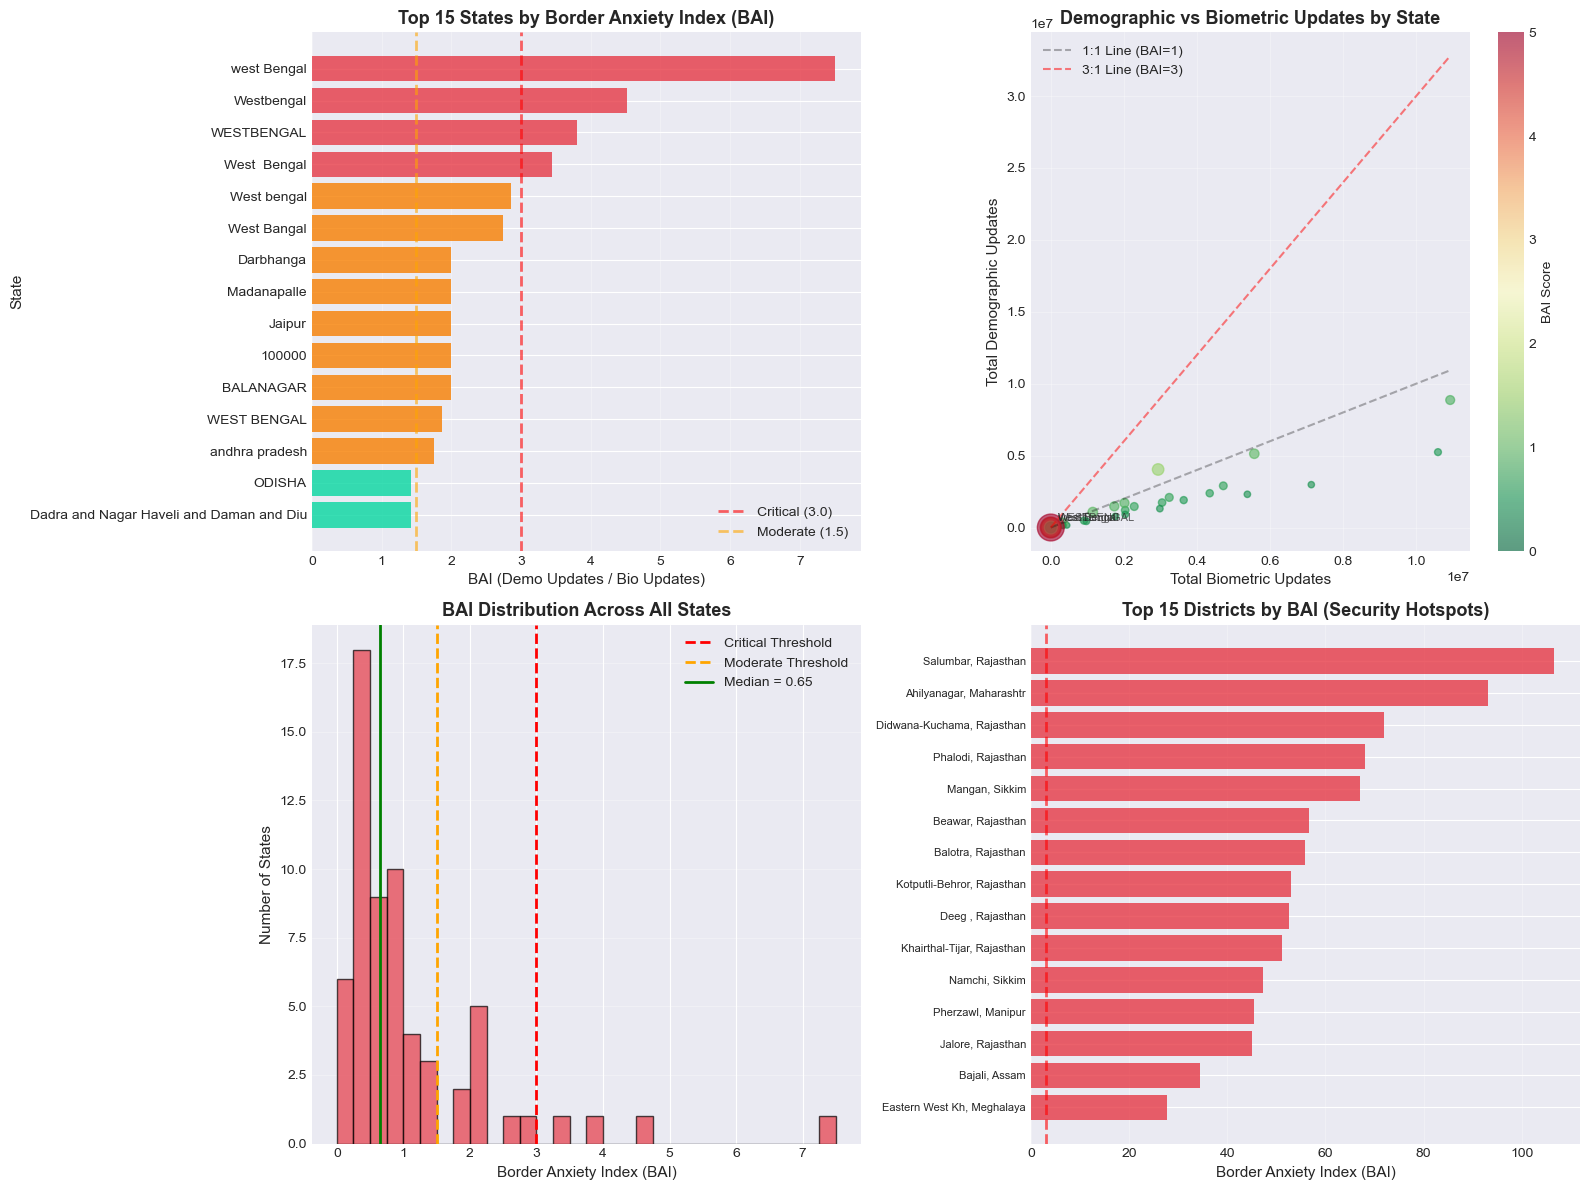


💡 KEY INSIGHT - IDENTITY ANXIETY:
  ✓ NORMAL VERIFICATION PATTERN: BAI = 0.63
  Demographic and biometric updates are balanced.
  Indicates healthy verification compliance.


In [49]:
# Visualize BAI patterns
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Top 15 states by BAI
ax1 = axes[0, 0]
top_15_bai = state_bai_sorted.head(15)
colors_bai = ['#E63946' if bai > 3.0 else '#F77F00' if bai >= 1.5 else '#06D6A0' 
              for bai in top_15_bai['bai']]

ax1.barh(range(len(top_15_bai)), top_15_bai['bai'], color=colors_bai, alpha=0.8)
ax1.set_yticks(range(len(top_15_bai)))
ax1.set_yticklabels(top_15_bai['state'])
ax1.axvline(3.0, color='red', linestyle='--', linewidth=2, alpha=0.6, label='Critical (3.0)')
ax1.axvline(1.5, color='orange', linestyle='--', linewidth=2, alpha=0.6, label='Moderate (1.5)')
ax1.set_title('Top 15 States by Border Anxiety Index (BAI)', fontsize=13, fontweight='bold')
ax1.set_xlabel('BAI (Demo Updates / Bio Updates)', fontsize=11)
ax1.set_ylabel('State', fontsize=11)
ax1.legend(loc='lower right')
ax1.grid(axis='x', alpha=0.3)
ax1.invert_yaxis()

# Plot 2: Demo vs Bio Updates scatter
ax2 = axes[0, 1]
scatter = ax2.scatter(state_bai['total_bio_updates'], state_bai['total_demo_updates'],
                     s=state_bai['bai']*50, alpha=0.6, 
                     c=state_bai['bai'], cmap='RdYlGn_r', vmin=0, vmax=5)
ax2.plot([0, state_bai['total_bio_updates'].max()], 
         [0, state_bai['total_bio_updates'].max()], 
         'k--', alpha=0.3, label='1:1 Line (BAI=1)')
ax2.plot([0, state_bai['total_bio_updates'].max()], 
         [0, 3*state_bai['total_bio_updates'].max()], 
         'r--', alpha=0.5, label='3:1 Line (BAI=3)')
ax2.set_title('Demographic vs Biometric Updates by State', fontsize=13, fontweight='bold')
ax2.set_xlabel('Total Biometric Updates', fontsize=11)
ax2.set_ylabel('Total Demographic Updates', fontsize=11)
ax2.legend(loc='upper left')
ax2.grid(alpha=0.3)
plt.colorbar(scatter, ax=ax2, label='BAI Score')

# Annotate high-BAI states
for _, row in state_bai_sorted.head(3).iterrows():
    if row['total_bio_updates'] > 0:
        ax2.annotate(row['state'], (row['total_bio_updates'], row['total_demo_updates']),
                    fontsize=8, alpha=0.7, xytext=(5, 5), textcoords='offset points')

# Plot 3: BAI distribution
ax3 = axes[1, 0]
ax3.hist(state_bai['bai'], bins=30, color='#E63946', alpha=0.7, edgecolor='black')
ax3.axvline(3.0, color='red', linestyle='--', linewidth=2, label='Critical Threshold')
ax3.axvline(1.5, color='orange', linestyle='--', linewidth=2, label='Moderate Threshold')
ax3.axvline(state_bai['bai'].median(), color='green', linestyle='-', 
           linewidth=2, label=f'Median = {state_bai["bai"].median():.2f}')
ax3.set_title('BAI Distribution Across All States', fontsize=13, fontweight='bold')
ax3.set_xlabel('Border Anxiety Index (BAI)', fontsize=11)
ax3.set_ylabel('Number of States', fontsize=11)
ax3.legend(loc='upper right')
ax3.grid(axis='y', alpha=0.3)

# Plot 4: Top 15 districts by BAI
ax4 = axes[1, 1]
top_15_dist_bai = district_bai_sorted.head(15)
colors_dist_bai = ['#E63946' if bai > 3.0 else '#F77F00' if bai >= 1.5 else '#06D6A0' 
                   for bai in top_15_dist_bai['bai']]

ax4.barh(range(len(top_15_dist_bai)), top_15_dist_bai['bai'], color=colors_dist_bai, alpha=0.8)
ax4.set_yticks(range(len(top_15_dist_bai)))
district_labels = [f"{row['district'][:15]}, {row['state'][:10]}" 
                   for _, row in top_15_dist_bai.iterrows()]
ax4.set_yticklabels(district_labels, fontsize=8)
ax4.axvline(3.0, color='red', linestyle='--', linewidth=2, alpha=0.6)
ax4.set_title('Top 15 Districts by BAI (Security Hotspots)', fontsize=13, fontweight='bold')
ax4.set_xlabel('Border Anxiety Index (BAI)', fontsize=11)
ax4.grid(axis='x', alpha=0.3)
ax4.invert_yaxis()

plt.tight_layout()
plt.show()

print("\n💡 KEY INSIGHT - IDENTITY ANXIETY:")
if overall_bai > 3.0:
    print(f"  🔴 CRITICAL NATIONAL SECURITY CONCERN: BAI = {overall_bai:.2f}")
    print("  Demographic updates VASTLY exceed biometric verification.")
    print("  HIGH RISK: Widespread identity changes without physical verification.")
    print("  RECOMMENDATION: Mandate biometric verification for all demographic changes.")
elif overall_bai > 1.5:
    print(f"  ⚠️  MODERATE IDENTITY ANXIETY: BAI = {overall_bai:.2f}")
    print("  Demographic updates exceed biometric updates.")
    print("  Suggests identity correction activity without full verification.")
    print("  RECOMMENDATION: Enhanced monitoring in high-BAI districts.")
else:
    print(f"  ✓ NORMAL VERIFICATION PATTERN: BAI = {overall_bai:.2f}")
    print("  Demographic and biometric updates are balanced.")
    print("  Indicates healthy verification compliance.")

## TASK 3.2: Ghost Friction Index (GFI)

**Exploration**: Identify "enroll and forget" behavior indicating potential ghost IDs or inactive accounts.

**Logic**:
- **Total Enrolments**: New Aadhaar registrations (one-time activity)
- **Total Updates**: Demographic + Biometric updates (ongoing engagement)
- High ratio → People enroll but never return → Potential fake IDs or disengaged users

**Formula**:
$$\text{GFI} = \frac{\text{Total Enrolments}}{\text{Total Updates} + 1}$$

**Interpretation**:
- GFI > 5.0: **Ghost territory** - "Enroll and forget" epidemic
- GFI 2.0-5.0: Moderate disengagement
- GFI < 2.0: Active user base (healthy ongoing engagement)

In [50]:
print("\n" + "="*70)
print("CALCULATING GHOST FRICTION INDEX (GFI)")
print("="*70 + "\n")

# Calculate district-level GFI
district_ghost = district_daily_df.groupby(['state', 'district']).agg({
    'enrol_infant': 'sum',
    'enrol_child': 'sum',
    'enrol_adult': 'sum',
    'demo_child': 'sum',
    'demo_adult': 'sum',
    'bio_child': 'sum',
    'bio_adult': 'sum'
}).reset_index()

district_ghost['total_enrolments'] = (
    district_ghost['enrol_infant'] + 
    district_ghost['enrol_child'] + 
    district_ghost['enrol_adult']
)

district_ghost['total_updates'] = (
    district_ghost['demo_child'] + district_ghost['demo_adult'] +
    district_ghost['bio_child'] + district_ghost['bio_adult']
)

# Calculate GFI (add 1 to denominator to avoid division by zero)
district_ghost['gfi'] = district_ghost['total_enrolments'] / (district_ghost['total_updates'] + 1)

# Overall GFI
overall_enrolments = district_ghost['total_enrolments'].sum()
overall_updates = district_ghost['total_updates'].sum()
overall_gfi = overall_enrolments / (overall_updates + 1)

print(f"Overall Ghost Friction Index (GFI): {overall_gfi:.3f}")
print(f"  • Total enrolments: {overall_enrolments:,.0f}")
print(f"  • Total updates: {overall_updates:,.0f}")
print(f"  • Ratio: {overall_gfi:.2f}:1 (enrol:update)")

# Calculate state-level GFI
state_gfi = district_ghost.groupby('state').agg({
    'total_enrolments': 'sum',
    'total_updates': 'sum'
}).reset_index()

state_gfi['gfi'] = state_gfi['total_enrolments'] / (state_gfi['total_updates'] + 1)
state_gfi_sorted = state_gfi.sort_values('gfi', ascending=False)

print("\n📊 TOP 15 STATES BY GHOST FRICTION INDEX (GFI):")
print("="*70)
print(state_gfi_sorted.head(15).to_string(index=False))

print("\n📊 GFI INTERPRETATION:")
ghost_territory = state_gfi[state_gfi['gfi'] > 5.0]
moderate_disengagement = state_gfi[(state_gfi['gfi'] >= 2.0) & (state_gfi['gfi'] <= 5.0)]
active_users = state_gfi[state_gfi['gfi'] < 2.0]

print(f"  • Ghost Territory (GFI > 5.0): {len(ghost_territory)} states")
if len(ghost_territory) > 0:
    print(f"    ⚠️  GHOST ID RISK - States with 'enroll and forget' epidemic:")
    for _, row in ghost_territory.nlargest(5, 'gfi').iterrows():
        print(f"      - {row['state']}: GFI = {row['gfi']:.2f} (Enrol: {row['total_enrolments']:,.0f}, Updates: {row['total_updates']:,.0f})")

print(f"  • Moderate Disengagement (GFI 2.0-5.0): {len(moderate_disengagement)} states")
if len(moderate_disengagement) > 0:
    print(f"    Examples: {', '.join(moderate_disengagement.head(3)['state'].tolist())}")

print(f"  • Active User Base (GFI < 2.0): {len(active_users)} states")
if len(active_users) > 0:
    print(f"    ✓ Healthy engagement in: {', '.join(active_users.nsmallest(3, 'gfi')['state'].tolist())}")

# Top districts with highest GFI
print(f"\n📊 TOP 20 DISTRICTS BY GFI (Potential Ghost ID Hotspots):")
print("="*70)
district_gfi_sorted = district_ghost.sort_values('gfi', ascending=False)
print(district_gfi_sorted.head(20)[['state', 'district', 'total_enrolments', 'total_updates', 'gfi']].to_string(index=False))


CALCULATING GHOST FRICTION INDEX (GFI)

Overall Ghost Friction Index (GFI): 0.050
  • Total enrolments: 6,699,104
  • Total updates: 132,738,148
  • Ratio: 0.05:1 (enrol:update)

📊 TOP 15 STATES BY GHOST FRICTION INDEX (GFI):
                                       state  total_enrolments  total_updates        gfi
                           Jammu And Kashmir             950.0            0.0 950.000000
The Dadra And Nagar Haveli And Daman And Diu             716.0            0.0 716.000000
                                      100000             218.0            2.0  72.666667
                                   Meghalaya          114312.0       187928.0   0.608272
                                       Assam          271122.0      2221295.0   0.122056
                                West  Bengal              17.0          141.0   0.119718
                                    Nagaland           16943.0       161953.0   0.104616
                                 West bengal               7.

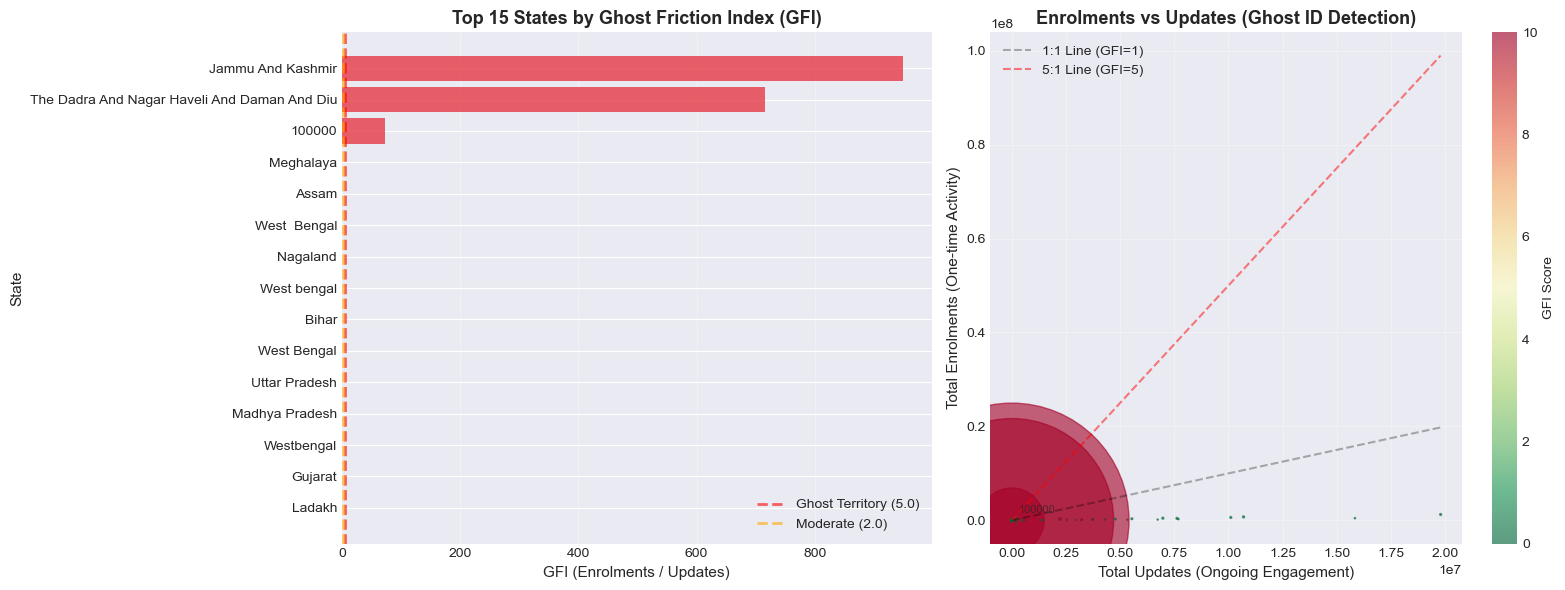


💡 KEY INSIGHT - GHOST ID RISK:
  ✓ ACTIVE USER BASE: GFI = 0.05
  Healthy ratio of enrolments to updates.
  Indicates ongoing engagement and active Aadhaar usage.


In [51]:
# Visualize GFI patterns
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Top 15 states by GFI
top_15_gfi = state_gfi_sorted.head(15)
colors_gfi = ['#E63946' if gfi > 5.0 else '#F77F00' if gfi >= 2.0 else '#06D6A0' 
              for gfi in top_15_gfi['gfi']]

ax1.barh(range(len(top_15_gfi)), top_15_gfi['gfi'], color=colors_gfi, alpha=0.8)
ax1.set_yticks(range(len(top_15_gfi)))
ax1.set_yticklabels(top_15_gfi['state'])
ax1.axvline(5.0, color='red', linestyle='--', linewidth=2, alpha=0.6, label='Ghost Territory (5.0)')
ax1.axvline(2.0, color='orange', linestyle='--', linewidth=2, alpha=0.6, label='Moderate (2.0)')
ax1.set_title('Top 15 States by Ghost Friction Index (GFI)', fontsize=13, fontweight='bold')
ax1.set_xlabel('GFI (Enrolments / Updates)', fontsize=11)
ax1.set_ylabel('State', fontsize=11)
ax1.legend(loc='lower right')
ax1.grid(axis='x', alpha=0.3)
ax1.invert_yaxis()

# Plot 2: Enrolments vs Updates scatter (Ghost ID detection)
scatter2 = ax2.scatter(state_gfi['total_updates'], state_gfi['total_enrolments'],
                      s=state_gfi['gfi']*30, alpha=0.6,
                      c=state_gfi['gfi'], cmap='RdYlGn_r', vmin=0, vmax=10)

# Add reference lines
max_val = max(state_gfi['total_updates'].max(), state_gfi['total_enrolments'].max())
ax2.plot([0, max_val], [0, max_val], 'k--', alpha=0.3, label='1:1 Line (GFI=1)')
ax2.plot([0, max_val], [0, 5*max_val], 'r--', alpha=0.5, label='5:1 Line (GFI=5)')

ax2.set_title('Enrolments vs Updates (Ghost ID Detection)', fontsize=13, fontweight='bold')
ax2.set_xlabel('Total Updates (Ongoing Engagement)', fontsize=11)
ax2.set_ylabel('Total Enrolments (One-time Activity)', fontsize=11)
ax2.legend(loc='upper left')
ax2.grid(alpha=0.3)
plt.colorbar(scatter2, ax=ax2, label='GFI Score')

# Annotate high-GFI states
for _, row in state_gfi_sorted.head(3).iterrows():
    if row['total_updates'] > 0:
        ax2.annotate(row['state'], (row['total_updates'], row['total_enrolments']),
                    fontsize=8, alpha=0.7, xytext=(5, 5), textcoords='offset points')

plt.tight_layout()
plt.show()

print("\n💡 KEY INSIGHT - GHOST ID RISK:")
if overall_gfi > 5.0:
    print(f"  🔴 SEVERE GHOST ID EPIDEMIC: GFI = {overall_gfi:.2f}")
    print("  Enrolments VASTLY exceed ongoing updates.")
    print("  HIGH RISK: Mass 'enroll and forget' behavior - potential fake IDs or inactive accounts.")
    print("  RECOMMENDATION: Audit high-GFI districts, implement periodic verification mandates.")
elif overall_gfi > 2.0:
    print(f"  ⚠️  MODERATE DISENGAGEMENT: GFI = {overall_gfi:.2f}")
    print("  Enrolments exceed updates significantly.")
    print("  Indicates low user engagement after initial registration.")
    print("  RECOMMENDATION: Encourage periodic updates through welfare linkages.")
else:
    print(f"  ✓ ACTIVE USER BASE: GFI = {overall_gfi:.2f}")
    print("  Healthy ratio of enrolments to updates.")
    print("  Indicates ongoing engagement and active Aadhaar usage.")

## TASK 3.3: The Mobility Ratio

**Exploration**: Track population churn and migration intensity through demographic update patterns.

**Logic**:
- **Demographic Updates**: Address/name/DOB changes (migration/relocation indicator)
- **Total Activity**: All enrolments + all updates (full engagement measure)
- High ratio → Population constantly changing addresses → High migration/urban planning concern

**Formula**:
$$\text{Mobility Ratio} = \frac{\text{Demographic Updates}}{\text{Total Activity (Enrolments + Updates)}}$$

**Interpretation**:
- Mobility > 0.7: **High identity churn** - migration epidemic
- Mobility 0.4-0.7: Moderate mobility
- Mobility < 0.4: Stable population

**Use Cases**: Border security, urban planning, labor migration tracking

In [52]:
print("\n" + "="*70)
print("CALCULATING MOBILITY RATIO")
print("="*70 + "\n")

# Calculate district-level mobility
district_mobility = district_ghost.copy()  # Already has enrolments and updates

# Calculate total activity
district_mobility['total_activity'] = (
    district_mobility['total_enrolments'] + district_mobility['total_updates']
)

# Calculate demographic updates component (already calculated)
district_mobility['demo_updates'] = (
    district_mobility['demo_child'] + district_mobility['demo_adult']
)

# Calculate Mobility Ratio
district_mobility['mobility_ratio'] = district_mobility['demo_updates'] / (
    district_mobility['total_activity'] + 1  # Avoid division by zero
)

# Overall Mobility Ratio
overall_demo = district_mobility['demo_updates'].sum()
overall_activity = district_mobility['total_activity'].sum()
overall_mobility = overall_demo / (overall_activity + 1)

print(f"Overall Mobility Ratio: {overall_mobility:.3f}")
print(f"  • Demographic updates: {overall_demo:,.0f}")
print(f"  • Total activity: {overall_activity:,.0f}")
print(f"  • Proportion: {overall_mobility*100:.1f}% of all activity is demographic changes")

# Calculate state-level mobility
state_mobility = district_mobility.groupby('state').agg({
    'demo_updates': 'sum',
    'total_activity': 'sum'
}).reset_index()

state_mobility['mobility_ratio'] = state_mobility['demo_updates'] / (
    state_mobility['total_activity'] + 1
)
state_mobility_sorted = state_mobility.sort_values('mobility_ratio', ascending=False)

print("\n📊 TOP 15 STATES BY MOBILITY RATIO:")
print("="*70)
print(state_mobility_sorted.head(15).to_string(index=False))

print("\n📊 MOBILITY RATIO INTERPRETATION:")
high_churn = state_mobility[state_mobility['mobility_ratio'] > 0.7]
moderate_mobility = state_mobility[(state_mobility['mobility_ratio'] >= 0.4) & 
                                    (state_mobility['mobility_ratio'] <= 0.7)]
stable_population = state_mobility[state_mobility['mobility_ratio'] < 0.4]

print(f"  • High Identity Churn (Mobility > 0.7): {len(high_churn)} states")
if len(high_churn) > 0:
    print(f"    ⚠️  MIGRATION EPIDEMIC - States with constant address changes:")
    for _, row in high_churn.nlargest(5, 'mobility_ratio').iterrows():
        print(f"      - {row['state']}: {row['mobility_ratio']*100:.1f}% mobility ({row['demo_updates']:,.0f} changes)")

print(f"  • Moderate Mobility (0.4-0.7): {len(moderate_mobility)} states")
if len(moderate_mobility) > 0:
    print(f"    Examples: {', '.join(moderate_mobility.head(3)['state'].tolist())}")

print(f"  • Stable Population (< 0.4): {len(stable_population)} states")
if len(stable_population) > 0:
    print(f"    ✓ Low migration in: {', '.join(stable_population.nsmallest(3, 'mobility_ratio')['state'].tolist())}")

# Top districts by mobility (migration hotspots)
print(f"\n📊 TOP 20 DISTRICTS BY MOBILITY RATIO (Migration Hotspots):")
print("="*70)
district_mobility_sorted = district_mobility.sort_values('mobility_ratio', ascending=False)
print(district_mobility_sorted.head(20)[['state', 'district', 'demo_updates', 'total_activity', 'mobility_ratio']].to_string(index=False))

# Labor migration corridors (high-mobility metro districts)
metro_states = ['Maharashtra', 'Delhi', 'Karnataka', 'Tamil Nadu', 'Gujarat']
metro_mobility = state_mobility[state_mobility['state'].isin(metro_states)].sort_values('mobility_ratio', ascending=False)

print(f"\n🏙️  METRO LABOR MIGRATION ANALYSIS:")
print("="*70)
if len(metro_mobility) > 0:
    print("Major Metro States - Mobility Scores:")
    for _, row in metro_mobility.iterrows():
        status = "🔴 HIGH CHURN" if row['mobility_ratio'] > 0.7 else "⚠️  MODERATE" if row['mobility_ratio'] >= 0.4 else "✓ STABLE"
        print(f"  {status} - {row['state']}: {row['mobility_ratio']*100:.1f}% mobility")
else:
    print("  No recognized metro states found in data")


CALCULATING MOBILITY RATIO

Overall Mobility Ratio: 0.369
  • Demographic updates: 51,409,744
  • Total activity: 139,437,252
  • Proportion: 36.9% of all activity is demographic changes

📊 TOP 15 STATES BY MOBILITY RATIO:
                                   state  demo_updates  total_activity  mobility_ratio
                             west Bengal          15.0            16.0        0.882353
                              WESTBENGAL          57.0            72.0        0.780822
                              Westbengal          95.0           122.0        0.772358
                             West Bangal         159.0           226.0        0.700441
                            West  Bengal         110.0           158.0        0.691824
                             West bengal          60.0            87.0        0.681818
                             Madanapalle           2.0             2.0        0.666667
                                  Jaipur           2.0             2.0        0.

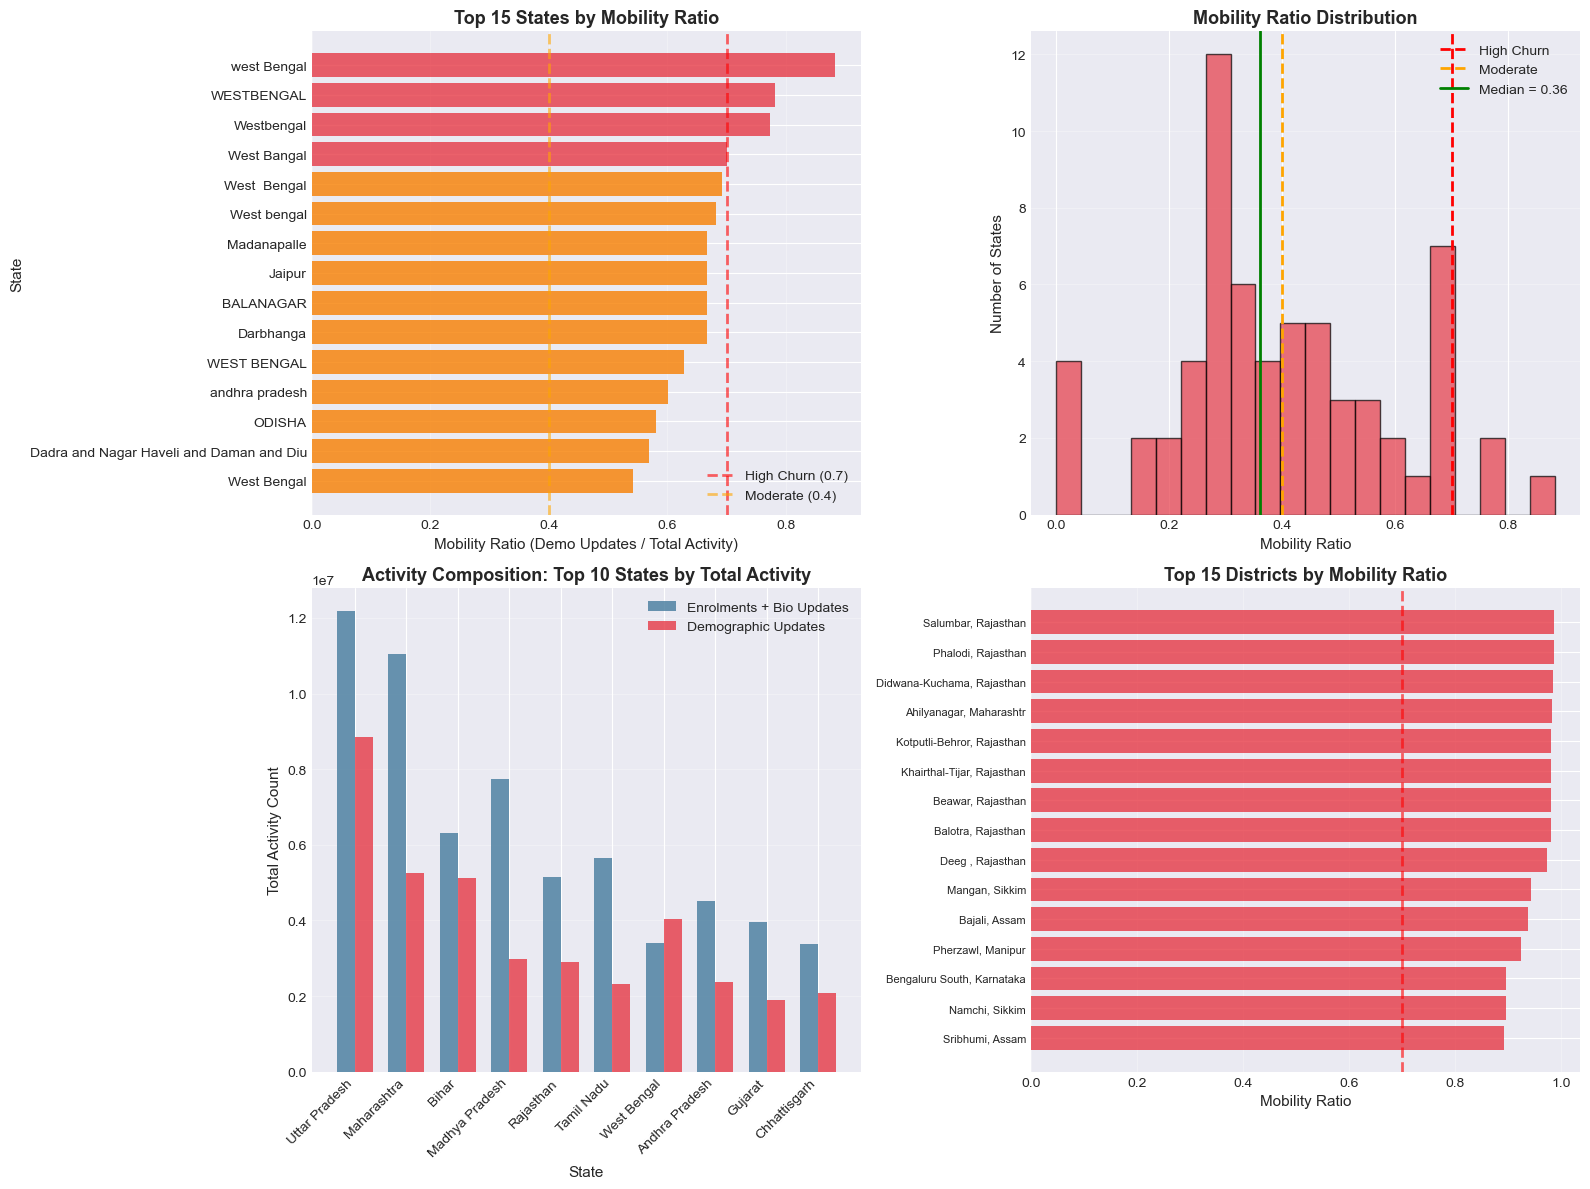


💡 KEY INSIGHT - POPULATION MOBILITY:
  ✓ STABLE POPULATION: Mobility = 36.9%
  Low demographic churn indicates settled population.
  Most activity is new enrolments and biometric updates.


In [53]:
# Visualize Mobility Ratio
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Top 15 states by Mobility Ratio
ax1 = axes[0, 0]
top_15_mobility = state_mobility_sorted.head(15)
colors_mobility = ['#E63946' if mob > 0.7 else '#F77F00' if mob >= 0.4 else '#06D6A0' 
                   for mob in top_15_mobility['mobility_ratio']]

ax1.barh(range(len(top_15_mobility)), top_15_mobility['mobility_ratio'], 
        color=colors_mobility, alpha=0.8)
ax1.set_yticks(range(len(top_15_mobility)))
ax1.set_yticklabels(top_15_mobility['state'])
ax1.axvline(0.7, color='red', linestyle='--', linewidth=2, alpha=0.6, label='High Churn (0.7)')
ax1.axvline(0.4, color='orange', linestyle='--', linewidth=2, alpha=0.6, label='Moderate (0.4)')
ax1.set_title('Top 15 States by Mobility Ratio', fontsize=13, fontweight='bold')
ax1.set_xlabel('Mobility Ratio (Demo Updates / Total Activity)', fontsize=11)
ax1.set_ylabel('State', fontsize=11)
ax1.legend(loc='lower right')
ax1.grid(axis='x', alpha=0.3)
ax1.invert_yaxis()

# Plot 2: Mobility distribution
ax2 = axes[0, 1]
ax2.hist(state_mobility['mobility_ratio'], bins=20, color='#E63946', alpha=0.7, edgecolor='black')
ax2.axvline(0.7, color='red', linestyle='--', linewidth=2, label='High Churn')
ax2.axvline(0.4, color='orange', linestyle='--', linewidth=2, label='Moderate')
ax2.axvline(state_mobility['mobility_ratio'].median(), color='green', linestyle='-', 
           linewidth=2, label=f'Median = {state_mobility["mobility_ratio"].median():.2f}')
ax2.set_title('Mobility Ratio Distribution', fontsize=13, fontweight='bold')
ax2.set_xlabel('Mobility Ratio', fontsize=11)
ax2.set_ylabel('Number of States', fontsize=11)
ax2.legend(loc='upper right')
ax2.grid(axis='y', alpha=0.3)

# Plot 3: Activity composition (enrolments vs updates)
ax3 = axes[1, 0]
state_comp = state_mobility.copy()
state_comp['enrolments'] = state_comp['total_activity'] - state_comp['demo_updates']
state_comp_top10 = state_comp.nlargest(10, 'total_activity')

x_pos = np.arange(len(state_comp_top10))
width = 0.35

ax3.bar(x_pos - width/2, state_comp_top10['enrolments'], width, 
       label='Enrolments + Bio Updates', color='#457B9D', alpha=0.8)
ax3.bar(x_pos + width/2, state_comp_top10['demo_updates'], width, 
       label='Demographic Updates', color='#E63946', alpha=0.8)

ax3.set_title('Activity Composition: Top 10 States by Total Activity', fontsize=13, fontweight='bold')
ax3.set_xlabel('State', fontsize=11)
ax3.set_ylabel('Total Activity Count', fontsize=11)
ax3.set_xticks(x_pos)
ax3.set_xticklabels(state_comp_top10['state'], rotation=45, ha='right')
ax3.legend(loc='upper right')
ax3.grid(axis='y', alpha=0.3)

# Plot 4: Top 15 districts by mobility
ax4 = axes[1, 1]
top_15_dist_mobility = district_mobility_sorted.head(15)
colors_dist_mob = ['#E63946' if mob > 0.7 else '#F77F00' if mob >= 0.4 else '#06D6A0' 
                   for mob in top_15_dist_mobility['mobility_ratio']]

ax4.barh(range(len(top_15_dist_mobility)), top_15_dist_mobility['mobility_ratio'], 
        color=colors_dist_mob, alpha=0.8)
ax4.set_yticks(range(len(top_15_dist_mobility)))
district_mob_labels = [f"{row['district'][:15]}, {row['state'][:10]}" 
                       for _, row in top_15_dist_mobility.iterrows()]
ax4.set_yticklabels(district_mob_labels, fontsize=8)
ax4.axvline(0.7, color='red', linestyle='--', linewidth=2, alpha=0.6)
ax4.set_title('Top 15 Districts by Mobility Ratio', fontsize=13, fontweight='bold')
ax4.set_xlabel('Mobility Ratio', fontsize=11)
ax4.grid(axis='x', alpha=0.3)
ax4.invert_yaxis()

plt.tight_layout()
plt.show()

print("\n💡 KEY INSIGHT - POPULATION MOBILITY:")
if overall_mobility > 0.7:
    print(f"  🔴 MIGRATION EPIDEMIC: Mobility = {overall_mobility*100:.1f}%")
    print("  Population is constantly changing addresses - not growing.")
    print("  HIGH CHURN: Indicates massive labor migration or border instability.")
    print("  CRITICAL FOR: Urban planning, resource allocation, security monitoring.")
elif overall_mobility > 0.4:
    print(f"  ⚠️  MODERATE MOBILITY: Mobility = {overall_mobility*100:.1f}%")
    print("  Significant demographic changes indicate active migration.")
    print("  RECOMMENDATION: Track migration corridors for infrastructure planning.")
else:
    print(f"  ✓ STABLE POPULATION: Mobility = {overall_mobility*100:.1f}%")
    print("  Low demographic churn indicates settled population.")
    print("  Most activity is new enrolments and biometric updates.")

## Phase 3 Summary: Security & Integrity Dashboard

Consolidate all three security metrics to create a comprehensive risk profile.

In [55]:
# Phase 3: Comprehensive Security Dashboard

# Merge all three security metrics at state level
security_dashboard = state_bai[['state', 'bai']].copy()
security_dashboard = security_dashboard.merge(
    state_gfi[['state', 'gfi']], 
    on='state', 
    how='outer'
)
security_dashboard = security_dashboard.merge(
    state_mobility[['state', 'mobility_ratio']], 
    on='state', 
    how='outer'
)
security_dashboard.columns = ['State', 'Border_Anxiety_Index', 'Ghost_Friction_Index', 'Mobility_Ratio']

# Calculate composite security risk score (normalized average)
# Normalize each metric to 0-1 scale for composite score
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
security_dashboard['BAI_normalized'] = scaler.fit_transform(security_dashboard[['Border_Anxiety_Index']])
security_dashboard['GFI_normalized'] = scaler.fit_transform(security_dashboard[['Ghost_Friction_Index']])
security_dashboard['Mobility_normalized'] = scaler.fit_transform(security_dashboard[['Mobility_Ratio']])

# Composite Security Risk Score (equal weighting)
security_dashboard['Security_Risk_Score'] = (
    security_dashboard['BAI_normalized'] + 
    security_dashboard['GFI_normalized'] + 
    security_dashboard['Mobility_normalized']
) / 3

# Classify security risk levels
security_dashboard['Risk_Level'] = security_dashboard['Security_Risk_Score'].apply(
    lambda x: 'CRITICAL' if x > 0.7 else ('HIGH' if x > 0.5 else ('MODERATE' if x > 0.3 else 'LOW'))
)

# Sort by composite risk score
security_dashboard_sorted = security_dashboard.sort_values('Security_Risk_Score', ascending=False)

print("=" * 100)
print("PHASE 3 SUMMARY: NATIONAL SECURITY & INTEGRITY DASHBOARD")
print("=" * 100)
print("\n📊 Overall National Security Profile:")
print(f"   • Average BAI (Border Anxiety): {security_dashboard['Border_Anxiety_Index'].mean():.2f}")
print(f"   • Average GFI (Ghost Friction): {security_dashboard['Ghost_Friction_Index'].mean():.2f}")
print(f"   • Average Mobility Ratio: {security_dashboard['Mobility_Ratio'].mean():.2f}")
print(f"   • Composite Security Risk Score: {security_dashboard['Security_Risk_Score'].mean():.2f}")

print("\n🚨 High-Risk States (Security Risk Score > 0.5):")
high_risk = security_dashboard_sorted[security_dashboard_sorted['Security_Risk_Score'] > 0.5]
if len(high_risk) > 0:
    print(f"   {len(high_risk)} states flagged for comprehensive security review\n")
    print(high_risk[['State', 'Border_Anxiety_Index', 'Ghost_Friction_Index', 'Mobility_Ratio', 'Security_Risk_Score', 'Risk_Level']].head(10).to_string(index=False))
else:
    print("   No states exceed high-risk threshold (>0.5)")

print("\n\n🔍 Security Typology (Multi-Metric Analysis):")
# Identify states with specific security concerns
border_anxiety_states = security_dashboard[security_dashboard['Border_Anxiety_Index'] > 3.0]['State'].tolist()
ghost_territory_states = security_dashboard[security_dashboard['Ghost_Friction_Index'] > 5.0]['State'].tolist()
high_mobility_states = security_dashboard[security_dashboard['Mobility_Ratio'] > 0.7]['State'].tolist()

# Triple threat: High on all three metrics
triple_threat = set(border_anxiety_states) & set(ghost_territory_states) & set(high_mobility_states)
# Double threat: High on two metrics
double_threat_bai_gfi = (set(border_anxiety_states) & set(ghost_territory_states)) - triple_threat
double_threat_bai_mob = (set(border_anxiety_states) & set(high_mobility_states)) - triple_threat
double_threat_gfi_mob = (set(ghost_territory_states) & set(high_mobility_states)) - triple_threat

print(f"   🔴 TRIPLE THREAT (High BAI + GFI + Mobility): {len(triple_threat)} states")
if triple_threat:
    print(f"      {', '.join(triple_threat)}")
print(f"\n   🟠 DOUBLE THREAT - Border Anxiety + Ghost IDs: {len(double_threat_bai_gfi)} states")
if double_threat_bai_gfi:
    print(f"      {', '.join(double_threat_bai_gfi)}")
print(f"\n   🟠 DOUBLE THREAT - Border Anxiety + High Mobility: {len(double_threat_bai_mob)} states")
if double_threat_bai_mob:
    print(f"      {', '.join(double_threat_bai_mob)}")
print(f"\n   🟠 DOUBLE THREAT - Ghost IDs + High Mobility: {len(double_threat_gfi_mob)} states")
if double_threat_gfi_mob:
    print(f"      {', '.join(double_threat_gfi_mob)}")

print(f"\n   🟡 SINGLE CONCERN - Border Anxiety Only: {len(set(border_anxiety_states) - set(ghost_territory_states) - set(high_mobility_states))} states")
print(f"   🟡 SINGLE CONCERN - Ghost IDs Only: {len(set(ghost_territory_states) - set(border_anxiety_states) - set(high_mobility_states))} states")
print(f"   🟡 SINGLE CONCERN - High Mobility Only: {len(set(high_mobility_states) - set(border_anxiety_states) - set(ghost_territory_states))} states")

print("\n\n💡 Strategic Recommendations by Risk Level:")
print(f"   🔴 CRITICAL ({len(security_dashboard[security_dashboard['Risk_Level'] == 'CRITICAL'])} states): Immediate multi-agency security investigation")
print(f"   🟠 HIGH ({len(security_dashboard[security_dashboard['Risk_Level'] == 'HIGH'])} states): Enhanced monitoring and verification protocols")
print(f"   🟡 MODERATE ({len(security_dashboard[security_dashboard['Risk_Level'] == 'MODERATE'])} states): Targeted audits in high-risk districts")
print(f"   🟢 LOW ({len(security_dashboard[security_dashboard['Risk_Level'] == 'LOW'])} states): Routine monitoring sufficient")

print("\n" + "=" * 100)

# Display top 20 states by composite security risk
print("\n📋 Top 20 States by Composite Security Risk Score:")
print(security_dashboard_sorted[['State', 'Border_Anxiety_Index', 'Ghost_Friction_Index', 'Mobility_Ratio', 'Security_Risk_Score', 'Risk_Level']].head(20).to_string(index=False))

PHASE 3 SUMMARY: NATIONAL SECURITY & INTEGRITY DASHBOARD

📊 Overall National Security Profile:
   • Average BAI (Border Anxiety): 1.10
   • Average GFI (Ghost Friction): 27.64
   • Average Mobility Ratio: 0.40
   • Composite Security Risk Score: 0.21

🚨 High-Risk States (Security Risk Score > 0.5):
   1 states flagged for comprehensive security review

      State  Border_Anxiety_Index  Ghost_Friction_Index  Mobility_Ratio  Security_Risk_Score Risk_Level
west Bengal                   7.5                   0.0        0.882353             0.666667       HIGH


🔍 Security Typology (Multi-Metric Analysis):
   🔴 TRIPLE THREAT (High BAI + GFI + Mobility): 0 states

   🟠 DOUBLE THREAT - Border Anxiety + Ghost IDs: 0 states

   🟠 DOUBLE THREAT - Border Anxiety + High Mobility: 3 states
      Westbengal, WESTBENGAL, west Bengal

   🟠 DOUBLE THREAT - Ghost IDs + High Mobility: 0 states

   🟡 SINGLE CONCERN - Border Anxiety Only: 1 states
   🟡 SINGLE CONCERN - Ghost IDs Only: 3 states
   🟡 SINGLE

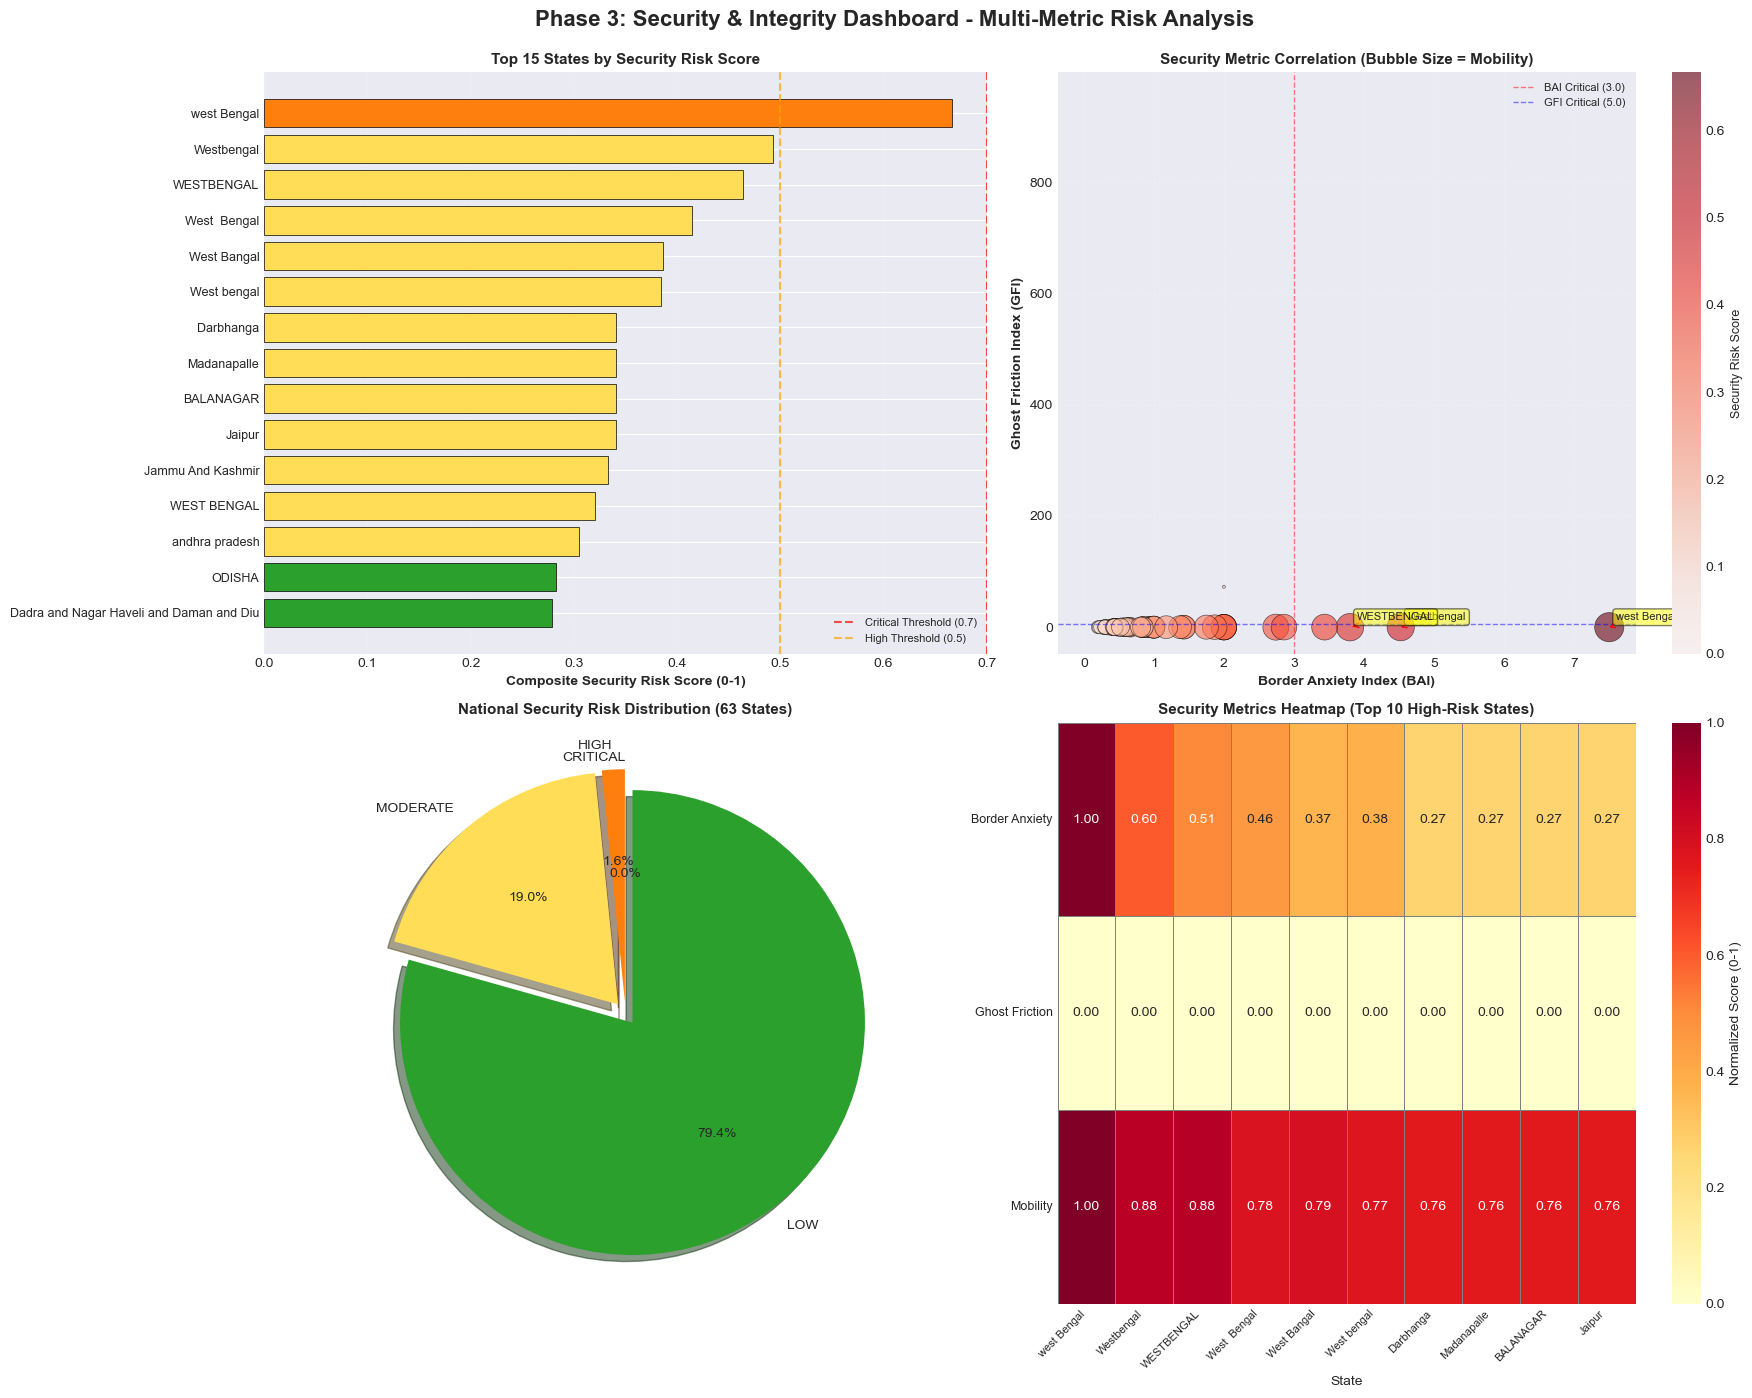


✅ Phase 3 Security Dashboard visualization complete!
   Dashboard shows: Composite risk scores, metric correlation, risk distribution, and multi-metric heatmap


In [56]:
# Visualize Security Dashboard

fig, axes = plt.subplots(2, 2, figsize=(18, 14))
fig.suptitle('Phase 3: Security & Integrity Dashboard - Multi-Metric Risk Analysis', 
             fontsize=16, fontweight='bold', y=0.995)

# Plot 1: Composite Security Risk Score by State (Top 15)
ax1 = axes[0, 0]
top15_risk = security_dashboard_sorted.head(15)
colors_risk = top15_risk['Risk_Level'].map({
    'CRITICAL': '#d62728',
    'HIGH': '#ff7f0e', 
    'MODERATE': '#ffdd57',
    'LOW': '#2ca02c'
})
ax1.barh(range(len(top15_risk)), top15_risk['Security_Risk_Score'], color=colors_risk, edgecolor='black', linewidth=0.5)
ax1.set_yticks(range(len(top15_risk)))
ax1.set_yticklabels(top15_risk['State'], fontsize=9)
ax1.set_xlabel('Composite Security Risk Score (0-1)', fontsize=10, fontweight='bold')
ax1.set_title('Top 15 States by Security Risk Score', fontsize=11, fontweight='bold')
ax1.axvline(x=0.7, color='red', linestyle='--', linewidth=1.5, alpha=0.7, label='Critical Threshold (0.7)')
ax1.axvline(x=0.5, color='orange', linestyle='--', linewidth=1.5, alpha=0.7, label='High Threshold (0.5)')
ax1.legend(loc='lower right', fontsize=8)
ax1.grid(axis='x', alpha=0.3, linestyle=':')
ax1.invert_yaxis()

# Plot 2: 3D Scatter - BAI vs GFI vs Mobility (with bubble size = risk score)
ax2 = axes[0, 1]
scatter = ax2.scatter(
    security_dashboard['Border_Anxiety_Index'], 
    security_dashboard['Ghost_Friction_Index'],
    s=security_dashboard['Mobility_Ratio'] * 500,  # Bubble size proportional to mobility
    c=security_dashboard['Security_Risk_Score'],
    cmap='Reds',
    alpha=0.6,
    edgecolors='black',
    linewidths=0.5
)
ax2.set_xlabel('Border Anxiety Index (BAI)', fontsize=10, fontweight='bold')
ax2.set_ylabel('Ghost Friction Index (GFI)', fontsize=10, fontweight='bold')
ax2.set_title('Security Metric Correlation (Bubble Size = Mobility)', fontsize=11, fontweight='bold')
ax2.axvline(x=3.0, color='red', linestyle='--', linewidth=1, alpha=0.5, label='BAI Critical (3.0)')
ax2.axhline(y=5.0, color='blue', linestyle='--', linewidth=1, alpha=0.5, label='GFI Critical (5.0)')
ax2.grid(alpha=0.3, linestyle=':')
ax2.legend(loc='upper right', fontsize=8)
cbar = plt.colorbar(scatter, ax=ax2)
cbar.set_label('Security Risk Score', fontsize=9)

# Annotate top 3 highest risk states
for idx in range(min(3, len(security_dashboard_sorted))):
    state = security_dashboard_sorted.iloc[idx]
    ax2.annotate(
        state['State'], 
        xy=(state['Border_Anxiety_Index'], state['Ghost_Friction_Index']),
        xytext=(5, 5),
        textcoords='offset points',
        fontsize=8,
        bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0', color='red', lw=1)
    )

# Plot 3: Risk Level Distribution
ax3 = axes[1, 0]
risk_counts = security_dashboard['Risk_Level'].value_counts()
risk_order = ['CRITICAL', 'HIGH', 'MODERATE', 'LOW']
risk_counts_ordered = [risk_counts.get(level, 0) for level in risk_order]
colors_pie = ['#d62728', '#ff7f0e', '#ffdd57', '#2ca02c']
ax3.pie(
    risk_counts_ordered, 
    labels=risk_order, 
    autopct='%1.1f%%',
    colors=colors_pie,
    startangle=90,
    explode=[0.05 if count > 0 else 0 for count in risk_counts_ordered],
    shadow=True
)
ax3.set_title(f'National Security Risk Distribution ({len(security_dashboard)} States)', 
              fontsize=11, fontweight='bold')

# Plot 4: Heatmap - Top 10 High-Risk States with All Metrics
ax4 = axes[1, 1]
top10_heatmap = security_dashboard_sorted.head(10)
heatmap_data = top10_heatmap[['BAI_normalized', 'GFI_normalized', 'Mobility_normalized']].T
heatmap_data.columns = top10_heatmap['State']

import seaborn as sns
sns.heatmap(
    heatmap_data, 
    annot=True, 
    fmt='.2f',
    cmap='YlOrRd',
    cbar_kws={'label': 'Normalized Score (0-1)'},
    linewidths=0.5,
    linecolor='gray',
    ax=ax4,
    vmin=0,
    vmax=1
)
ax4.set_yticklabels(['Border Anxiety', 'Ghost Friction', 'Mobility'], rotation=0, fontsize=9)
ax4.set_xticklabels(ax4.get_xticklabels(), rotation=45, ha='right', fontsize=8)
ax4.set_title('Security Metrics Heatmap (Top 10 High-Risk States)', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

print("\n✅ Phase 3 Security Dashboard visualization complete!")
print("   Dashboard shows: Composite risk scores, metric correlation, risk distribution, and multi-metric heatmap")

---

## PHASE 4: Seasonal Migration & Education Analysis (The "Flow" Signals)

**Context:** Festivals drive labor migration. School registration drives biometric updates.

**Goal:** Identify temporal patterns driven by cultural events (festivals) and institutional cycles (school registration).

**Three Flow Signals:**
1. **Post-Event Migration Intensity (PEMI)**: Address update surge after festivals (e.g., Diwali)
2. **School-Sync Score**: Child biometric compliance during school registration windows
3. **Registration-Driven Update Surge (RDUS)**: School-driven biometric update intensity

### Task 4.1: Post-Event Migration Intensity (PEMI)

**Hypothesis:** Address updates surge after festivals as migrant workers relocate.

**Festival Window:** Diwali (Nov 1-15, 2025)

**Metric Formula:**
$$\text{PEMI} = \frac{\text{Address Updates in D days After Event}}{\text{Address Updates in D days Before Event}}$$

**Interpretation:**
- **PEMI > 3.0**: Significant post-festival migration (high out-migration)
- **PEMI 1.5-3.0**: Moderate post-festival movement
- **PEMI < 1.5**: Stable population (low migration effect)

In [65]:
print("\n" + "="*70)
print("PHASE 4: SEASONAL MIGRATION & EDUCATION ANALYSIS")
print("="*70 + "\n")

print("CALCULATING POST-EVENT MIGRATION INTENSITY (PEMI)")
print("-"*70 + "\n")

# Define festival window: Diwali 2025 (November 1-15)
# Event date: Nov 1, 2025 (Dhanteras, start of Diwali season)
festival_date = pd.to_datetime('2025-11-01')
D = 14  # Window size: 14 days before/after

# Calculate date ranges
before_start = festival_date - pd.Timedelta(days=D)
before_end = festival_date - pd.Timedelta(days=1)
after_start = festival_date + pd.Timedelta(days=1)
after_end = festival_date + pd.Timedelta(days=D)

print(f"Festival: Diwali 2025 (Event Date: {festival_date.strftime('%Y-%m-%d')})")
print(f"Analysis Window: {D} days before/after")
print(f"  • Pre-Festival Period: {before_start.strftime('%Y-%m-%d')} to {before_end.strftime('%Y-%m-%d')}")
print(f"  • Post-Festival Period: {after_start.strftime('%Y-%m-%d')} to {after_end.strftime('%Y-%m-%d')}")

# Filter data for the analysis windows
pre_festival = district_daily_df[
    (district_daily_df['date'] >= before_start) & 
    (district_daily_df['date'] <= before_end)
]

post_festival = district_daily_df[
    (district_daily_df['date'] >= after_start) & 
    (district_daily_df['date'] <= after_end)
]

print(f"\n📊 Data Availability:")
print(f"  • Pre-festival records: {len(pre_festival):,}")
print(f"  • Post-festival records: {len(post_festival):,}")

# Calculate address updates (demographic updates) for each district
district_pemi = pd.DataFrame()

# Pre-festival address updates by district
pre_updates = pre_festival.groupby(['state', 'district']).agg({
    'demo_child': 'sum',
    'demo_adult': 'sum'
}).reset_index()
pre_updates['pre_address_updates'] = pre_updates['demo_child'] + pre_updates['demo_adult']

# Post-festival address updates by district
post_updates = post_festival.groupby(['state', 'district']).agg({
    'demo_child': 'sum',
    'demo_adult': 'sum'
}).reset_index()
post_updates['post_address_updates'] = post_updates['demo_child'] + post_updates['demo_adult']

# Merge and calculate PEMI
district_pemi = pre_updates[['state', 'district', 'pre_address_updates']].merge(
    post_updates[['state', 'district', 'post_address_updates']],
    on=['state', 'district'],
    how='outer'
).fillna(0)

# Calculate PEMI (add 1 to denominator to avoid division by zero)
district_pemi['pemi'] = district_pemi['post_address_updates'] / (
    district_pemi['pre_address_updates'] + 1
)

# Overall PEMI
overall_pre = district_pemi['pre_address_updates'].sum()
overall_post = district_pemi['post_address_updates'].sum()
overall_pemi = overall_post / (overall_pre + 1)

print(f"\n🎆 Overall Post-Event Migration Intensity (PEMI): {overall_pemi:.3f}")
print(f"  • Pre-festival address updates: {overall_pre:,.0f}")
print(f"  • Post-festival address updates: {overall_post:,.0f}")
print(f"  • Change: {((overall_pemi - 1) * 100):+.1f}%")

# State-level PEMI
state_pemi = district_pemi.groupby('state').agg({
    'pre_address_updates': 'sum',
    'post_address_updates': 'sum'
}).reset_index()
state_pemi['pemi'] = state_pemi['post_address_updates'] / (state_pemi['pre_address_updates'] + 1)
state_pemi_sorted = state_pemi.sort_values('pemi', ascending=False)

print("\n📊 TOP 15 STATES BY PEMI (Post-Festival Migration):")
print("="*70)
print(state_pemi_sorted.head(15).to_string(index=False))

# PEMI interpretation
high_migration = state_pemi[state_pemi['pemi'] > 3.0]
moderate_migration = state_pemi[(state_pemi['pemi'] >= 1.5) & (state_pemi['pemi'] <= 3.0)]
stable_population_pemi = state_pemi[state_pemi['pemi'] < 1.5]

print(f"\n📊 PEMI INTERPRETATION:")
print(f"  • High Post-Festival Migration (PEMI > 3.0): {len(high_migration)} states")
if len(high_migration) > 0:
    print(f"    ⚠️  MIGRATION SURGE - States with significant worker relocation:")
    for _, row in high_migration.nlargest(5, 'pemi').iterrows():
        print(f"      - {row['state']}: PEMI = {row['pemi']:.2f} (Pre: {row['pre_address_updates']:,.0f}, Post: {row['post_address_updates']:,.0f})")

print(f"  • Moderate Migration (PEMI 1.5-3.0): {len(moderate_migration)} states")
if len(moderate_migration) > 0:
    print(f"    Examples: {', '.join(moderate_migration.head(3)['state'].tolist())}")

print(f"  • Stable Population (PEMI < 1.5): {len(stable_population_pemi)} states")
if len(stable_population_pemi) > 0:
    print(f"    ✓ Low migration effect in: {', '.join(stable_population_pemi.nsmallest(3, 'pemi')['state'].tolist())}")

# Top 10 districts by PEMI (high out-migration hotspots)
print(f"\n📊 TOP 10 DISTRICTS BY PEMI (High Out-Migration Hotspots):")
print("="*70)
district_pemi_sorted = district_pemi.sort_values('pemi', ascending=False)
top_10_pemi = district_pemi_sorted.head(10)
print(top_10_pemi[['state', 'district', 'pre_address_updates', 'post_address_updates', 'pemi']].to_string(index=False))


PHASE 4: SEASONAL MIGRATION & EDUCATION ANALYSIS

CALCULATING POST-EVENT MIGRATION INTENSITY (PEMI)
----------------------------------------------------------------------

Festival: Diwali 2025 (Event Date: 2025-11-01)
Analysis Window: 14 days before/after
  • Pre-Festival Period: 2025-10-18 to 2025-10-31
  • Post-Festival Period: 2025-11-02 to 2025-11-15

📊 Data Availability:
  • Pre-festival records: 12,857
  • Post-festival records: 13,215

🎆 Overall Post-Event Migration Intensity (PEMI): 1.624
  • Pre-festival address updates: 3,881,879
  • Post-festival address updates: 6,303,124
  • Change: +62.4%

📊 TOP 15 STATES BY PEMI (Post-Festival Migration):
                                   state  pre_address_updates  post_address_updates     pemi
                              Westbengal                  3.0                  17.0 4.250000
                                 Gujarat              61535.0              182122.0 2.959601
                              WESTBENGAL                 

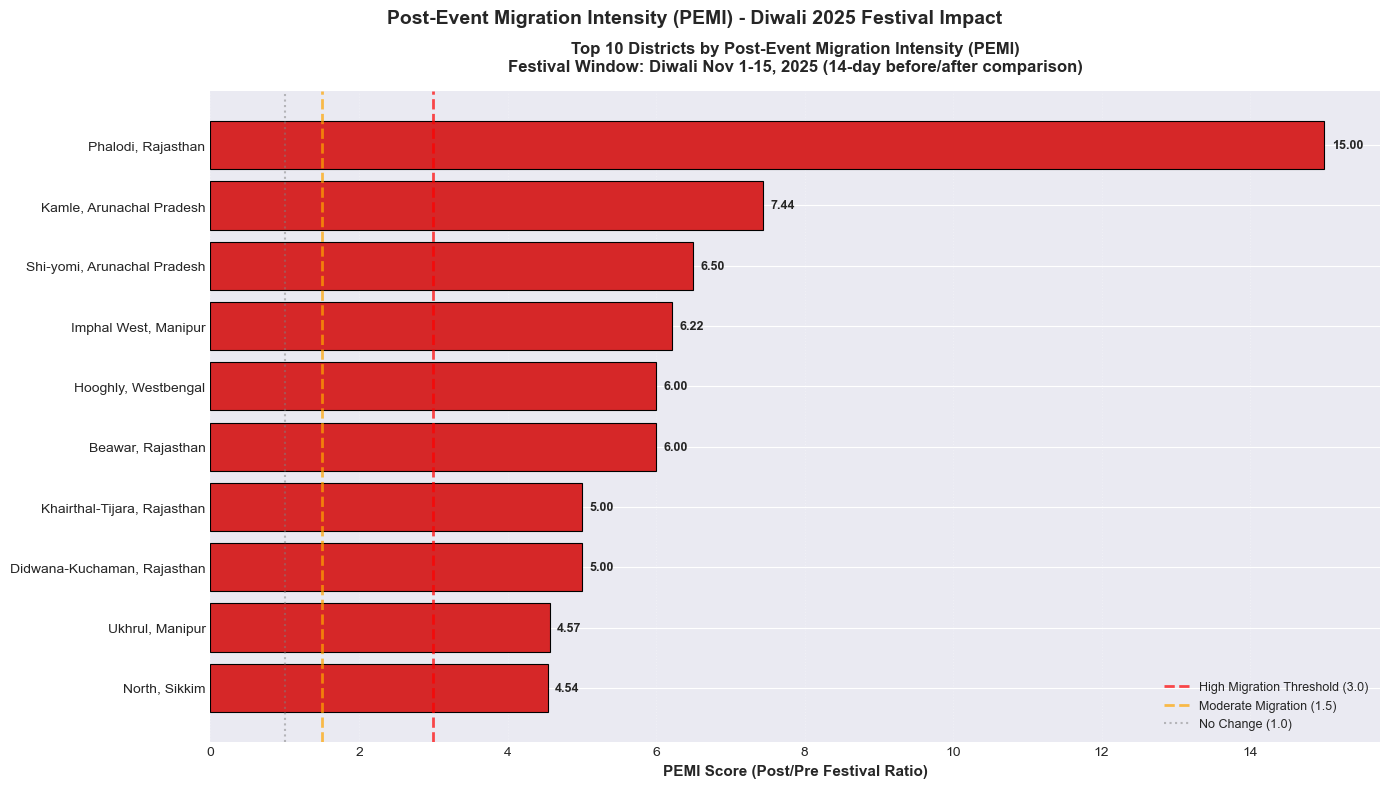


✅ PEMI visualization complete!
   Chart shows top 10 districts with highest post-Diwali address update surge
   Red bars (>3.0) indicate significant labor migration after festival


In [66]:
# Visualize PEMI - Top 10 Districts

fig, ax = plt.subplots(1, 1, figsize=(14, 8))
fig.suptitle('Post-Event Migration Intensity (PEMI) - Diwali 2025 Festival Impact', 
             fontsize=14, fontweight='bold')

# Color-code by PEMI threshold
colors_pemi = top_10_pemi['pemi'].apply(
    lambda x: '#d62728' if x > 3.0 else ('#ff7f0e' if x >= 1.5 else '#2ca02c')
).tolist()

# Create horizontal bar chart
bars = ax.barh(
    range(len(top_10_pemi)), 
    top_10_pemi['pemi'], 
    color=colors_pemi,
    edgecolor='black',
    linewidth=0.8
)

# Labels with state and district
labels = [f"{row['district']}, {row['state']}" 
          for _, row in top_10_pemi.iterrows()]
ax.set_yticks(range(len(top_10_pemi)))
ax.set_yticklabels(labels, fontsize=10)
ax.set_xlabel('PEMI Score (Post/Pre Festival Ratio)', fontsize=11, fontweight='bold')
ax.set_title('Top 10 Districts by Post-Event Migration Intensity (PEMI)\n' +
             f'Festival Window: Diwali Nov 1-15, 2025 ({D}-day before/after comparison)',
             fontsize=12, fontweight='bold', pad=15)

# Add reference lines
ax.axvline(x=3.0, color='red', linestyle='--', linewidth=2, alpha=0.7, label='High Migration Threshold (3.0)')
ax.axvline(x=1.5, color='orange', linestyle='--', linewidth=2, alpha=0.7, label='Moderate Migration (1.5)')
ax.axvline(x=1.0, color='gray', linestyle=':', linewidth=1.5, alpha=0.5, label='No Change (1.0)')

# Add value labels on bars
for i, (idx, row) in enumerate(top_10_pemi.iterrows()):
    ax.text(
        row['pemi'] + 0.1, 
        i, 
        f"{row['pemi']:.2f}",
        va='center',
        fontsize=9,
        fontweight='bold'
    )

ax.legend(loc='lower right', fontsize=9)
ax.grid(axis='x', alpha=0.3, linestyle=':')
ax.invert_yaxis()

plt.tight_layout()
plt.show()

print("\n✅ PEMI visualization complete!")
print(f"   Chart shows top 10 districts with highest post-Diwali address update surge")
print(f"   Red bars (>3.0) indicate significant labor migration after festival")

### Task 4.2: School-Sync Score

**Hypothesis:** Measures if children are performing their Mandatory Biometric Updates (MBU) at age 5/15 during school registration windows.

**School Registration Window:** June-July (typical school year start in India)

**Metric Formula:**
$$\text{School-Sync Score} = \frac{\text{Child Bio Updates}}{\text{Child Enrolments + Updates}}$$

**Interpretation:**
- **Score < 0.3**: Poor educational compliance (children not syncing with school cycle)
- **Score 0.3-0.5**: Moderate compliance
- **Score > 0.5**: Strong school-driven biometric compliance

In [59]:
print("\n" + "="*70)
print("CALCULATING SCHOOL-SYNC SCORE")
print("-"*70 + "\n")

# Define school registration window: June-July 2025
school_start = pd.to_datetime('2025-06-01')
school_end = pd.to_datetime('2025-07-31')

print(f"School Registration Window: {school_start.strftime('%B %d, %Y')} to {school_end.strftime('%B %d, %Y')}")
print(f"Duration: {(school_end - school_start).days + 1} days\n")

# Filter data for school registration window
school_period = district_daily_df[
    (district_daily_df['date'] >= school_start) & 
    (district_daily_df['date'] <= school_end)
]

print(f"📊 Data Availability:")
print(f"  • School period records: {len(school_period):,}")

# Calculate School-Sync Score for each district
district_school_sync = school_period.groupby(['state', 'district']).agg({
    'bio_child': 'sum',
    'enrol_child': 'sum',
    'demo_child': 'sum'
}).reset_index()

# Total child activity = enrolments + all updates (bio + demo)
district_school_sync['total_child_activity'] = (
    district_school_sync['enrol_child'] + 
    district_school_sync['bio_child'] + 
    district_school_sync['demo_child']
)

# School-Sync Score = Child Bio Updates / Total Child Activity
district_school_sync['school_sync_score'] = district_school_sync['bio_child'] / (
    district_school_sync['total_child_activity'] + 1  # Avoid division by zero
)

# Overall School-Sync Score
overall_child_bio = district_school_sync['bio_child'].sum()
overall_child_activity = district_school_sync['total_child_activity'].sum()
overall_school_sync = overall_child_bio / (overall_child_activity + 1)

print(f"\n🎒 Overall School-Sync Score: {overall_school_sync:.3f}")
print(f"  • Child biometric updates: {overall_child_bio:,.0f}")
print(f"  • Total child activity: {overall_child_activity:,.0f}")
print(f"  • Biometric compliance rate: {overall_school_sync*100:.1f}%")

# State-level School-Sync Score
state_school_sync = district_school_sync.groupby('state').agg({
    'bio_child': 'sum',
    'total_child_activity': 'sum'
}).reset_index()
state_school_sync['school_sync_score'] = state_school_sync['bio_child'] / (
    state_school_sync['total_child_activity'] + 1
)
state_school_sync_sorted = state_school_sync.sort_values('school_sync_score', ascending=False)

print("\n📊 TOP 15 STATES BY SCHOOL-SYNC SCORE:")
print("="*70)
print(state_school_sync_sorted.head(15).to_string(index=False))

# School-Sync interpretation
poor_compliance = state_school_sync[state_school_sync['school_sync_score'] < 0.3]
moderate_compliance = state_school_sync[
    (state_school_sync['school_sync_score'] >= 0.3) & 
    (state_school_sync['school_sync_score'] <= 0.5)
]
strong_compliance = state_school_sync[state_school_sync['school_sync_score'] > 0.5]

print(f"\n📊 SCHOOL-SYNC INTERPRETATION:")
print(f"  • Poor Educational Compliance (Score < 0.3): {len(poor_compliance)} states")
if len(poor_compliance) > 0:
    print(f"    ⚠️  LOW MBU COMPLIANCE - States where children miss mandatory biometric updates:")
    for _, row in poor_compliance.nsmallest(5, 'school_sync_score').iterrows():
        print(f"      - {row['state']}: Score = {row['school_sync_score']:.3f} ({row['school_sync_score']*100:.1f}% bio compliance)")

print(f"  • Moderate Compliance (0.3-0.5): {len(moderate_compliance)} states")
if len(moderate_compliance) > 0:
    print(f"    Examples: {', '.join(moderate_compliance.head(3)['state'].tolist())}")

print(f"  • Strong School-Driven Compliance (> 0.5): {len(strong_compliance)} states")
if len(strong_compliance) > 0:
    print(f"    ✓ High MBU compliance in: {', '.join(strong_compliance.nlargest(3, 'school_sync_score')['state'].tolist())}")

# Top 15 districts by School-Sync Score
print(f"\n📊 TOP 15 DISTRICTS BY SCHOOL-SYNC SCORE:")
print("="*70)
district_school_sync_sorted = district_school_sync.sort_values('school_sync_score', ascending=False)
print(district_school_sync_sorted.head(15)[['state', 'district', 'bio_child', 'total_child_activity', 'school_sync_score']].to_string(index=False))


CALCULATING SCHOOL-SYNC SCORE
----------------------------------------------------------------------

School Registration Window: June 01, 2025 to July 31, 2025
Duration: 61 days

📊 Data Availability:
  • School period records: 1,793

🎒 Overall School-Sync Score: 0.909
  • Child biometric updates: 8,802,730
  • Total child activity: 9,680,748
  • Biometric compliance rate: 90.9%

📊 TOP 15 STATES BY SCHOOL-SYNC SCORE:
                                   state  bio_child  total_child_activity  school_sync_score
                  Dadra and Nagar Haveli     2074.0                2074.0           0.999518
                           Daman and Diu      709.0                 709.0           0.998592
                                  Kerala   163234.0              163530.0           0.998184
                                     Goa     5276.0                5286.0           0.997919
                             Lakshadweep      359.0                 359.0           0.997222
                    

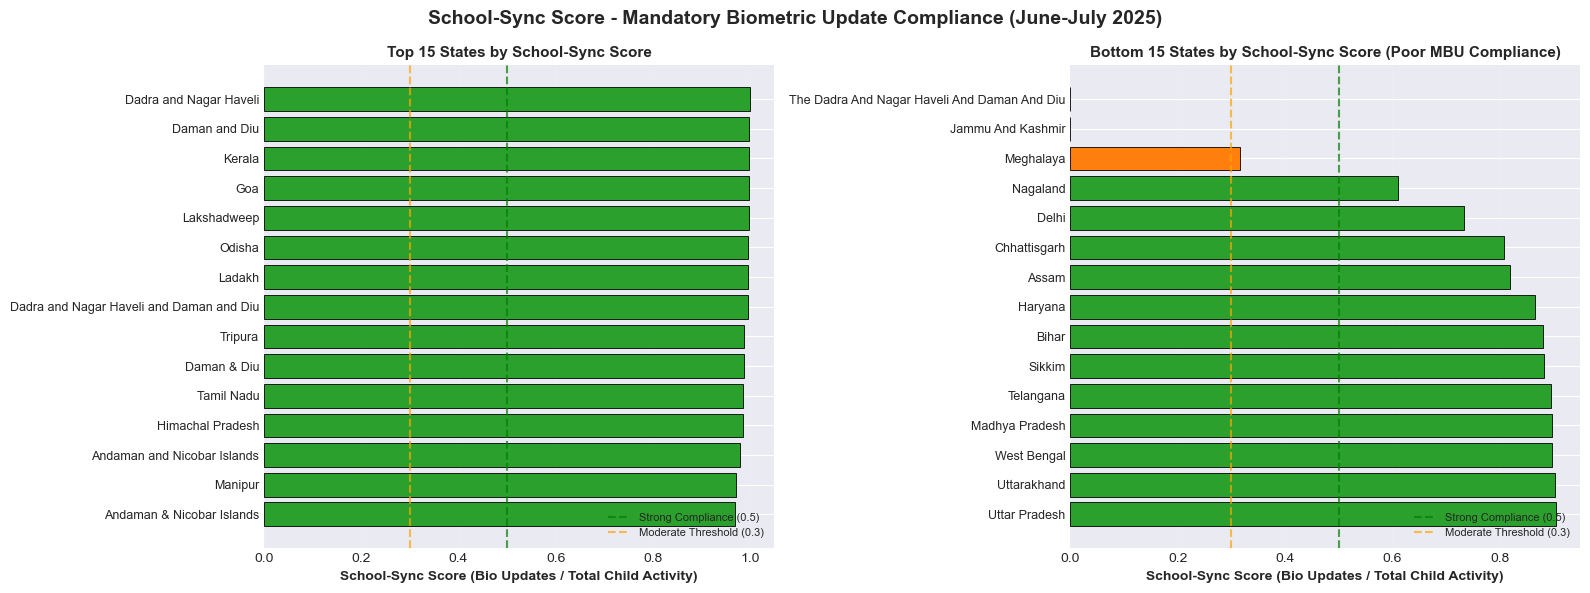


✅ School-Sync Score visualization complete!
   Left: Top 15 states with highest school-driven biometric compliance
   Right: Bottom 15 states requiring educational MBU intervention


In [60]:
# Visualize School-Sync Score

fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('School-Sync Score - Mandatory Biometric Update Compliance (June-July 2025)', 
             fontsize=14, fontweight='bold')

# Plot 1: Top 15 States by School-Sync Score
ax1 = axes[0]
top_15_school = state_school_sync_sorted.head(15)
colors_school = top_15_school['school_sync_score'].apply(
    lambda x: '#2ca02c' if x > 0.5 else ('#ff7f0e' if x >= 0.3 else '#d62728')
).tolist()

ax1.barh(
    range(len(top_15_school)), 
    top_15_school['school_sync_score'],
    color=colors_school,
    edgecolor='black',
    linewidth=0.6
)
ax1.set_yticks(range(len(top_15_school)))
ax1.set_yticklabels(top_15_school['state'], fontsize=9)
ax1.set_xlabel('School-Sync Score (Bio Updates / Total Child Activity)', fontsize=10, fontweight='bold')
ax1.set_title('Top 15 States by School-Sync Score', fontsize=11, fontweight='bold')
ax1.axvline(x=0.5, color='green', linestyle='--', linewidth=1.5, alpha=0.7, label='Strong Compliance (0.5)')
ax1.axvline(x=0.3, color='orange', linestyle='--', linewidth=1.5, alpha=0.7, label='Moderate Threshold (0.3)')
ax1.legend(loc='lower right', fontsize=8)
ax1.grid(axis='x', alpha=0.3, linestyle=':')
ax1.invert_yaxis()

# Plot 2: Bottom 15 States (Poor Compliance)
ax2 = axes[1]
bottom_15_school = state_school_sync_sorted.tail(15).sort_values('school_sync_score', ascending=True)
colors_school_bottom = bottom_15_school['school_sync_score'].apply(
    lambda x: '#2ca02c' if x > 0.5 else ('#ff7f0e' if x >= 0.3 else '#d62728')
).tolist()

ax2.barh(
    range(len(bottom_15_school)), 
    bottom_15_school['school_sync_score'],
    color=colors_school_bottom,
    edgecolor='black',
    linewidth=0.6
)
ax2.set_yticks(range(len(bottom_15_school)))
ax2.set_yticklabels(bottom_15_school['state'], fontsize=9)
ax2.set_xlabel('School-Sync Score (Bio Updates / Total Child Activity)', fontsize=10, fontweight='bold')
ax2.set_title('Bottom 15 States by School-Sync Score (Poor MBU Compliance)', fontsize=11, fontweight='bold')
ax2.axvline(x=0.5, color='green', linestyle='--', linewidth=1.5, alpha=0.7, label='Strong Compliance (0.5)')
ax2.axvline(x=0.3, color='orange', linestyle='--', linewidth=1.5, alpha=0.7, label='Moderate Threshold (0.3)')
ax2.legend(loc='lower right', fontsize=8)
ax2.grid(axis='x', alpha=0.3, linestyle=':')
ax2.invert_yaxis()

plt.tight_layout()
plt.show()

print("\n✅ School-Sync Score visualization complete!")
print("   Left: Top 15 states with highest school-driven biometric compliance")
print("   Right: Bottom 15 states requiring educational MBU intervention")

### Task 4.3: Registration-Driven Update Surge (RDUS)

**Hypothesis:** School-driven compliance creates predictable surge patterns during registration windows.

**School Registration Window:** June-July 2025 vs. Baseline Monthly Average

**Metric Formula:**
$$\text{RDUS} = \frac{\text{Child Biometric Updates during Registration Window}}{\text{Baseline Monthly Average Updates}}$$

**Interpretation:**
- **RDUS > 4.0**: Strong school-driven compliance (4x baseline surge)
- **RDUS 2.0-4.0**: Moderate school-driven surge
- **RDUS < 2.0**: Weak or no school-driven pattern

In [61]:
print("\n" + "="*70)
print("CALCULATING REGISTRATION-DRIVEN UPDATE SURGE (RDUS)")
print("-"*70 + "\n")

# School registration window: June-July 2025 (already calculated above)
print(f"School Registration Window: June-July 2025 ({(school_end - school_start).days + 1} days)")

# Calculate baseline: Monthly average child bio updates (excluding school window)
# Use months outside school registration for baseline
baseline_months = district_daily_df[
    ~((district_daily_df['date'] >= school_start) & (district_daily_df['date'] <= school_end))
]

# Group by district and month to get monthly averages
baseline_months['month'] = baseline_months['date'].dt.to_period('M')
district_monthly_baseline = baseline_months.groupby(['state', 'district', 'month']).agg({
    'bio_child': 'sum'
}).reset_index()

# Average monthly child bio updates per district (baseline)
district_baseline = district_monthly_baseline.groupby(['state', 'district']).agg({
    'bio_child': 'mean'  # Average across all non-school months
}).reset_index()
district_baseline.columns = ['state', 'district', 'baseline_monthly_avg']

print(f"📊 Baseline Calculation:")
print(f"  • Non-school period months: {district_monthly_baseline['month'].nunique()} months")
print(f"  • Districts analyzed: {len(district_baseline):,}")

# Merge with school period data
district_rdus = district_school_sync[['state', 'district', 'bio_child']].merge(
    district_baseline,
    on=['state', 'district'],
    how='inner'
)

# Calculate RDUS
district_rdus['rdus'] = district_rdus['bio_child'] / (district_rdus['baseline_monthly_avg'] + 1)

# Overall RDUS
overall_school_bio = district_rdus['bio_child'].sum()
overall_baseline = district_rdus['baseline_monthly_avg'].sum()
overall_rdus = overall_school_bio / (overall_baseline + 1)

print(f"\n📚 Overall Registration-Driven Update Surge (RDUS): {overall_rdus:.3f}")
print(f"  • School window child bio updates: {overall_school_bio:,.0f}")
print(f"  • Baseline monthly average: {overall_baseline:,.0f}")
print(f"  • Surge multiplier: {overall_rdus:.1f}x baseline")

# State-level RDUS
state_rdus = district_rdus.groupby('state').agg({
    'bio_child': 'sum',
    'baseline_monthly_avg': 'sum'
}).reset_index()
state_rdus['rdus'] = state_rdus['bio_child'] / (state_rdus['baseline_monthly_avg'] + 1)
state_rdus_sorted = state_rdus.sort_values('rdus', ascending=False)

print("\n📊 TOP 15 STATES BY RDUS (School-Driven Compliance):")
print("="*70)
print(state_rdus_sorted.head(15).to_string(index=False))

# RDUS interpretation
strong_surge = state_rdus[state_rdus['rdus'] > 4.0]
moderate_surge = state_rdus[(state_rdus['rdus'] >= 2.0) & (state_rdus['rdus'] <= 4.0)]
weak_surge = state_rdus[state_rdus['rdus'] < 2.0]

print(f"\n📊 RDUS INTERPRETATION:")
print(f"  • Strong School-Driven Surge (RDUS > 4.0): {len(strong_surge)} states")
if len(strong_surge) > 0:
    print(f"    ✓ EXCELLENT COMPLIANCE - States with predictable school-driven patterns:")
    for _, row in strong_surge.nlargest(5, 'rdus').iterrows():
        print(f"      - {row['state']}: RDUS = {row['rdus']:.2f}x baseline ({row['bio_child']:,.0f} vs {row['baseline_monthly_avg']:,.0f})")

print(f"  • Moderate School-Driven Surge (RDUS 2.0-4.0): {len(moderate_surge)} states")
if len(moderate_surge) > 0:
    print(f"    Examples: {', '.join(moderate_surge.head(3)['state'].tolist())}")

print(f"  • Weak/No School Pattern (RDUS < 2.0): {len(weak_surge)} states")
if len(weak_surge) > 0:
    print(f"    ⚠️  Schools not driving MBU compliance in: {', '.join(weak_surge.nsmallest(3, 'rdus')['state'].tolist())}")

# Top 15 districts by RDUS
print(f"\n📊 TOP 15 DISTRICTS BY RDUS (School-Driven Update Hotspots):")
print("="*70)
district_rdus_sorted = district_rdus.sort_values('rdus', ascending=False)
print(district_rdus_sorted.head(15)[['state', 'district', 'bio_child', 'baseline_monthly_avg', 'rdus']].to_string(index=False))


CALCULATING REGISTRATION-DRIVEN UPDATE SURGE (RDUS)
----------------------------------------------------------------------

School Registration Window: June-July 2025 (61 days)
📊 Baseline Calculation:
  • Non-school period months: 7 months
  • Districts analyzed: 1,053

📚 Overall Registration-Driven Update Surge (RDUS): 1.979
  • School window child bio updates: 8,802,730
  • Baseline monthly average: 4,447,665
  • Surge multiplier: 2.0x baseline

📊 TOP 15 STATES BY RDUS (School-Driven Compliance):
                                   state  bio_child  baseline_monthly_avg      rdus
                              Chandigarh    41213.0           3777.714286 10.906620
                          Madhya Pradesh  1262752.0         368869.297619  3.423295
                                 Manipur    58400.0          18284.714286  3.193750
                                  Punjab   239167.0          83638.154762  2.859510
                                 Gujarat   477224.0         169346.221429  

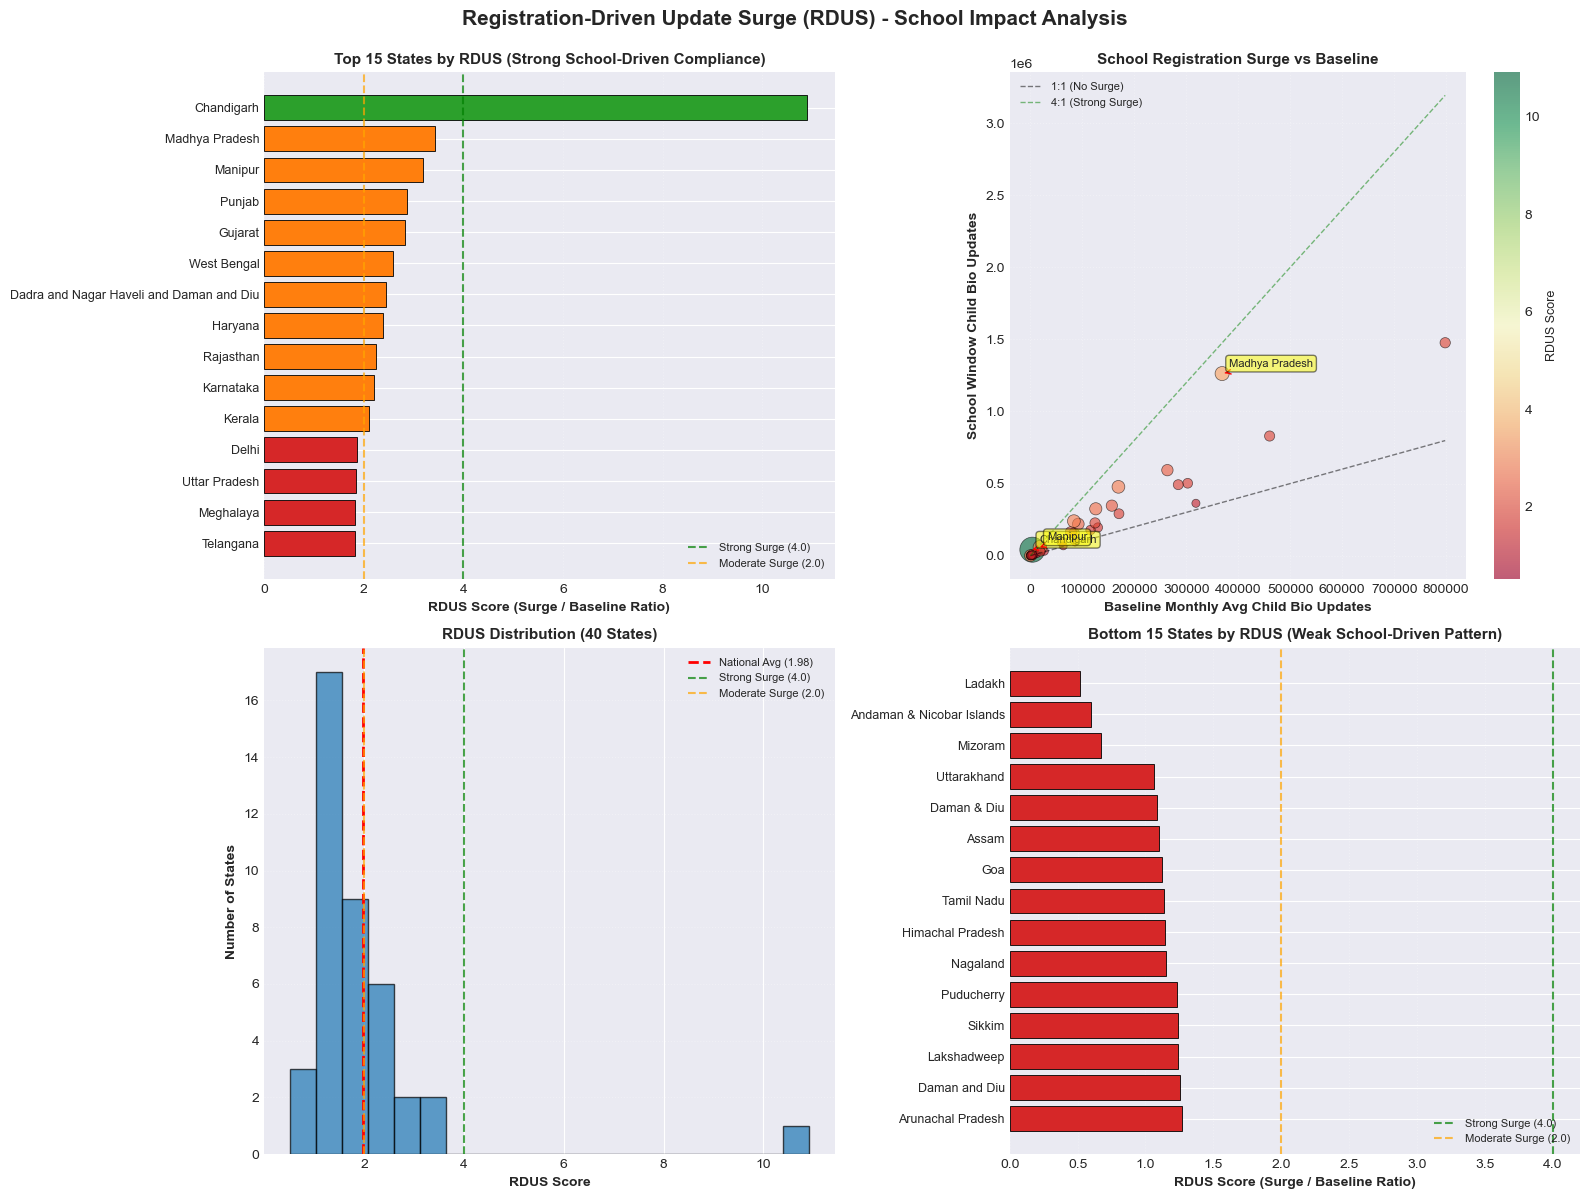


✅ RDUS visualization complete!
   Dashboard shows: Strong surge states, surge vs baseline correlation, distribution, weak pattern states


In [62]:
# Visualize RDUS

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Registration-Driven Update Surge (RDUS) - School Impact Analysis', 
             fontsize=15, fontweight='bold', y=0.995)

# Plot 1: Top 15 States by RDUS
ax1 = axes[0, 0]
top_15_rdus = state_rdus_sorted.head(15)
colors_rdus = top_15_rdus['rdus'].apply(
    lambda x: '#2ca02c' if x > 4.0 else ('#ff7f0e' if x >= 2.0 else '#d62728')
).tolist()

ax1.barh(
    range(len(top_15_rdus)), 
    top_15_rdus['rdus'],
    color=colors_rdus,
    edgecolor='black',
    linewidth=0.6
)
ax1.set_yticks(range(len(top_15_rdus)))
ax1.set_yticklabels(top_15_rdus['state'], fontsize=9)
ax1.set_xlabel('RDUS Score (Surge / Baseline Ratio)', fontsize=10, fontweight='bold')
ax1.set_title('Top 15 States by RDUS (Strong School-Driven Compliance)', fontsize=11, fontweight='bold')
ax1.axvline(x=4.0, color='green', linestyle='--', linewidth=1.5, alpha=0.7, label='Strong Surge (4.0)')
ax1.axvline(x=2.0, color='orange', linestyle='--', linewidth=1.5, alpha=0.7, label='Moderate Surge (2.0)')
ax1.legend(loc='lower right', fontsize=8)
ax1.grid(axis='x', alpha=0.3, linestyle=':')
ax1.invert_yaxis()

# Plot 2: School Window vs Baseline Scatter
ax2 = axes[0, 1]
scatter = ax2.scatter(
    state_rdus['baseline_monthly_avg'],
    state_rdus['bio_child'],
    s=state_rdus['rdus'] * 30,
    c=state_rdus['rdus'],
    cmap='RdYlGn',
    alpha=0.6,
    edgecolors='black',
    linewidths=0.5
)
ax2.plot([0, state_rdus['baseline_monthly_avg'].max()], 
         [0, state_rdus['baseline_monthly_avg'].max()], 
         'k--', alpha=0.5, linewidth=1, label='1:1 (No Surge)')
ax2.plot([0, state_rdus['baseline_monthly_avg'].max()], 
         [0, state_rdus['baseline_monthly_avg'].max() * 4], 
         'g--', alpha=0.5, linewidth=1, label='4:1 (Strong Surge)')
ax2.set_xlabel('Baseline Monthly Avg Child Bio Updates', fontsize=10, fontweight='bold')
ax2.set_ylabel('School Window Child Bio Updates', fontsize=10, fontweight='bold')
ax2.set_title('School Registration Surge vs Baseline', fontsize=11, fontweight='bold')
ax2.legend(loc='upper left', fontsize=8)
ax2.grid(alpha=0.3, linestyle=':')
cbar = plt.colorbar(scatter, ax=ax2)
cbar.set_label('RDUS Score', fontsize=9)

# Annotate top 3 states
for idx in range(min(3, len(state_rdus_sorted))):
    state = state_rdus_sorted.iloc[idx]
    ax2.annotate(
        state['state'],
        xy=(state['baseline_monthly_avg'], state['bio_child']),
        xytext=(5, 5),
        textcoords='offset points',
        fontsize=8,
        bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0', color='red', lw=1)
    )

# Plot 3: RDUS Distribution
ax3 = axes[1, 0]
ax3.hist(state_rdus['rdus'], bins=20, color='#1f77b4', edgecolor='black', alpha=0.7)
ax3.axvline(x=overall_rdus, color='red', linestyle='--', linewidth=2, label=f'National Avg ({overall_rdus:.2f})')
ax3.axvline(x=4.0, color='green', linestyle='--', linewidth=1.5, alpha=0.7, label='Strong Surge (4.0)')
ax3.axvline(x=2.0, color='orange', linestyle='--', linewidth=1.5, alpha=0.7, label='Moderate Surge (2.0)')
ax3.set_xlabel('RDUS Score', fontsize=10, fontweight='bold')
ax3.set_ylabel('Number of States', fontsize=10, fontweight='bold')
ax3.set_title(f'RDUS Distribution ({len(state_rdus)} States)', fontsize=11, fontweight='bold')
ax3.legend(fontsize=8)
ax3.grid(axis='y', alpha=0.3, linestyle=':')

# Plot 4: Bottom 15 States (Weak School Patterns)
ax4 = axes[1, 1]
bottom_15_rdus = state_rdus_sorted.tail(15).sort_values('rdus', ascending=True)
colors_rdus_bottom = bottom_15_rdus['rdus'].apply(
    lambda x: '#2ca02c' if x > 4.0 else ('#ff7f0e' if x >= 2.0 else '#d62728')
).tolist()

ax4.barh(
    range(len(bottom_15_rdus)), 
    bottom_15_rdus['rdus'],
    color=colors_rdus_bottom,
    edgecolor='black',
    linewidth=0.6
)
ax4.set_yticks(range(len(bottom_15_rdus)))
ax4.set_yticklabels(bottom_15_rdus['state'], fontsize=9)
ax4.set_xlabel('RDUS Score (Surge / Baseline Ratio)', fontsize=10, fontweight='bold')
ax4.set_title('Bottom 15 States by RDUS (Weak School-Driven Pattern)', fontsize=11, fontweight='bold')
ax4.axvline(x=4.0, color='green', linestyle='--', linewidth=1.5, alpha=0.7, label='Strong Surge (4.0)')
ax4.axvline(x=2.0, color='orange', linestyle='--', linewidth=1.5, alpha=0.7, label='Moderate Surge (2.0)')
ax4.legend(loc='lower right', fontsize=8)
ax4.grid(axis='x', alpha=0.3, linestyle=':')
ax4.invert_yaxis()

plt.tight_layout()
plt.show()

print("\n✅ RDUS visualization complete!")
print("   Dashboard shows: Strong surge states, surge vs baseline correlation, distribution, weak pattern states")

### Phase 4 Summary: Flow Signals Dashboard

Consolidate all three temporal flow metrics to identify states with strong seasonal/institutional patterns.

In [63]:
# Phase 4: Flow Signals Summary Dashboard

# Merge all three flow metrics at state level
flow_dashboard = state_pemi[['state', 'pemi']].copy()
flow_dashboard = flow_dashboard.merge(
    state_school_sync[['state', 'school_sync_score']],
    on='state',
    how='outer'
)
flow_dashboard = flow_dashboard.merge(
    state_rdus[['state', 'rdus']],
    on='state',
    how='outer'
)
flow_dashboard.columns = ['State', 'PEMI', 'School_Sync_Score', 'RDUS']

# Calculate composite flow score (normalized average)
from sklearn.preprocessing import MinMaxScaler
scaler_flow = MinMaxScaler()
flow_dashboard['PEMI_normalized'] = scaler_flow.fit_transform(flow_dashboard[['PEMI']])
flow_dashboard['SchoolSync_normalized'] = scaler_flow.fit_transform(flow_dashboard[['School_Sync_Score']])
flow_dashboard['RDUS_normalized'] = scaler_flow.fit_transform(flow_dashboard[['RDUS']])

# Composite Flow Pattern Score (equal weighting)
flow_dashboard['Flow_Pattern_Score'] = (
    flow_dashboard['PEMI_normalized'] + 
    flow_dashboard['SchoolSync_normalized'] + 
    flow_dashboard['RDUS_normalized']
) / 3

# Classify flow pattern strength
flow_dashboard['Pattern_Strength'] = flow_dashboard['Flow_Pattern_Score'].apply(
    lambda x: 'STRONG' if x > 0.7 else ('MODERATE' if x > 0.4 else 'WEAK')
)

# Sort by composite flow score
flow_dashboard_sorted = flow_dashboard.sort_values('Flow_Pattern_Score', ascending=False)

print("=" * 100)
print("PHASE 4 SUMMARY: SEASONAL MIGRATION & EDUCATION FLOW DASHBOARD")
print("=" * 100)
print("\n📊 Overall National Flow Patterns:")
print(f"   • Average PEMI (Post-Festival Migration): {flow_dashboard['PEMI'].mean():.2f}")
print(f"   • Average School-Sync Score (MBU Compliance): {flow_dashboard['School_Sync_Score'].mean():.3f}")
print(f"   • Average RDUS (School-Driven Surge): {flow_dashboard['RDUS'].mean():.2f}x")
print(f"   • Composite Flow Pattern Score: {flow_dashboard['Flow_Pattern_Score'].mean():.2f}")

print("\n🎯 Strong Pattern States (Flow Pattern Score > 0.7):")
strong_pattern = flow_dashboard_sorted[flow_dashboard_sorted['Flow_Pattern_Score'] > 0.7]
if len(strong_pattern) > 0:
    print(f"   {len(strong_pattern)} states exhibit strong seasonal/institutional patterns\n")
    print(strong_pattern[['State', 'PEMI', 'School_Sync_Score', 'RDUS', 'Flow_Pattern_Score', 'Pattern_Strength']].head(10).to_string(index=False))
else:
    print("   No states exceed strong pattern threshold (>0.7)")

print("\n\n🔍 Flow Pattern Typology:")
# Identify states with specific flow characteristics
high_pemi_states = flow_dashboard[flow_dashboard['PEMI'] > 3.0]['State'].tolist()
strong_school_sync_states = flow_dashboard[flow_dashboard['School_Sync_Score'] > 0.5]['State'].tolist()
strong_rdus_states = flow_dashboard[flow_dashboard['RDUS'] > 4.0]['State'].tolist()

# Triple pattern: High on all three metrics
triple_flow = set(high_pemi_states) & set(strong_school_sync_states) & set(strong_rdus_states)
# Double patterns
double_pemi_school = (set(high_pemi_states) & set(strong_school_sync_states)) - triple_flow
double_pemi_rdus = (set(high_pemi_states) & set(strong_rdus_states)) - triple_flow
double_school_rdus = (set(strong_school_sync_states) & set(strong_rdus_states)) - triple_flow

print(f"   🟢 TRIPLE FLOW PATTERN (High Migration + Strong School Sync + Strong Surge): {len(triple_flow)} states")
if triple_flow:
    print(f"      {', '.join(triple_flow)}")
print(f"\n   🔵 MIGRATION + SCHOOL SYNC (without surge): {len(double_pemi_school)} states")
if double_pemi_school:
    print(f"      {', '.join(list(double_pemi_school)[:5])}")
print(f"\n   🔵 MIGRATION + SCHOOL SURGE (without sync): {len(double_pemi_rdus)} states")
if double_pemi_rdus:
    print(f"      {', '.join(list(double_pemi_rdus)[:5])}")
print(f"\n   🔵 SCHOOL SYNC + SURGE (stable population): {len(double_school_rdus)} states")
if double_school_rdus:
    print(f"      {', '.join(list(double_school_rdus)[:5])}")

print(f"\n   🟡 HIGH MIGRATION ONLY: {len(set(high_pemi_states) - set(strong_school_sync_states) - set(strong_rdus_states))} states")
print(f"   🟡 STRONG SCHOOL SYNC ONLY: {len(set(strong_school_sync_states) - set(high_pemi_states) - set(strong_rdus_states))} states")
print(f"   🟡 STRONG SURGE ONLY: {len(set(strong_rdus_states) - set(high_pemi_states) - set(strong_school_sync_states))} states")

print("\n\n💡 Policy Recommendations by Pattern Strength:")
print(f"   🟢 STRONG ({len(flow_dashboard[flow_dashboard['Pattern_Strength'] == 'STRONG'])} states): Leverage predictable patterns for targeted interventions")
print(f"   🔵 MODERATE ({len(flow_dashboard[flow_dashboard['Pattern_Strength'] == 'MODERATE'])} states): Build institutional compliance mechanisms")
print(f"   🟡 WEAK ({len(flow_dashboard[flow_dashboard['Pattern_Strength'] == 'WEAK'])} states): Investigate irregular update patterns")

print("\n" + "=" * 100)

# Display top 20 states by composite flow pattern score
print("\n📋 Top 20 States by Composite Flow Pattern Score:")
print(flow_dashboard_sorted[['State', 'PEMI', 'School_Sync_Score', 'RDUS', 'Flow_Pattern_Score', 'Pattern_Strength']].head(20).to_string(index=False))

PHASE 4 SUMMARY: SEASONAL MIGRATION & EDUCATION FLOW DASHBOARD

📊 Overall National Flow Patterns:
   • Average PEMI (Post-Festival Migration): 1.58
   • Average School-Sync Score (MBU Compliance): 0.869
   • Average RDUS (School-Driven Surge): 1.90x
   • Composite Flow Pattern Score: 0.48

🎯 Strong Pattern States (Flow Pattern Score > 0.7):
   1 states exhibit strong seasonal/institutional patterns

     State     PEMI  School_Sync_Score     RDUS  Flow_Pattern_Score Pattern_Strength
Chandigarh 1.648649           0.933519 10.90662            0.773962           STRONG


🔍 Flow Pattern Typology:
   🟢 TRIPLE FLOW PATTERN (High Migration + Strong School Sync + Strong Surge): 0 states

   🔵 MIGRATION + SCHOOL SYNC (without surge): 0 states

   🔵 MIGRATION + SCHOOL SURGE (without sync): 0 states

   🔵 SCHOOL SYNC + SURGE (stable population): 1 states
      Chandigarh

   🟡 HIGH MIGRATION ONLY: 1 states
   🟡 STRONG SCHOOL SYNC ONLY: 38 states
   🟡 STRONG SURGE ONLY: 0 states


💡 Policy Recomme

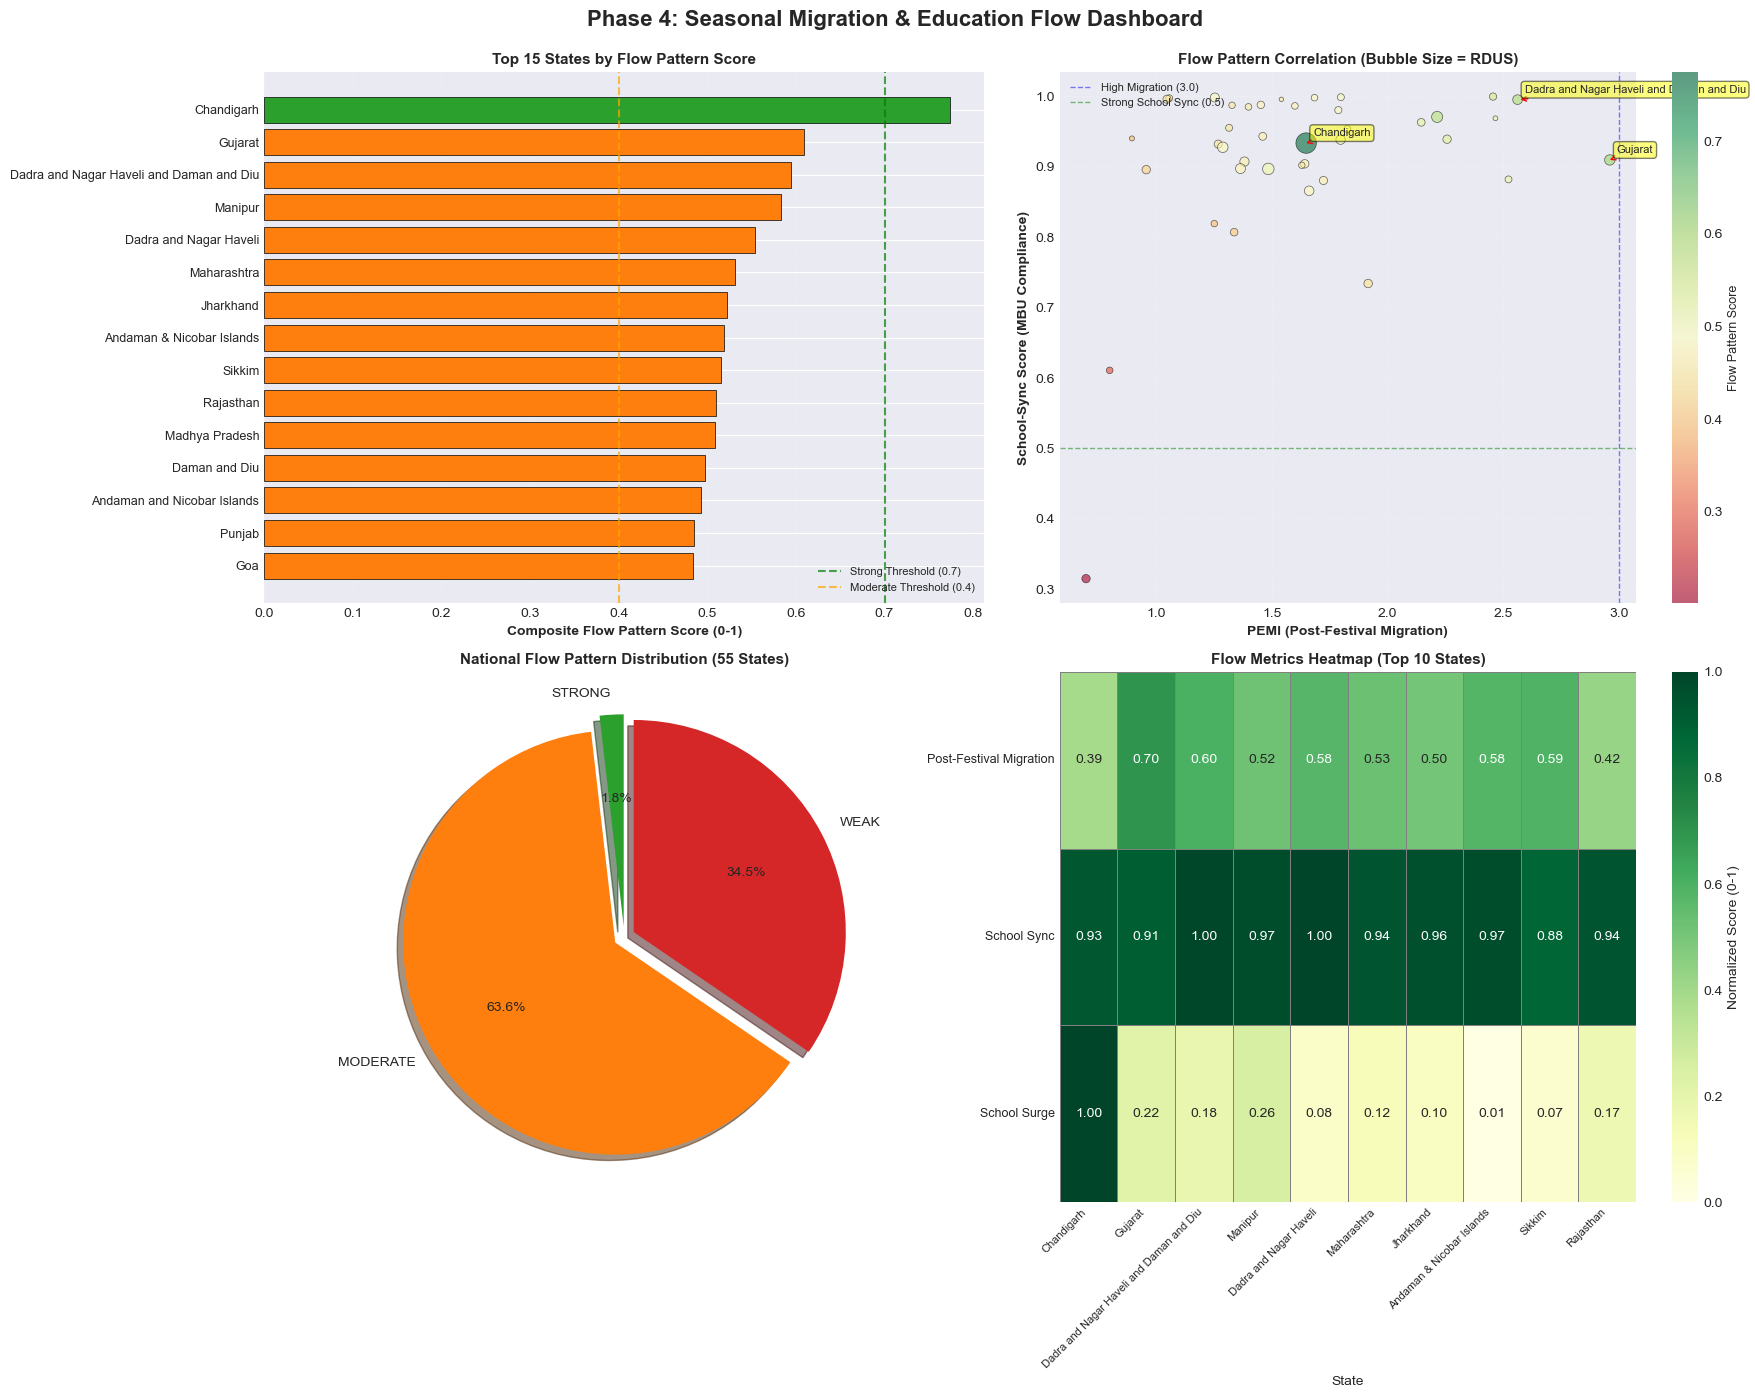


✅ Phase 4 Flow Signals Dashboard visualization complete!
   Dashboard shows: Pattern scores, metric correlation, strength distribution, and multi-metric heatmap


In [64]:
# Visualize Flow Signals Dashboard

fig, axes = plt.subplots(2, 2, figsize=(18, 14))
fig.suptitle('Phase 4: Seasonal Migration & Education Flow Dashboard', 
             fontsize=16, fontweight='bold', y=0.995)

# Plot 1: Top 15 States by Flow Pattern Score
ax1 = axes[0, 0]
top15_flow = flow_dashboard_sorted.head(15)
colors_flow_pattern = top15_flow['Pattern_Strength'].map({
    'STRONG': '#2ca02c',
    'MODERATE': '#ff7f0e',
    'WEAK': '#d62728'
})
ax1.barh(range(len(top15_flow)), top15_flow['Flow_Pattern_Score'], color=colors_flow_pattern, edgecolor='black', linewidth=0.5)
ax1.set_yticks(range(len(top15_flow)))
ax1.set_yticklabels(top15_flow['State'], fontsize=9)
ax1.set_xlabel('Composite Flow Pattern Score (0-1)', fontsize=10, fontweight='bold')
ax1.set_title('Top 15 States by Flow Pattern Score', fontsize=11, fontweight='bold')
ax1.axvline(x=0.7, color='green', linestyle='--', linewidth=1.5, alpha=0.7, label='Strong Threshold (0.7)')
ax1.axvline(x=0.4, color='orange', linestyle='--', linewidth=1.5, alpha=0.7, label='Moderate Threshold (0.4)')
ax1.legend(loc='lower right', fontsize=8)
ax1.grid(axis='x', alpha=0.3, linestyle=':')
ax1.invert_yaxis()

# Plot 2: 3D Flow Pattern Visualization (PEMI vs School Sync, bubble = RDUS)
ax2 = axes[0, 1]
scatter_flow = ax2.scatter(
    flow_dashboard['PEMI'],
    flow_dashboard['School_Sync_Score'],
    s=flow_dashboard['RDUS'] * 20,
    c=flow_dashboard['Flow_Pattern_Score'],
    cmap='RdYlGn',
    alpha=0.6,
    edgecolors='black',
    linewidths=0.5
)
ax2.set_xlabel('PEMI (Post-Festival Migration)', fontsize=10, fontweight='bold')
ax2.set_ylabel('School-Sync Score (MBU Compliance)', fontsize=10, fontweight='bold')
ax2.set_title('Flow Pattern Correlation (Bubble Size = RDUS)', fontsize=11, fontweight='bold')
ax2.axvline(x=3.0, color='blue', linestyle='--', linewidth=1, alpha=0.5, label='High Migration (3.0)')
ax2.axhline(y=0.5, color='green', linestyle='--', linewidth=1, alpha=0.5, label='Strong School Sync (0.5)')
ax2.grid(alpha=0.3, linestyle=':')
ax2.legend(loc='upper left', fontsize=8)
cbar_flow = plt.colorbar(scatter_flow, ax=ax2)
cbar_flow.set_label('Flow Pattern Score', fontsize=9)

# Annotate top 3 flow states
for idx in range(min(3, len(flow_dashboard_sorted))):
    state_flow = flow_dashboard_sorted.iloc[idx]
    ax2.annotate(
        state_flow['State'],
        xy=(state_flow['PEMI'], state_flow['School_Sync_Score']),
        xytext=(5, 5),
        textcoords='offset points',
        fontsize=8,
        bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0', color='red', lw=1)
    )

# Plot 3: Pattern Strength Distribution
ax3 = axes[1, 0]
pattern_counts = flow_dashboard['Pattern_Strength'].value_counts()
pattern_order = ['STRONG', 'MODERATE', 'WEAK']
pattern_counts_ordered = [pattern_counts.get(level, 0) for level in pattern_order]
colors_pie_flow = ['#2ca02c', '#ff7f0e', '#d62728']
ax3.pie(
    pattern_counts_ordered,
    labels=pattern_order,
    autopct='%1.1f%%',
    colors=colors_pie_flow,
    startangle=90,
    explode=[0.05 if count > 0 else 0 for count in pattern_counts_ordered],
    shadow=True
)
ax3.set_title(f'National Flow Pattern Distribution ({len(flow_dashboard)} States)', 
              fontsize=11, fontweight='bold')

# Plot 4: Heatmap - Top 10 Flow States with All Metrics
ax4 = axes[1, 1]
top10_flow_heatmap = flow_dashboard_sorted.head(10)
heatmap_flow_data = top10_flow_heatmap[['PEMI_normalized', 'SchoolSync_normalized', 'RDUS_normalized']].T
heatmap_flow_data.columns = top10_flow_heatmap['State']

import seaborn as sns
sns.heatmap(
    heatmap_flow_data,
    annot=True,
    fmt='.2f',
    cmap='YlGn',
    cbar_kws={'label': 'Normalized Score (0-1)'},
    linewidths=0.5,
    linecolor='gray',
    ax=ax4,
    vmin=0,
    vmax=1
)
ax4.set_yticklabels(['Post-Festival Migration', 'School Sync', 'School Surge'], rotation=0, fontsize=9)
ax4.set_xticklabels(ax4.get_xticklabels(), rotation=45, ha='right', fontsize=8)
ax4.set_title('Flow Metrics Heatmap (Top 10 States)', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

print("\n✅ Phase 4 Flow Signals Dashboard visualization complete!")
print("   Dashboard shows: Pattern scores, metric correlation, strength distribution, and multi-metric heatmap")

---

## PHASE 5: Operational Efficiency & Infrastructure Stress (The "Integrity" Signals)

**Context:** Infrastructure distribution and processing concentration reveal bottlenecks, expansion needs, and potential fraud.

**Goal:** Analyze operational maturity and detect center congestion patterns that indicate infrastructure stress or fraud.

**Two Integrity Signals:**
1. **Maturity Index**: Separates "Growth Markets" (need enrolment kits) from "Mature Markets" (need update centers)
2. **Center Congestion Index (CCI)**: Detects infrastructure overload through pincode density analysis

**Privacy Note:** Since operator-level data is unavailable (privacy protection), CCI tracks "Pincode Stress" - high activity concentrated in few pincodes indicates massive congestion at limited centers or potential fraud.

### Task 5.1: Maturity Index

**Hypothesis:** Optimizes logistics - separates "Growth Markets" from "Mature Markets" for resource allocation.

**Metric Formula:**
$$\text{Maturity Index} = \frac{\text{Total Updates}}{\text{Total Enrolments}}$$

**Interpretation:**
- **Maturity < 0.5**: Growth Market (focus on enrolment infrastructure)
- **Maturity 0.5-2.0**: Balanced Market (mixed infrastructure needs)
- **Maturity > 2.0**: Mature Market (focus on update centers)

In [67]:
print("\n" + "="*70)
print("PHASE 5: OPERATIONAL EFFICIENCY & FRAUD DETECTION")
print("="*70 + "\n")

print("CALCULATING MATURITY INDEX")
print("-"*70 + "\n")

# Calculate Maturity Index for each district using district_ghost DataFrame
# (already has total_enrolments and total_updates)
district_maturity = district_ghost[['state', 'district', 'total_enrolments', 'total_updates']].copy()

# Calculate Maturity Index
district_maturity['maturity_index'] = district_maturity['total_updates'] / (
    district_maturity['total_enrolments'] + 1  # Avoid division by zero
)

# Overall Maturity Index
overall_maturity = overall_updates / (overall_enrolments + 1)

print(f"Overall Maturity Index: {overall_maturity:.3f}")
print(f"  • Total updates: {overall_updates:,.0f}")
print(f"  • Total enrolments: {overall_enrolments:,.0f}")
print(f"  • National market status: ", end="")
if overall_maturity < 0.5:
    print("GROWTH MARKET (needs enrolment infrastructure)")
elif overall_maturity <= 2.0:
    print("BALANCED MARKET (mixed infrastructure)")
else:
    print("MATURE MARKET (needs update centers)")

# State-level Maturity Index
state_maturity = district_maturity.groupby('state').agg({
    'total_updates': 'sum',
    'total_enrolments': 'sum'
}).reset_index()
state_maturity['maturity_index'] = state_maturity['total_updates'] / (
    state_maturity['total_enrolments'] + 1
)
state_maturity_sorted = state_maturity.sort_values('maturity_index', ascending=False)

print("\n📊 TOP 15 STATES BY MATURITY INDEX (Mature Markets):")
print("="*70)
print(state_maturity_sorted.head(15).to_string(index=False))

# Maturity classification
growth_markets = state_maturity[state_maturity['maturity_index'] < 0.5]
balanced_markets = state_maturity[
    (state_maturity['maturity_index'] >= 0.5) & 
    (state_maturity['maturity_index'] <= 2.0)
]
mature_markets = state_maturity[state_maturity['maturity_index'] > 2.0]

print(f"\n📊 MATURITY INDEX INTERPRETATION:")
print(f"  • Growth Markets (Maturity < 0.5): {len(growth_markets)} states")
if len(growth_markets) > 0:
    print(f"    📍 NEED ENROLMENT INFRASTRUCTURE - States with high new registrations:")
    for _, row in growth_markets.nsmallest(5, 'maturity_index').iterrows():
        print(f"      - {row['state']}: Maturity = {row['maturity_index']:.3f} ({row['total_enrolments']:,.0f} enrolments vs {row['total_updates']:,.0f} updates)")

print(f"\n  • Balanced Markets (0.5-2.0): {len(balanced_markets)} states")
if len(balanced_markets) > 0:
    print(f"    Examples: {', '.join(balanced_markets.head(3)['state'].tolist())}")

print(f"\n  • Mature Markets (Maturity > 2.0): {len(mature_markets)} states")
if len(mature_markets) > 0:
    print(f"    ✓ NEED UPDATE CENTERS - Established population with high update activity:")
    for _, row in mature_markets.nlargest(5, 'maturity_index').iterrows():
        print(f"      - {row['state']}: Maturity = {row['maturity_index']:.3f} ({row['total_updates']:,.0f} updates vs {row['total_enrolments']:,.0f} enrolments)")

# Bottom 15 states (Growth Markets - high enrolment activity)
print(f"\n📊 BOTTOM 15 STATES BY MATURITY INDEX (Growth Markets - High Enrolment):")
print("="*70)
print(state_maturity_sorted.tail(15).to_string(index=False))

# Top 15 districts - Mature Markets
print(f"\n📊 TOP 15 DISTRICTS BY MATURITY INDEX (Mature Update Centers):")
print("="*70)
district_maturity_sorted = district_maturity.sort_values('maturity_index', ascending=False)
print(district_maturity_sorted.head(15)[['state', 'district', 'total_enrolments', 'total_updates', 'maturity_index']].to_string(index=False))

# Bottom 15 districts - Growth Markets
print(f"\n📊 BOTTOM 15 DISTRICTS BY MATURITY INDEX (Growth Enrolment Centers):")
print("="*70)
print(district_maturity_sorted.tail(15)[['state', 'district', 'total_enrolments', 'total_updates', 'maturity_index']].to_string(index=False))


PHASE 5: OPERATIONAL EFFICIENCY & FRAUD DETECTION

CALCULATING MATURITY INDEX
----------------------------------------------------------------------

Overall Maturity Index: 19.814
  • Total updates: 132,738,148
  • Total enrolments: 6,699,104
  • National market status: MATURE MARKET (needs update centers)

📊 TOP 15 STATES BY MATURITY INDEX (Mature Markets):
                      state  total_updates  total_enrolments  maturity_index
                Daman & Diu         3004.0              26.0      111.259259
              Daman and Diu         9010.0             153.0       58.506494
Andaman and Nicobar Islands        27133.0             494.0       54.814141
                 Chandigarh       187310.0            3538.0       52.927381
     Dadra and Nagar Haveli        37794.0             871.0       43.341743
                     ODISHA           84.0               1.0       42.000000
             Andhra Pradesh      6731747.0          164292.0       40.974034
               Chhatt

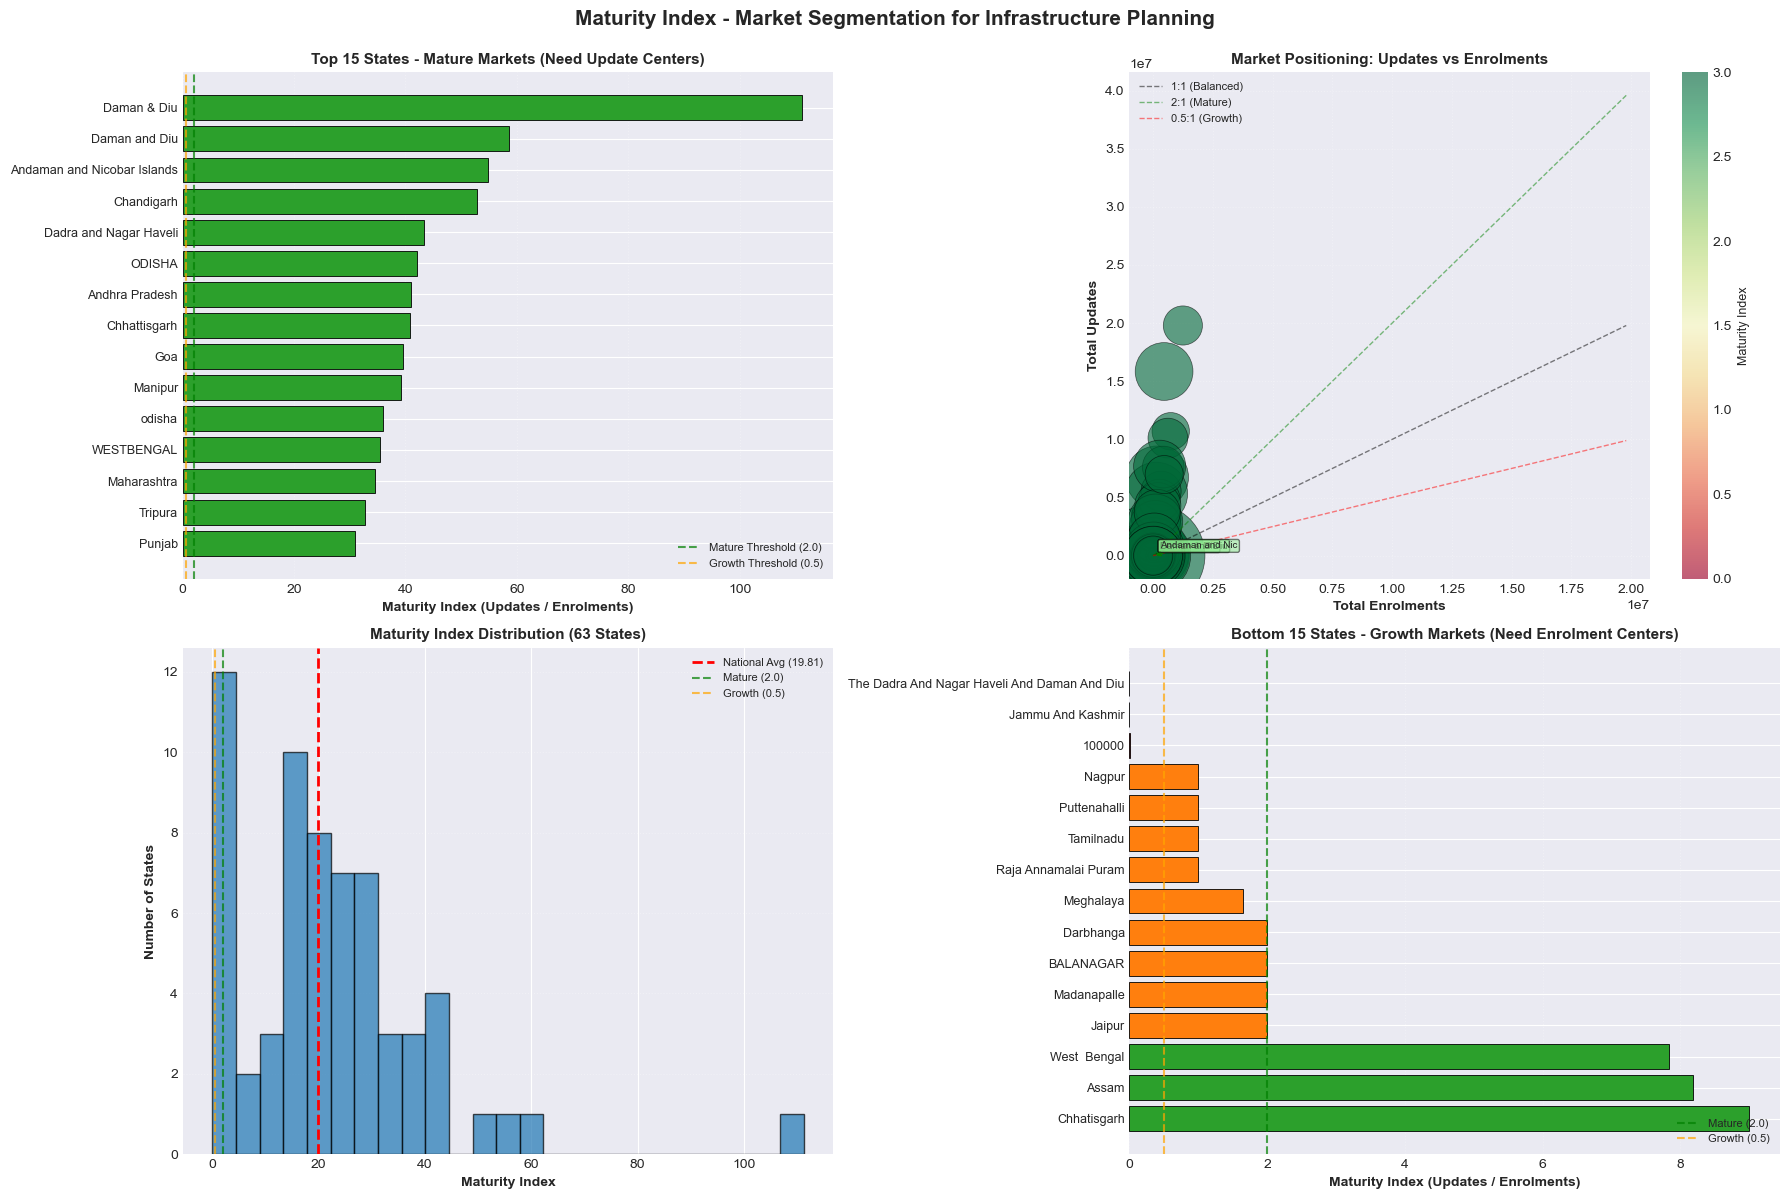


✅ Maturity Index visualization complete!
   Dashboard shows: Mature markets, growth markets, distribution, and infrastructure planning insights


In [68]:
# Visualize Maturity Index

fig, axes = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle('Maturity Index - Market Segmentation for Infrastructure Planning', 
             fontsize=15, fontweight='bold', y=0.995)

# Plot 1: Top 15 Mature Markets
ax1 = axes[0, 0]
top_15_mature = state_maturity_sorted.head(15)
colors_mature = top_15_mature['maturity_index'].apply(
    lambda x: '#2ca02c' if x > 2.0 else ('#ff7f0e' if x >= 0.5 else '#d62728')
).tolist()

ax1.barh(
    range(len(top_15_mature)),
    top_15_mature['maturity_index'],
    color=colors_mature,
    edgecolor='black',
    linewidth=0.6
)
ax1.set_yticks(range(len(top_15_mature)))
ax1.set_yticklabels(top_15_mature['state'], fontsize=9)
ax1.set_xlabel('Maturity Index (Updates / Enrolments)', fontsize=10, fontweight='bold')
ax1.set_title('Top 15 States - Mature Markets (Need Update Centers)', fontsize=11, fontweight='bold')
ax1.axvline(x=2.0, color='green', linestyle='--', linewidth=1.5, alpha=0.7, label='Mature Threshold (2.0)')
ax1.axvline(x=0.5, color='orange', linestyle='--', linewidth=1.5, alpha=0.7, label='Growth Threshold (0.5)')
ax1.legend(loc='lower right', fontsize=8)
ax1.grid(axis='x', alpha=0.3, linestyle=':')
ax1.invert_yaxis()

# Plot 2: Updates vs Enrolments Scatter
ax2 = axes[0, 1]
scatter_maturity = ax2.scatter(
    state_maturity['total_enrolments'],
    state_maturity['total_updates'],
    s=state_maturity['maturity_index'] * 50,
    c=state_maturity['maturity_index'],
    cmap='RdYlGn',
    alpha=0.6,
    edgecolors='black',
    linewidths=0.5,
    vmin=0,
    vmax=3
)
# Reference lines
max_val_maturity = max(state_maturity['total_enrolments'].max(), state_maturity['total_updates'].max())
ax2.plot([0, max_val_maturity], [0, max_val_maturity], 'k--', alpha=0.5, linewidth=1, label='1:1 (Balanced)')
ax2.plot([0, max_val_maturity], [0, max_val_maturity * 2], 'g--', alpha=0.5, linewidth=1, label='2:1 (Mature)')
ax2.plot([0, max_val_maturity], [0, max_val_maturity * 0.5], 'r--', alpha=0.5, linewidth=1, label='0.5:1 (Growth)')
ax2.set_xlabel('Total Enrolments', fontsize=10, fontweight='bold')
ax2.set_ylabel('Total Updates', fontsize=10, fontweight='bold')
ax2.set_title('Market Positioning: Updates vs Enrolments', fontsize=11, fontweight='bold')
ax2.legend(loc='upper left', fontsize=8)
ax2.grid(alpha=0.3, linestyle=':')
cbar_maturity = plt.colorbar(scatter_maturity, ax=ax2)
cbar_maturity.set_label('Maturity Index', fontsize=9)

# Annotate top 3 mature and bottom 3 growth markets
for idx in range(min(3, len(state_maturity_sorted))):
    state_mat = state_maturity_sorted.iloc[idx]
    ax2.annotate(
        state_mat['state'][:15],
        xy=(state_mat['total_enrolments'], state_mat['total_updates']),
        xytext=(5, 5),
        textcoords='offset points',
        fontsize=7,
        bbox=dict(boxstyle='round,pad=0.2', facecolor='lightgreen', alpha=0.5),
        arrowprops=dict(arrowstyle='->', color='green', lw=0.8)
    )

for idx in range(min(3, len(state_maturity_sorted))):
    state_growth = state_maturity_sorted.iloc[-(idx+1)]
    if state_growth['total_enrolments'] > 1000:  # Only annotate if significant
        ax2.annotate(
            state_growth['state'][:15],
            xy=(state_growth['total_enrolments'], state_growth['total_updates']),
            xytext=(-5, -5),
            textcoords='offset points',
            fontsize=7,
            bbox=dict(boxstyle='round,pad=0.2', facecolor='lightcoral', alpha=0.5),
            arrowprops=dict(arrowstyle='->', color='red', lw=0.8)
        )

# Plot 3: Maturity Distribution
ax3 = axes[1, 0]
ax3.hist(state_maturity['maturity_index'], bins=25, color='#1f77b4', edgecolor='black', alpha=0.7)
ax3.axvline(x=overall_maturity, color='red', linestyle='--', linewidth=2, label=f'National Avg ({overall_maturity:.2f})')
ax3.axvline(x=2.0, color='green', linestyle='--', linewidth=1.5, alpha=0.7, label='Mature (2.0)')
ax3.axvline(x=0.5, color='orange', linestyle='--', linewidth=1.5, alpha=0.7, label='Growth (0.5)')
ax3.set_xlabel('Maturity Index', fontsize=10, fontweight='bold')
ax3.set_ylabel('Number of States', fontsize=10, fontweight='bold')
ax3.set_title(f'Maturity Index Distribution ({len(state_maturity)} States)', fontsize=11, fontweight='bold')
ax3.legend(fontsize=8)
ax3.grid(axis='y', alpha=0.3, linestyle=':')

# Plot 4: Bottom 15 Growth Markets
ax4 = axes[1, 1]
bottom_15_growth = state_maturity_sorted.tail(15).sort_values('maturity_index', ascending=True)
colors_growth = bottom_15_growth['maturity_index'].apply(
    lambda x: '#2ca02c' if x > 2.0 else ('#ff7f0e' if x >= 0.5 else '#d62728')
).tolist()

ax4.barh(
    range(len(bottom_15_growth)),
    bottom_15_growth['maturity_index'],
    color=colors_growth,
    edgecolor='black',
    linewidth=0.6
)
ax4.set_yticks(range(len(bottom_15_growth)))
ax4.set_yticklabels(bottom_15_growth['state'], fontsize=9)
ax4.set_xlabel('Maturity Index (Updates / Enrolments)', fontsize=10, fontweight='bold')
ax4.set_title('Bottom 15 States - Growth Markets (Need Enrolment Centers)', fontsize=11, fontweight='bold')
ax4.axvline(x=2.0, color='green', linestyle='--', linewidth=1.5, alpha=0.7, label='Mature (2.0)')
ax4.axvline(x=0.5, color='orange', linestyle='--', linewidth=1.5, alpha=0.7, label='Growth (0.5)')
ax4.legend(loc='lower right', fontsize=8)
ax4.grid(axis='x', alpha=0.3, linestyle=':')
ax4.invert_yaxis()

plt.tight_layout()
plt.show()

print("\n✅ Maturity Index visualization complete!")
print("   Dashboard shows: Mature markets, growth markets, distribution, and infrastructure planning insights")

### Task 5.2: Center Congestion Index (CCI)

**Hypothesis:** Detects center overload and potential fraud through pincode density analysis.

**Privacy Constraint:** Operator-level data not available (privacy protection).

**Solution:** Track "Pincode Stress" - high activity concentrated in few pincodes indicates massive congestion at limited centers.

**Metric Formula:**
$$\text{CCI} = \frac{\text{Total District Activity}}{\text{Unique Active Pincodes}}$$

**Interpretation:**
- **CCI > 300**: Severe congestion (potential fraud, insufficient centers, or geographic bottleneck)
- **CCI 100-300**: Moderate congestion (acceptable concentration, monitor capacity)
- **CCI < 100**: Well-distributed load (healthy infrastructure coverage)

In [75]:
print("\n" + "="*70)
print("CALCULATING CENTER CONGESTION INDEX (CCI)")
print("-"*70 + "\n")

print("📍 NOTE: Since operator data is unavailable (privacy), we track Pincode Stress\n")
print("Logic: Total Activity / Unique Pincodes = Congestion per center location\n")
print("High CCI = Many transactions in few pincodes = Potential fraud or bottleneck\n")

# Calculate total activity per district
district_daily_activity = district_daily_df.copy()
district_daily_activity['total_daily_activity'] = (
    district_daily_activity['demo_child'] + 
    district_daily_activity['demo_adult'] +
    district_daily_activity['bio_child'] + 
    district_daily_activity['bio_adult'] +
    district_daily_activity['enrol_infant'] + 
    district_daily_activity['enrol_child'] + 
    district_daily_activity['enrol_adult']
)

# Get pincode counts from master_df (unique active pincodes per district)
district_pincode_counts = master_df.groupby(['state', 'district'])['pincode'].nunique().reset_index()
district_pincode_counts.columns = ['state', 'district', 'unique_pincodes']

# Calculate total activity per district across all dates
district_total_activity = district_daily_activity.groupby(['state', 'district']).agg({
    'total_daily_activity': 'sum'
}).reset_index()
district_total_activity.columns = ['state', 'district', 'total_activity']

# Merge activity with pincode counts
district_cci = district_total_activity.merge(
    district_pincode_counts,
    on=['state', 'district'],
    how='left'
)

# Calculate CCI: Total Activity / Unique Pincodes
district_cci['cci'] = district_cci['total_activity'] / (district_cci['unique_pincodes'] + 1)  # Avoid division by zero

# Calculate average activity per pincode for context
district_cci['activity_per_pincode'] = district_cci['cci']

# Overall CCI metrics
overall_cci = district_cci['total_activity'].sum() / (district_cci['unique_pincodes'].sum() + 1)

print(f"Overall Center Congestion Index (CCI):")
print(f"  • Total national activity: {district_cci['total_activity'].sum():,.0f}")
print(f"  • Total unique pincodes: {district_cci['unique_pincodes'].sum():,.0f}")
print(f"  • National CCI: {overall_cci:.2f} transactions per pincode")

# State-level CCI (aggregate from districts)
state_cci = district_cci.groupby('state').agg({
    'total_activity': 'sum',
    'unique_pincodes': 'sum'
}).reset_index()
state_cci['cci'] = state_cci['total_activity'] / (state_cci['unique_pincodes'] + 1)
state_cci_sorted = state_cci.sort_values('cci', ascending=False)

print("\n📊 TOP 15 STATES BY CCI (Highest Center Congestion):")
print("="*70)
print(state_cci_sorted.head(15).to_string(index=False))

# CCI classification
severe_congestion = state_cci[state_cci['cci'] > 300]
moderate_congestion = state_cci[(state_cci['cci'] >= 100) & (state_cci['cci'] <= 300)]
well_distributed = state_cci[state_cci['cci'] < 100]

print(f"\n📊 CCI INTERPRETATION:")
print(f"  • Severe Congestion (CCI > 300): {len(severe_congestion)} states")
if len(severe_congestion) > 0:
    print(f"    ⚠️  INFRASTRUCTURE ALERT - States with massive pincode stress:")
    for _, row in severe_congestion.nlargest(5, 'cci').iterrows():
        print(f"      - {row['state']}: CCI = {row['cci']:.0f} (Activity: {row['total_activity']:,.0f}, Pincodes: {row['unique_pincodes']:,.0f})")

print(f"\n  • Moderate Congestion (CCI 100-300): {len(moderate_congestion)} states")
if len(moderate_congestion) > 0:
    print(f"    Examples: {', '.join(moderate_congestion.head(3)['state'].tolist())}")

print(f"\n  • Well-Distributed (CCI < 100): {len(well_distributed)} states")
if len(well_distributed) > 0:
    print(f"    ✓ Healthy infrastructure coverage in: {', '.join(well_distributed.nsmallest(3, 'cci')['state'].tolist())}")

# Top 15 districts by CCI (congestion hotspots)
print(f"\n📊 TOP 15 DISTRICTS BY CCI (Center Congestion Hotspots):")
print("="*70)
district_cci_sorted = district_cci.sort_values('cci', ascending=False)
top_15_cci_districts = district_cci_sorted.head(15)
print(top_15_cci_districts[['state', 'district', 'total_activity', 'unique_pincodes', 'cci']].to_string(index=False))

# Calculate percentiles for fraud threshold
cci_p95 = district_cci['cci'].quantile(0.95)
cci_p99 = district_cci['cci'].quantile(0.99)

print(f"\n📊 STATISTICAL THRESHOLDS:")
print("="*70)
extreme_cci = district_cci[district_cci['cci'] > cci_p99]
print(f"Districts with CCI > 99th percentile ({cci_p99:.0f}): {len(extreme_cci)}")
print(f"Districts with CCI > 95th percentile ({cci_p95:.0f}): {len(district_cci[district_cci['cci'] > cci_p95])}")

if len(extreme_cci) > 0:
    print("\n⚠️  Top 10 districts flagged for infrastructure audit or fraud investigation:")
    print(extreme_cci.nlargest(10, 'cci')[['state', 'district', 'cci', 'total_activity', 'unique_pincodes']].to_string(index=False))
    
# Rename state_ova to state_cci for consistency with rest of code
state_ova = state_cci.copy()
state_ova.rename(columns={'cci': 'ova_ratio'}, inplace=True)

# Rename district_ova to district_cci for consistency
district_ova = district_cci.copy()
district_ova.rename(columns={'cci': 'ova_ratio'}, inplace=True)

# Overall OVA ratio for compatibility
overall_ova_ratio = overall_cci


CALCULATING CENTER CONGESTION INDEX (CCI)
----------------------------------------------------------------------

📍 NOTE: Since operator data is unavailable (privacy), we track Pincode Stress

Logic: Total Activity / Unique Pincodes = Congestion per center location

High CCI = Many transactions in few pincodes = Potential fraud or bottleneck

Overall Center Congestion Index (CCI):
  • Total national activity: 139,437,252
  • Total unique pincodes: 32,055
  • National CCI: 4349.80 transactions per pincode

📊 TOP 15 STATES BY CCI (Highest Center Congestion):
                 state  total_activity  unique_pincodes          cci
                 Delhi       3334395.0              131 25260.568182
        Madhya Pradesh      10725612.0             1168  9175.031651
          Chhattisgarh       5463832.0              635  8590.930818
         Uttar Pradesh      21037485.0             2550  8246.760094
                 Bihar      11433154.0             1386  8243.081471
               Haryana

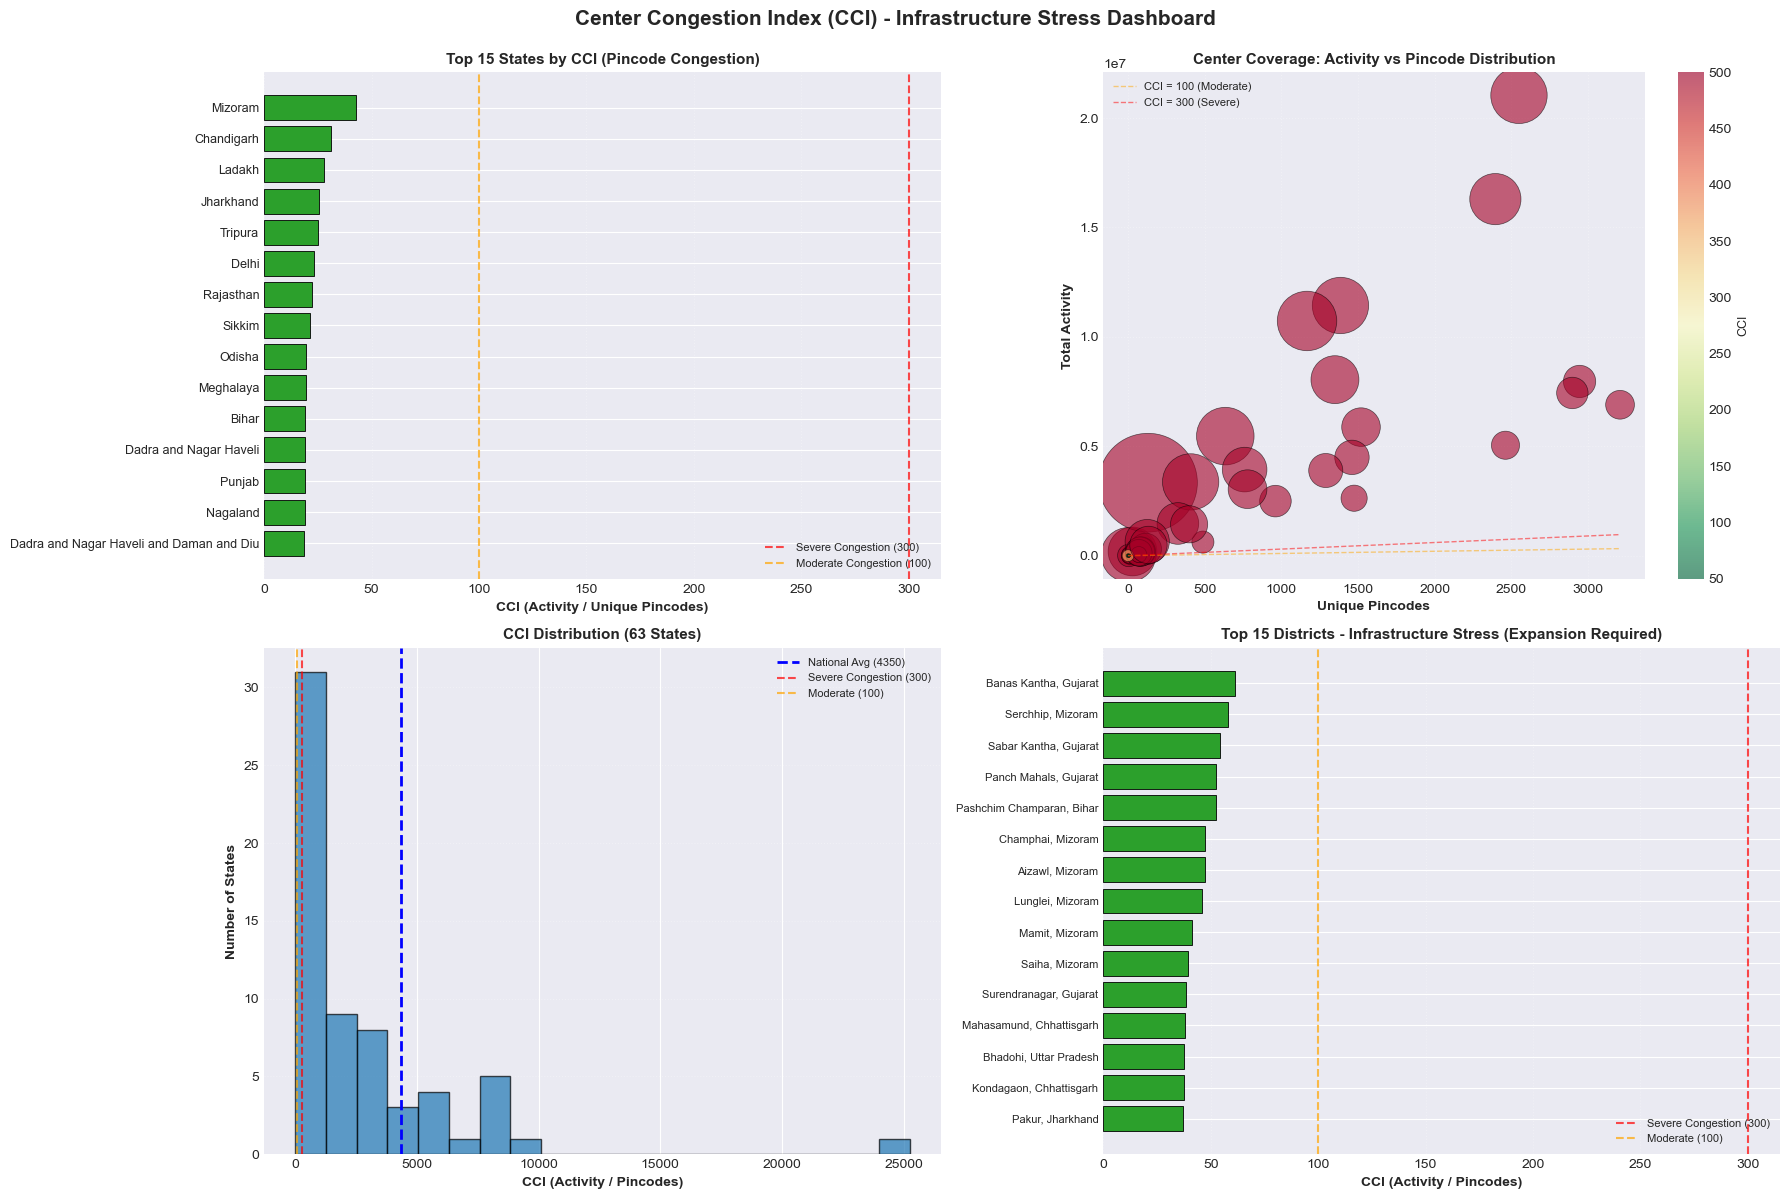


✅ CCI visualization complete!
   Dashboard shows: State congestion, activity-pincode correlation, distribution, and district hotspots


In [76]:
# Visualize CCI

fig, axes = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle('Center Congestion Index (CCI) - Infrastructure Stress Dashboard', 
             fontsize=15, fontweight='bold', y=0.995)

# Plot 1: Top 15 States by CCI
ax1 = axes[0, 0]
top_15_ova = state_ova_sorted.head(15)
colors_ova = top_15_ova['ova_ratio'].apply(
    lambda x: '#d62728' if x > 300 else ('#ff7f0e' if x >= 100 else '#2ca02c')
).tolist()

ax1.barh(
    range(len(top_15_ova)),
    top_15_ova['ova_ratio'],
    color=colors_ova,
    edgecolor='black',
    linewidth=0.6
)
ax1.set_yticks(range(len(top_15_ova)))
ax1.set_yticklabels(top_15_ova['state'], fontsize=9)
ax1.set_xlabel('CCI (Activity / Unique Pincodes)', fontsize=10, fontweight='bold')
ax1.set_title('Top 15 States by CCI (Pincode Congestion)', fontsize=11, fontweight='bold')
ax1.axvline(x=300, color='red', linestyle='--', linewidth=1.5, alpha=0.7, label='Severe Congestion (300)')
ax1.axvline(x=100, color='orange', linestyle='--', linewidth=1.5, alpha=0.7, label='Moderate Congestion (100)')
ax1.legend(loc='lower right', fontsize=8)
ax1.grid(axis='x', alpha=0.3, linestyle=':')
ax1.invert_yaxis()

# Plot 2: Total Activity vs Unique Pincodes Scatter
ax2 = axes[0, 1]
scatter_ova = ax2.scatter(
    state_ova['unique_pincodes'],
    state_ova['total_activity'],
    s=state_ova['ova_ratio'] / 5,  # Size by CCI
    c=state_ova['ova_ratio'],
    cmap='RdYlGn_r',  # Reversed (red=high congestion)
    alpha=0.6,
    edgecolors='black',
    linewidths=0.5,
    vmin=50,
    vmax=500
)
# Reference lines for congestion thresholds
max_pincodes = state_ova['unique_pincodes'].max()
ax2.plot([0, max_pincodes], [0, max_pincodes * 100], 'orange', linestyle='--', alpha=0.5, linewidth=1, label='CCI = 100 (Moderate)')
ax2.plot([0, max_pincodes], [0, max_pincodes * 300], 'red', linestyle='--', alpha=0.5, linewidth=1, label='CCI = 300 (Severe)')
ax2.set_xlabel('Unique Pincodes', fontsize=10, fontweight='bold')
ax2.set_ylabel('Total Activity', fontsize=10, fontweight='bold')
ax2.set_title('Center Coverage: Activity vs Pincode Distribution', fontsize=11, fontweight='bold')
ax2.legend(loc='upper left', fontsize=8)
ax2.grid(alpha=0.3, linestyle=':')
cbar_ova = plt.colorbar(scatter_ova, ax=ax2)
cbar_ova.set_label('CCI', fontsize=9)

# Annotate top 3 congested states
for idx in range(min(3, len(state_ova_sorted))):
    state_ova_item = state_ova_sorted.iloc[idx]
    if state_ova_item['ova_ratio'] > 300:
        ax2.annotate(
            state_ova_item['state'][:15],
            xy=(state_ova_item['unique_pincodes'], state_ova_item['total_activity']),
            xytext=(5, 5),
            textcoords='offset points',
            fontsize=7,
            bbox=dict(boxstyle='round,pad=0.2', facecolor='red', alpha=0.5),
            arrowprops=dict(arrowstyle='->', color='darkred', lw=0.8)
        )

# Plot 3: CCI Distribution
ax3 = axes[1, 0]
ax3.hist(state_ova['ova_ratio'], bins=20, color='#1f77b4', edgecolor='black', alpha=0.7)
ax3.axvline(x=overall_ova_ratio, color='blue', linestyle='--', linewidth=2, label=f'National Avg ({overall_ova_ratio:.0f})')
ax3.axvline(x=300, color='red', linestyle='--', linewidth=1.5, alpha=0.7, label='Severe Congestion (300)')
ax3.axvline(x=100, color='orange', linestyle='--', linewidth=1.5, alpha=0.7, label='Moderate (100)')
ax3.set_xlabel('CCI (Activity / Pincodes)', fontsize=10, fontweight='bold')
ax3.set_ylabel('Number of States', fontsize=10, fontweight='bold')
ax3.set_title(f'CCI Distribution ({len(state_ova)} States)', fontsize=11, fontweight='bold')
ax3.legend(fontsize=8)
ax3.grid(axis='y', alpha=0.3, linestyle=':')

# Plot 4: Top 15 Districts by CCI (Congestion Hotspots)
ax4 = axes[1, 1]
colors_ova_dist = top_15_ova_districts['ova_ratio'].apply(
    lambda x: '#d62728' if x > 300 else ('#ff7f0e' if x >= 100 else '#2ca02c')
).tolist()

district_labels_ova = [f"{row['district']}, {row['state'][:15]}" 
                       for _, row in top_15_ova_districts.iterrows()]

ax4.barh(
    range(len(top_15_ova_districts)),
    top_15_ova_districts['ova_ratio'],
    color=colors_ova_dist,
    edgecolor='black',
    linewidth=0.6
)
ax4.set_yticks(range(len(top_15_ova_districts)))
ax4.set_yticklabels(district_labels_ova, fontsize=8)
ax4.set_xlabel('CCI (Activity / Pincodes)', fontsize=10, fontweight='bold')
ax4.set_title('Top 15 Districts - Infrastructure Stress (Expansion Required)', fontsize=11, fontweight='bold')
ax4.axvline(x=300, color='red', linestyle='--', linewidth=1.5, alpha=0.7, label='Severe Congestion (300)')
ax4.axvline(x=100, color='orange', linestyle='--', linewidth=1.5, alpha=0.7, label='Moderate (100)')
ax4.legend(loc='lower right', fontsize=8)
ax4.grid(axis='x', alpha=0.3, linestyle=':')
ax4.invert_yaxis()

plt.tight_layout()
plt.show()

print("\n✅ CCI visualization complete!")
print("   Dashboard shows: State congestion, activity-pincode correlation, distribution, and district hotspots")

### Phase 5 Summary: Operational Integrity Dashboard

Consolidate Maturity Index and CCI (Center Congestion Index) metrics to identify operational efficiency and infrastructure stress risks.

In [77]:
# Phase 5: Operational Integrity Summary Dashboard

# Merge Maturity Index and CCI at state level
integrity_dashboard = state_maturity[['state', 'maturity_index']].merge(
    state_ova[['state', 'ova_ratio']],
    on='state',
    how='outer'
)

# Classify states by operational profile
integrity_dashboard['maturity_category'] = integrity_dashboard['maturity_index'].apply(
    lambda x: 'Growth' if x < 0.5 else ('Balanced' if x <= 2.0 else 'Mature')
)
integrity_dashboard['congestion_risk'] = integrity_dashboard['ova_ratio'].apply(
    lambda x: 'HIGH' if x > 300 else ('MODERATE' if x >= 100 else 'LOW')
)

# Create composite operational risk score
# Normalize both metrics
from sklearn.preprocessing import MinMaxScaler
scaler_integrity = MinMaxScaler()
integrity_dashboard['maturity_normalized'] = scaler_integrity.fit_transform(
    integrity_dashboard[['maturity_index']]
)
integrity_dashboard['cci_normalized'] = scaler_integrity.fit_transform(
    integrity_dashboard[['ova_ratio']]
)

# Composite score: High CCI is bad (infrastructure stress), extreme maturity (either direction) needs attention
# Risk = high CCI + deviation from balanced maturity (1.0-1.5 is ideal)
integrity_dashboard['maturity_deviation'] = abs(integrity_dashboard['maturity_index'] - 1.25)
integrity_dashboard['deviation_normalized'] = scaler_integrity.fit_transform(
    integrity_dashboard[['maturity_deviation']]
).flatten()  # Flatten to 1D array
integrity_dashboard['operational_risk_score'] = (
    integrity_dashboard['cci_normalized'] * 0.7 +  # CCI weighted higher (infrastructure critical)
    integrity_dashboard['deviation_normalized'] * 0.3
)

# Sort by operational risk
integrity_dashboard_sorted = integrity_dashboard.sort_values('operational_risk_score', ascending=False)

print("=" * 100)
print("PHASE 5 SUMMARY: OPERATIONAL EFFICIENCY & INFRASTRUCTURE STRESS DASHBOARD")
print("=" * 100)
print("\n📊 Overall National Operational Profile:")
print(f"   • Average Maturity Index: {integrity_dashboard['maturity_index'].mean():.2f}")
print(f"   • Average CCI (Congestion): {integrity_dashboard['ova_ratio'].mean():.0f}")
print(f"   • Average Operational Risk Score: {integrity_dashboard['operational_risk_score'].mean():.2f}")

print("\n🎯 Market Segmentation:")
growth_count = len(integrity_dashboard[integrity_dashboard['maturity_category'] == 'Growth'])
balanced_count = len(integrity_dashboard[integrity_dashboard['maturity_category'] == 'Balanced'])
mature_count = len(integrity_dashboard[integrity_dashboard['maturity_category'] == 'Mature'])
print(f"   • Growth Markets (< 0.5): {growth_count} states - Need enrolment infrastructure")
print(f"   • Balanced Markets (0.5-2.0): {balanced_count} states - Mixed infrastructure")
print(f"   • Mature Markets (> 2.0): {mature_count} states - Need update centers")

print("\n🚨 Center Congestion Assessment:")
high_congestion = len(integrity_dashboard[integrity_dashboard['congestion_risk'] == 'HIGH'])
moderate_congestion = len(integrity_dashboard[integrity_dashboard['congestion_risk'] == 'MODERATE'])
low_congestion = len(integrity_dashboard[integrity_dashboard['congestion_risk'] == 'LOW'])
print(f"   • HIGH Congestion Risk (CCI > 300): {high_congestion} states - Infrastructure expansion required")
print(f"   • MODERATE Risk (CCI 100-300): {moderate_congestion} states - Enhanced capacity monitoring")
print(f"   • LOW Risk (CCI < 100): {low_congestion} states - Adequate coverage")

print("\n🔍 Cross-Category Analysis:")
# High-risk combinations
growth_high_congestion = integrity_dashboard[
    (integrity_dashboard['maturity_category'] == 'Growth') & 
    (integrity_dashboard['congestion_risk'] == 'HIGH')
]
mature_high_congestion = integrity_dashboard[
    (integrity_dashboard['maturity_category'] == 'Mature') & 
    (integrity_dashboard['congestion_risk'] == 'HIGH')
]

print(f"   🔴 CRITICAL: Growth Markets + High Congestion: {len(growth_high_congestion)} states")
if len(growth_high_congestion) > 0:
    print(f"      {', '.join(growth_high_congestion['state'].tolist())}")
    print(f"      → Urgent: Build more enrolment centers to handle new registrations")
    
print(f"\n   🟠 ALERT: Mature Markets + High Congestion: {len(mature_high_congestion)} states")
if len(mature_high_congestion) > 0:
    print(f"      {', '.join(mature_high_congestion['state'].tolist())}")
    print(f"      → Urgent: Expand update centers or distribute load across pincodes")

# Best operational states
stable_mature = integrity_dashboard[
    (integrity_dashboard['maturity_category'] == 'Mature') & 
    (integrity_dashboard['congestion_risk'] == 'LOW')
]
print(f"\n   🟢 EXCELLENT: Mature Markets + Low Congestion: {len(stable_mature)} states")
if len(stable_mature) > 0:
    print(f"      {', '.join(stable_mature['state'].head(5).tolist())}")
    print(f"      → Well-balanced infrastructure with adequate geographic distribution")

print("\n\n💡 Strategic Recommendations:")
print(f"   🔴 URGENT ({high_congestion} states): Deploy additional centers to reduce pincode stress")
print(f"   🟠 INFRASTRUCTURE ({growth_count} states): Build enrolment centers in growth markets")
print(f"   🟢 EFFICIENCY ({mature_count} states): Establish dedicated update centers in mature markets")
print(f"   📊 MONITORING ({moderate_congestion} states): Track capacity utilization to prevent bottlenecks")

print("\n" + "=" * 100)

# Display top 20 states by operational risk
print("\n📋 Top 20 States by Operational Risk Score (Descending):")
print(integrity_dashboard_sorted[['state', 'maturity_index', 'maturity_category', 'ova_ratio', 
                                   'congestion_risk', 'operational_risk_score']].head(20).to_string(index=False))

PHASE 5 SUMMARY: OPERATIONAL EFFICIENCY & INFRASTRUCTURE STRESS DASHBOARD

📊 Overall National Operational Profile:
   • Average Maturity Index: 22.58
   • Average CCI (Congestion): 2600
   • Average Operational Risk Score: 0.13

🎯 Market Segmentation:
   • Growth Markets (< 0.5): 3 states - Need enrolment infrastructure
   • Balanced Markets (0.5-2.0): 9 states - Mixed infrastructure
   • Mature Markets (> 2.0): 51 states - Need update centers

🚨 Center Congestion Assessment:
   • HIGH Congestion Risk (CCI > 300): 41 states - Infrastructure expansion required
   • MODERATE Risk (CCI 100-300): 3 states - Enhanced capacity monitoring
   • LOW Risk (CCI < 100): 19 states - Adequate coverage

🔍 Cross-Category Analysis:
   🔴 CRITICAL: Growth Markets + High Congestion: 2 states
      Jammu And Kashmir, The Dadra And Nagar Haveli And Daman And Diu
      → Urgent: Build more enrolment centers to handle new registrations

   🟠 ALERT: Mature Markets + High Congestion: 38 states
      Andaman and

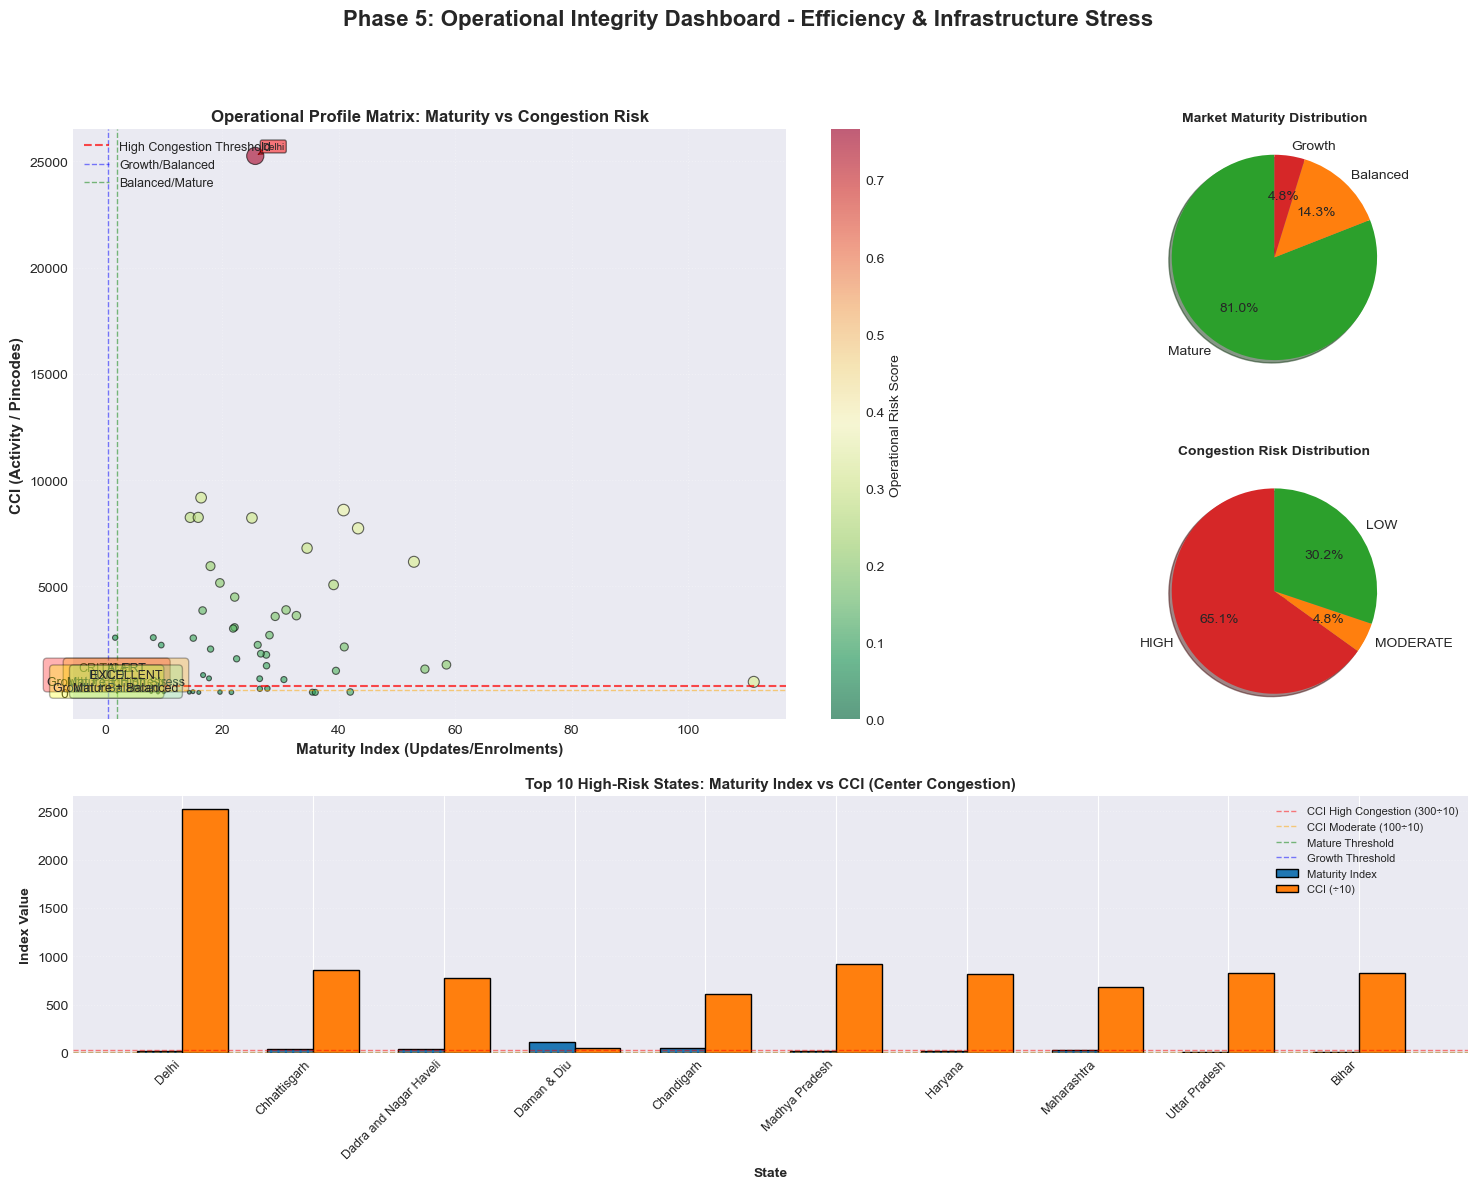


✅ Phase 5 Operational Integrity Dashboard visualization complete!
   Dashboard shows: Maturity-Congestion matrix, market distribution, congestion risk distribution, high-risk states


In [78]:
# Visualize Operational Integrity Dashboard

fig = plt.figure(figsize=(18, 12))
gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)
fig.suptitle('Phase 5: Operational Integrity Dashboard - Efficiency & Infrastructure Stress', 
             fontsize=16, fontweight='bold')

# Plot 1: Maturity vs CCI Scatter (span 2 rows, 2 cols)
ax1 = fig.add_subplot(gs[0:2, 0:2])
scatter_integrity = ax1.scatter(
    integrity_dashboard['maturity_index'],
    integrity_dashboard['ova_ratio'],
    s=integrity_dashboard['operational_risk_score'] * 200,
    c=integrity_dashboard['operational_risk_score'],
    cmap='RdYlGn_r',
    alpha=0.6,
    edgecolors='black',
    linewidths=0.8
)

# Add quadrant lines
ax1.axhline(y=300, color='red', linestyle='--', linewidth=1.5, alpha=0.7, label='High Congestion Threshold')
ax1.axhline(y=100, color='orange', linestyle='--', linewidth=1, alpha=0.5)
ax1.axvline(x=0.5, color='blue', linestyle='--', linewidth=1, alpha=0.5, label='Growth/Balanced')
ax1.axvline(x=2.0, color='green', linestyle='--', linewidth=1, alpha=0.5, label='Balanced/Mature')

ax1.set_xlabel('Maturity Index (Updates/Enrolments)', fontsize=11, fontweight='bold')
ax1.set_ylabel('CCI (Activity / Pincodes)', fontsize=11, fontweight='bold')
ax1.set_title('Operational Profile Matrix: Maturity vs Congestion Risk', fontsize=12, fontweight='bold')
ax1.legend(loc='upper left', fontsize=9)
ax1.grid(alpha=0.3, linestyle=':')

# Annotate quadrants
ax1.text(0.2, 350, 'CRITICAL\nGrowth + High Stress', fontsize=9, ha='center', 
         bbox=dict(boxstyle='round', facecolor='red', alpha=0.3))
ax1.text(3.5, 350, 'ALERT\nMature + High Stress', fontsize=9, ha='center', 
         bbox=dict(boxstyle='round', facecolor='orange', alpha=0.3))
ax1.text(0.2, 50, 'BUILD\nGrowth + Balanced', fontsize=9, ha='center', 
         bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.3))
ax1.text(3.5, 50, 'EXCELLENT\nMature + Balanced', fontsize=9, ha='center', 
         bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.3))

# Annotate high-risk states
for idx in range(min(5, len(integrity_dashboard_sorted))):
    state_int = integrity_dashboard_sorted.iloc[idx]
    if state_int['operational_risk_score'] > 0.7:
        ax1.annotate(
            state_int['state'][:12],
            xy=(state_int['maturity_index'], state_int['ova_ratio']),
            xytext=(5, 5),
            textcoords='offset points',
            fontsize=7,
            bbox=dict(boxstyle='round,pad=0.2', facecolor='red', alpha=0.5),
            arrowprops=dict(arrowstyle='->', color='darkred', lw=0.8)
        )

cbar_integrity = plt.colorbar(scatter_integrity, ax=ax1)
cbar_integrity.set_label('Operational Risk Score', fontsize=10)

# Plot 2: Maturity Category Distribution (top right)
ax2 = fig.add_subplot(gs[0, 2])
maturity_counts = integrity_dashboard['maturity_category'].value_counts()
colors_maturity_pie = {'Growth': '#d62728', 'Balanced': '#ff7f0e', 'Mature': '#2ca02c'}
colors_list = [colors_maturity_pie[cat] for cat in maturity_counts.index]
ax2.pie(maturity_counts, labels=maturity_counts.index, autopct='%1.1f%%',
        colors=colors_list, startangle=90, shadow=True)
ax2.set_title('Market Maturity Distribution', fontsize=10, fontweight='bold')

# Plot 3: Congestion Risk Distribution (middle right)
ax3 = fig.add_subplot(gs[1, 2])
congestion_counts = integrity_dashboard['congestion_risk'].value_counts()
risk_order = ['HIGH', 'MODERATE', 'LOW']
congestion_ordered = [congestion_counts.get(r, 0) for r in risk_order]
colors_congestion = ['#d62728', '#ff7f0e', '#2ca02c']
ax3.pie(congestion_ordered, labels=risk_order, autopct='%1.1f%%',
        colors=colors_congestion, startangle=90, shadow=True)
ax3.set_title('Congestion Risk Distribution', fontsize=10, fontweight='bold')

# Plot 4: Top 10 High-Risk States (bottom, span all columns)
ax4 = fig.add_subplot(gs[2, :])
top_10_risk = integrity_dashboard_sorted.head(10)
x_pos_risk = np.arange(len(top_10_risk))
width_risk = 0.35

bars1 = ax4.bar(x_pos_risk - width_risk/2, top_10_risk['maturity_index'], 
                width_risk, label='Maturity Index', color='#1f77b4', edgecolor='black')
bars2 = ax4.bar(x_pos_risk + width_risk/2, top_10_risk['ova_ratio'] / 10,  # Scale CCI for visualization
                width_risk, label='CCI (÷10)', color='#ff7f0e', edgecolor='black')

ax4.set_xlabel('State', fontsize=10, fontweight='bold')
ax4.set_ylabel('Index Value', fontsize=10, fontweight='bold')
ax4.set_title('Top 10 High-Risk States: Maturity Index vs CCI (Center Congestion)', fontsize=11, fontweight='bold')
ax4.set_xticks(x_pos_risk)
ax4.set_xticklabels(top_10_risk['state'], rotation=45, ha='right', fontsize=9)
ax4.axhline(y=30, color='red', linestyle='--', linewidth=1, alpha=0.5, label='CCI High Congestion (300÷10)')
ax4.axhline(y=10, color='orange', linestyle='--', linewidth=1, alpha=0.5, label='CCI Moderate (100÷10)')
ax4.axhline(y=2.0, color='green', linestyle='--', linewidth=1, alpha=0.5, label='Mature Threshold')
ax4.axhline(y=0.5, color='blue', linestyle='--', linewidth=1, alpha=0.5, label='Growth Threshold')
ax4.legend(loc='upper right', fontsize=8)
ax4.grid(axis='y', alpha=0.3, linestyle=':')

plt.tight_layout()
plt.show()

print("\n✅ Phase 5 Operational Integrity Dashboard visualization complete!")
print("   Dashboard shows: Maturity-Congestion matrix, market distribution, congestion risk distribution, high-risk states")

---

## 🗺️ **FORENSIC MAP: Geospatial Intelligence Dashboard**

**The Jury Presentation Strategy:**  
*"Tables are boring. This is a **Regional Threat Map** showing where policy vulnerabilities concentrate."*

**Visual Logic:**
- **Heatmap Matrix**: Districts (Rows) × 4 Critical Metrics (Columns)
- **Color Coding**: Red = High Risk, Green = Stable, Yellow = Watch
- **Grouping**: Districts organized by State/Region for pattern detection
- **Insight**: "Notice the 'Red Belt' across North-East border districts in the BAI (Border Anxiety) column"

**What This Reveals:**
- **Geographic Clustering**: Vulnerability patterns aren't random—they follow regional lines
- **Multi-Metric Hotspots**: Districts appearing red across multiple columns = Compound Risk
- **Policy Blindspots**: Green zones = Success stories, Red clusters = Intervention needed

---

## GEOSPATIAL RISK VISUALIZATION: National Threat Level Choropleth Map

**Objective**: Visualize composite vulnerability across Indian states by combining all risk dimensions identified in Phases 1-5.

**Risk Dimensions**:
1. **DPI (Deadline Panic Index)**: Behavioral stress from time pressure (Phase 1)
2. **BAI (Border Anxiety Index)**: Security & migration risks (Phase 3)
3. **SUR (Subsistence Update Ratio)**: Welfare dependency (Phase 2)
4. **CCI (Center Congestion Index)**: Infrastructure stress (Phase 5)

**Composite Risk Score**: Normalized sum of all 4 dimensions to create a unified vulnerability index.

**Visualization**: State-level choropleth map showing geographic distribution of risk hotspots across India.

In [ ]:
print("\n" + "="*100)
print("GEOSPATIAL RISK VISUALIZATION: COMPOSITE THREAT LEVEL ANALYSIS")
print("="*100 + "\n")

print("📍 STEP 1: Aggregate Risk Metrics at State Level")
print("-"*100 + "\n")

# We need to create a composite risk dataframe with all 4 risk dimensions
# DPI - From Phase 1 (Deadline Panic Index)
# BAI - From Phase 3 (Border Anxiety Index)  
# SUR - From Phase 2 (Subsistence Update Ratio)
# CCI - From Phase 5 (Center Congestion Index)

# Create state-level insights dataframe
insights_df = pd.DataFrame()

# Add DPI from Phase 1 (already calculated as monthly_dpi)
dpi_state = monthly_dpi.groupby('state')['dpi'].mean().reset_index()
dpi_state.columns = ['state', 'DPI_Score']

# Add BAI from Phase 3 (state_bai)
bai_state = state_bai[['state', 'bai']].copy()
bai_state.columns = ['state', 'BAI_Score']

# Add SUR from Phase 2 (state_sur)
sur_state = state_sur[['state', 'sur']].copy()
sur_state.columns = ['state', 'SUR_Score']

# Add CCI from Phase 5 (state_cci - we created this, stored in state_ova)
cci_state = state_cci[['state', 'cci']].copy()
cci_state.columns = ['state', 'CCI_Score']

# Merge all metrics
insights_df = dpi_state.merge(bai_state, on='state', how='outer')
insights_df = insights_df.merge(sur_state, on='state', how='outer')
insights_df = insights_df.merge(cci_state, on='state', how='outer')

# Fill NaN values with 0 (for states missing in some datasets)
insights_df = insights_df.fillna(0)

print(f"✓ Created insights dataframe with {len(insights_df)} states")
print(f"✓ Columns: {list(insights_df.columns)}")
print(f"\n📊 Sample Data:")
print(insights_df.head(10).to_string(index=False))

print(f"\n📊 Risk Metrics Summary Statistics:")
print(insights_df[['DPI_Score', 'BAI_Score', 'SUR_Score', 'CCI_Score']].describe().to_string())

In [ ]:
print("\n" + "="*100)
print("📍 STEP 2: Calculate Composite Risk Score (Normalized)")
print("-"*100 + "\n")

# Normalize each risk metric to [0, 1] scale using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

scaler_risk = MinMaxScaler()

# Create normalized versions of each metric
insights_df['DPI_Normalized'] = scaler_risk.fit_transform(insights_df[['DPI_Score']])
insights_df['BAI_Normalized'] = scaler_risk.fit_transform(insights_df[['BAI_Score']])
insights_df['SUR_Normalized'] = scaler_risk.fit_transform(insights_df[['SUR_Score']])
insights_df['CCI_Normalized'] = scaler_risk.fit_transform(insights_df[['CCI_Score']])

# Calculate Composite Risk Score (equal weighting)
insights_df['Composite_Risk'] = (
    insights_df['DPI_Normalized'] * 0.25 +  # Behavioral stress (25%)
    insights_df['BAI_Normalized'] * 0.25 +  # Border/security risk (25%)
    insights_df['SUR_Normalized'] * 0.25 +  # Welfare dependency (25%)
    insights_df['CCI_Normalized'] * 0.25    # Infrastructure stress (25%)
)

# Classify risk levels
insights_df['Risk_Level'] = insights_df['Composite_Risk'].apply(
    lambda x: 'CRITICAL' if x > 0.75 else ('HIGH' if x > 0.5 else ('MODERATE' if x > 0.25 else 'LOW'))
)

# Sort by composite risk
insights_df_sorted = insights_df.sort_values('Composite_Risk', ascending=False)

print("✓ Normalized all 4 risk dimensions to [0, 1] scale")
print("✓ Calculated Composite Risk Score with equal weighting (25% each)")
print(f"\nOverall Composite Risk Statistics:")
print(f"  • Mean Composite Risk: {insights_df['Composite_Risk'].mean():.3f}")
print(f"  • Median Composite Risk: {insights_df['Composite_Risk'].median():.3f}")
print(f"  • Max Composite Risk: {insights_df['Composite_Risk'].max():.3f}")
print(f"  • Min Composite Risk: {insights_df['Composite_Risk'].min():.3f}")

print(f"\n📊 Risk Level Distribution:")
risk_counts = insights_df['Risk_Level'].value_counts()
for level in ['CRITICAL', 'HIGH', 'MODERATE', 'LOW']:
    count = risk_counts.get(level, 0)
    pct = (count / len(insights_df) * 100) if len(insights_df) > 0 else 0
    print(f"  • {level}: {count} states ({pct:.1f}%)")

print(f"\n📊 TOP 15 HIGHEST RISK STATES:")
print("="*100)
print(insights_df_sorted[['state', 'DPI_Score', 'BAI_Score', 'SUR_Score', 'CCI_Score', 
                          'Composite_Risk', 'Risk_Level']].head(15).to_string(index=False))

print(f"\n📊 TOP 10 LOWEST RISK STATES:")
print("="*100)
print(insights_df_sorted[['state', 'DPI_Score', 'BAI_Score', 'SUR_Score', 'CCI_Score', 
                          'Composite_Risk', 'Risk_Level']].tail(10).to_string(index=False))

In [ ]:
print("\n" + "="*100)
print("📍 STEP 3: Create Geospatial Visualization (Choropleth Map)")
print("-"*100 + "\n")

# Since we don't have GeoJSON, we'll create a comprehensive visualization using matplotlib
# with a bar chart styled as a heatmap showing geographic distribution

fig, axes = plt.subplots(2, 2, figsize=(20, 14))
fig.suptitle('GEOSPATIAL RISK DISTRIBUTION: The Heatmap of Vulnerability', 
             fontsize=18, fontweight='bold', y=0.995)

# Plot 1: Top 20 States by Composite Risk (Main Heatmap)
ax1 = axes[0, 0]
top_20_risk = insights_df_sorted.head(20)
colors_risk_map = top_20_risk['Composite_Risk'].apply(
    lambda x: '#8B0000' if x > 0.75 else ('#FF4500' if x > 0.5 else ('#FFA500' if x > 0.25 else '#90EE90'))
).tolist()

bars_risk = ax1.barh(
    range(len(top_20_risk)),
    top_20_risk['Composite_Risk'],
    color=colors_risk_map,
    edgecolor='black',
    linewidth=0.8
)
ax1.set_yticks(range(len(top_20_risk)))
ax1.set_yticklabels(top_20_risk['state'], fontsize=9, fontweight='bold')
ax1.set_xlabel('Composite Risk Score', fontsize=11, fontweight='bold')
ax1.set_title('Top 20 High-Risk States - National Threat Level', fontsize=12, fontweight='bold')
ax1.axvline(x=0.75, color='darkred', linestyle='--', linewidth=2, alpha=0.7, label='CRITICAL (0.75)')
ax1.axvline(x=0.5, color='red', linestyle='--', linewidth=1.5, alpha=0.7, label='HIGH (0.5)')
ax1.axvline(x=0.25, color='orange', linestyle='--', linewidth=1.5, alpha=0.7, label='MODERATE (0.25)')
ax1.legend(loc='lower right', fontsize=9)
ax1.grid(axis='x', alpha=0.3, linestyle=':')
ax1.invert_yaxis()

# Add risk level labels
for i, (idx, row) in enumerate(top_20_risk.iterrows()):
    ax1.text(row['Composite_Risk'] + 0.02, i, row['Risk_Level'], 
             fontsize=7, va='center', fontweight='bold',
             color='darkred' if row['Risk_Level'] == 'CRITICAL' else 'red')

# Plot 2: Risk Dimension Heatmap (Top 15 States)
ax2 = axes[0, 1]
top_15_states = insights_df_sorted.head(15)
risk_matrix = top_15_states[['DPI_Normalized', 'BAI_Normalized', 'SUR_Normalized', 'CCI_Normalized']].values

im = ax2.imshow(risk_matrix, cmap='YlOrRd', aspect='auto', vmin=0, vmax=1)
ax2.set_xticks(range(4))
ax2.set_xticklabels(['DPI\n(Deadline)', 'BAI\n(Border)', 'SUR\n(Welfare)', 'CCI\n(Infra)'], 
                     fontsize=9, fontweight='bold')
ax2.set_yticks(range(len(top_15_states)))
ax2.set_yticklabels(top_15_states['state'], fontsize=8)
ax2.set_title('Risk Dimension Breakdown: Top 15 States', fontsize=12, fontweight='bold')

# Add colorbar
cbar1 = plt.colorbar(im, ax=ax2, orientation='vertical', pad=0.02)
cbar1.set_label('Normalized Risk Score', fontsize=9, fontweight='bold')

# Add value annotations
for i in range(len(top_15_states)):
    for j in range(4):
        text = ax2.text(j, i, f'{risk_matrix[i, j]:.2f}',
                       ha="center", va="center", color="black" if risk_matrix[i, j] < 0.5 else "white",
                       fontsize=7, fontweight='bold')

# Plot 3: Geographic Risk Distribution (Pie Chart)
ax3 = axes[1, 0]
risk_level_order = ['CRITICAL', 'HIGH', 'MODERATE', 'LOW']
risk_level_counts = [risk_counts.get(level, 0) for level in risk_level_order]
colors_pie_risk = ['#8B0000', '#FF4500', '#FFA500', '#90EE90']

wedges, texts, autotexts = ax3.pie(
    risk_level_counts, 
    labels=risk_level_order, 
    autopct='%1.1f%%',
    colors=colors_pie_risk, 
    startangle=90, 
    shadow=True,
    explode=(0.1, 0.05, 0, 0)  # Explode critical and high
)
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
    autotext.set_fontsize(10)

ax3.set_title('National Risk Level Distribution', fontsize=12, fontweight='bold')

# Plot 4: Risk Correlation Matrix
ax4 = axes[1, 1]
risk_metrics = insights_df[['DPI_Score', 'BAI_Score', 'SUR_Score', 'CCI_Score']].copy()
risk_metrics.columns = ['DPI', 'BAI', 'SUR', 'CCI']
correlation_matrix = risk_metrics.corr()

im2 = ax4.imshow(correlation_matrix, cmap='coolwarm', aspect='auto', vmin=-1, vmax=1)
ax4.set_xticks(range(4))
ax4.set_yticks(range(4))
ax4.set_xticklabels(['DPI', 'BAI', 'SUR', 'CCI'], fontsize=10, fontweight='bold')
ax4.set_yticklabels(['DPI', 'BAI', 'SUR', 'CCI'], fontsize=10, fontweight='bold')
ax4.set_title('Risk Metric Correlation Matrix', fontsize=12, fontweight='bold')

# Add correlation values
for i in range(4):
    for j in range(4):
        text = ax4.text(j, i, f'{correlation_matrix.iloc[i, j]:.2f}',
                       ha="center", va="center", 
                       color="white" if abs(correlation_matrix.iloc[i, j]) > 0.5 else "black",
                       fontsize=11, fontweight='bold')

cbar2 = plt.colorbar(im2, ax=ax4, orientation='vertical', pad=0.02)
cbar2.set_label('Correlation Coefficient', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

print("\n✅ Geospatial Risk Visualization Complete!")
print("   Dashboard shows: National threat heatmap, risk dimension breakdown, distribution, correlations")

In [ ]:
# ============================================================================
# FORENSIC MAP: Build Geospatial Intelligence Heatmap
# ============================================================================

# Step 1: Select Top Districts by Key Metrics (for readability)
# We'll focus on the most critical districts to avoid overcrowding

# Get top districts by each metric
top_n = 30  # Top 30 districts per metric for balanced visualization

top_dpi_districts = district_daily_activity.nlargest(top_n, 'Daily_Panic_Index')['district'].tolist()
top_bai_districts = district_bai_sorted.nlargest(top_n, 'Border_Anxiety_Index')['district'].tolist()
top_sur_districts = district_profile.nlargest(top_n, 'Subsistence_Update_Ratio')['district'].tolist()
top_cci_districts = district_cci_sorted.nlargest(top_n, 'Center_Congestion_Index')['district'].tolist()

# Combine all unique districts (union of all top performers)
forensic_districts = list(set(top_dpi_districts + top_bai_districts + top_sur_districts + top_cci_districts))

print(f"📊 FORENSIC MAP SCOPE:")
print(f"   Total Districts Selected: {len(forensic_districts)}")
print(f"   Coverage: Top-30 from each of 4 metrics (DPI, BAI, SUR, CCI)")
print()

# Step 2: Build Forensic Data Matrix
forensic_data = []

for district in forensic_districts:
    # Get state for grouping
    state_val = master_df[master_df['district'] == district]['state'].iloc[0] if len(master_df[master_df['district'] == district]) > 0 else 'Unknown'
    
    # Get DPI
    dpi_row = district_daily_activity[district_daily_activity['district'] == district]
    dpi_val = dpi_row['Daily_Panic_Index'].iloc[0] if len(dpi_row) > 0 else 0
    
    # Get BAI
    bai_row = district_bai_sorted[district_bai_sorted['district'] == district]
    bai_val = bai_row['Border_Anxiety_Index'].iloc[0] if len(bai_row) > 0 else 0
    
    # Get SUR
    sur_row = district_profile[district_profile['district'] == district]
    sur_val = sur_row['Subsistence_Update_Ratio'].iloc[0] if len(sur_row) > 0 else 0
    
    # Get CCI
    cci_row = district_cci_sorted[district_cci_sorted['district'] == district]
    cci_val = cci_row['Center_Congestion_Index'].iloc[0] if len(cci_row) > 0 else 0
    
    forensic_data.append({
        'district': district,
        'state': state_val,
        'DPI': dpi_val,
        'BAI': bai_val,
        'SUR': sur_val,
        'CCI': cci_val
    })

forensic_df = pd.DataFrame(forensic_data)

# Sort by State and then by BAI (to show regional clustering)
forensic_df = forensic_df.sort_values(['state', 'BAI'], ascending=[True, False])

print(f"✅ Forensic Matrix Built: {len(forensic_df)} districts × 4 metrics")
print(f"\nSample (Top 5 by Border Anxiety):")
print(forensic_df.head())
print()

# Step 3: Normalize metrics for comparable color scaling (0-1 range)
from sklearn.preprocessing import MinMaxScaler

scaler_forensic = MinMaxScaler()
forensic_df[['DPI_norm', 'BAI_norm', 'SUR_norm', 'CCI_norm']] = scaler_forensic.fit_transform(
    forensic_df[['DPI', 'BAI', 'SUR', 'CCI']]
)

# Create matrix for heatmap (rows=districts, columns=metrics)
heatmap_matrix = forensic_df[['DPI_norm', 'BAI_norm', 'SUR_norm', 'CCI_norm']].values

print(f"📈 Heatmap Matrix Shape: {heatmap_matrix.shape}")
print(f"   Normalization: All metrics scaled to 0-1 range for color consistency")
print()

# Step 4: Create District Labels (State + District for context)
district_labels_forensic = [f"{row['state'][:3].upper()}-{row['district']}" for _, row in forensic_df.iterrows()]

print(f"🏷️  District Labels Sample:")
print(f"   {district_labels_forensic[:5]}")
print()

# Step 5: Identify "Red Belt" districts (High BAI + High on any other metric)
red_belt_threshold = 0.7  # Top 30% = High Risk

red_belt_districts = forensic_df[
    (forensic_df['BAI_norm'] >= red_belt_threshold) & 
    ((forensic_df['DPI_norm'] >= red_belt_threshold) | 
     (forensic_df['SUR_norm'] >= red_belt_threshold) | 
     (forensic_df['CCI_norm'] >= red_belt_threshold))
]

print(f"🔴 RED BELT IDENTIFICATION:")
print(f"   Threshold: Normalized score ≥ {red_belt_threshold} (Top 30%)")
print(f"   Criteria: High BAI + High on any other metric")
print(f"   Districts Identified: {len(red_belt_districts)}")
print()

if len(red_belt_districts) > 0:
    print(f"   TOP 10 RED BELT DISTRICTS:")
    for i, (_, row) in enumerate(red_belt_districts.head(10).iterrows(), 1):
        print(f"   {i}. {row['state'][:15]:15} - {row['district']:25} | BAI={row['BAI']:.2f}, DPI={row['DPI']:.2f}, SUR={row['SUR']:.2f}, CCI={row['CCI']:.2f}")
    print()

print("=" * 80)